In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import base64
import pickle
from sympy import symbols, MatrixSymbol, lambdify, Matrix, pprint

from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
from sympy import symbols, MatrixSymbol, lambdify
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import scipy
import time
from pathlib import Path
import os
import ast
import pandas as pd
from pathlib import Path
from matplotlib.ticker import ScalarFormatter


import pennylane as qml
from functools import partial
from qiskit.circuit.library import *
from qiskit import *
from qiskit.quantum_info import *
import autograd
from pennylane.wires import Wires
import matplotlib.cm as cm
import base64
from qiskit import *
from qiskit.quantum_info import *
import jax.numpy as jnp
import sys
import numpy as np

# Create an alias so that 'numpy._core.numeric' points to 'numpy.core.numeric'
sys.modules["numpy._core.numeric"] = np.core.numeric

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Dataset A - lf: [0.0791895  0.12751497 0.05113069 0.17532714 0.17534688 0.13611747
 0.1268381  0.1        0.10969593]
avg lr: 0.12013, var: 1.49e-03
Error: -7.672e+00, infidelity: 2.12645e-08

Dataset B - lf: [0.0791895  0.12751497 0.05113069 0.17532714 0.17534688 0.13611747
 0.1268381  0.1        0.10969593]
avg lr: 0.12013, var: 1.49e-03
Error: -7.673e+00, infidelity: 2.12204e-08


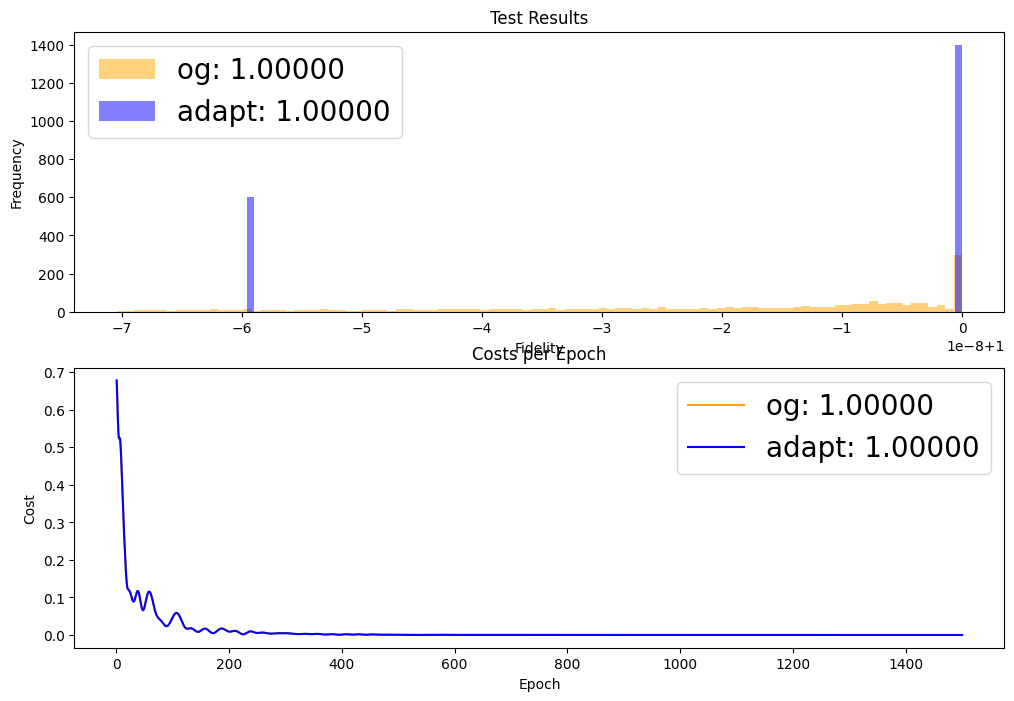

In [ ]:
gate_idx = 0
N_ctrl = 1
n_train =20
num_res = 1
trots = 6
# a = f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1_costcut_1e-10/U2_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
# a = f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_per_param_costcut_1e-10/U2_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_baths_realistic/trainsize_20_epoch1500_per_param_opt/bath_factor_1.0/gamma_0.01/lambda_0.25/0_num_baths/U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/data_run_0.pickle'

with open(a, 'rb') as f:
    df_analog = pickle.load(f)
a_lr = df_analog.get('opt_lr',None)
# print(f"lf: {list(a_lr[0])}")
# print(f"num epochs: {df_analog['epochs'][0]}")
gate = df_analog['Gate'][0]
# training_state_metrics = df_analog['selected_indices'][0]
# print(training_state_metrics)
# print(df_analog['stored_epoch'][0])
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]
training_states = df_analog['X'][0]
# print(f"training state #1: {training_states[0]}")
# print(f"params: {df_analog['init_params'][0]}")
grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]

opt_lr_analog = df_analog['opt_lr'][0]
# lrs = df_analog['lrs'][0]
print(f"Dataset A - lf: {a_lr[0]}\navg lr: {np.mean(a_lr[0]):.5f}, var: {np.var(a_lr[0]):.2e}")
# print(f"    min={min(a_lr[0]):.2e}, max={max(a_lr[0]):.2e}, median={jnp.quantile(a_lr[0], 0.5):.3e}")
print(f"Error: {np.log10(fidelity_analog):.3e}, infidelity: {fidelity_analog:.5e}\n")
# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/digital_qfim_res/trainsize_20_epoch1500_per_param_optb/U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)
b_lr = df_analog.get('opt_lr',None)
# print(f"\nlf: {b_lr[0]}")
gate = df_analog['Gate'][0]
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# print(decoded_gate)
costs_analog2 = [float(i) for i in df_analog['costs'][0]]
training_states = df_analog['X'][0]
# print(f"training state #1: {training_states[0]}")
# print(f"params: {df_analog['init_params'][0]}")
grads_per_epoch_analog2 = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog2 = df_analog['testing_results'][0]
fidelity_analog2 = 1 - df_analog['avg_fidelity'][0]
infidelities
opt_lr_analog2 = df_analog['opt_lr'][0]
# lrs2 = df_analog['lrs'][0]
print(f"Dataset B - lf: {b_lr[0]}\navg lr: {np.mean(b_lr[0]):.5f}, var: {np.var(b_lr[0]):.2e}")
# print(f"    min={min(b_lr[0]):.2e}, max={max(b_lr[0]):.2e}, median={jnp.quantile(b_lr[0], 0.5):.3e}")
# print(np.var(opt_lr_analog2))
# Plot histograms of testing results
print(f"Error: {np.log10(fidelity_analog2):.3e}, infidelity: {fidelity_analog2:.5e}")
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_analog2)

label_analog = f"og: {avg_fidelity_analog:.5f}"
label_digital = f"adapt: {avg_fidelity_digital:.5f}"



ax[0].hist([float(i) for i in testing_results_analog], bins=100, alpha=0.5,color='orange', label=label_analog,zorder=0)
ax[0].hist([float(i) for i in testing_results_analog2], bins=100, alpha=0.5,color='blue', label=label_digital,zorder=1)

ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')



# label_analog = f"og: {np.log10(1-avg_fidelity_analog):.3f}"
# label_digital = f"adapt: {np.log10(1-avg_fidelity_digital):.3f}"


# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_analog2) + 1), costs_analog2,color='blue', label=label_digital)


ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

plt.show()
# /Users/sophieblock/QRCCapstone/digital_qfim_res/trainsize_20_epoch1500_per_param_costcut_1e-8/U2_0/reservoirs_1/trotter_step_16/bath_False/data_run_0.pickle

In [36]:
np.asarray(testing_results_analog2,dtype=np.float64)[0]

1.0

In [35]:
df_analog['testing_results'][0][0]

Array(1., dtype=float32)

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_36851/2328702528.py:47: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  df = pickle.load(f)


Gate 14 ― new storing
  Min training cost: 3.0899133363e-09  at epoch 1478
  Avg Fidelity:  0.9999999888
  # fidelities ≈ 1.0 (±2.220e-16): 0
  Avg mean Infidelity:     1.1245704035e-08

Gate 14 ― runog
  Min training cost: 1.7523626938e-08  at epoch 1483
  Avg Fidelity:  0.9999999802
  # fidelities ≈ 1.0 (±2.220e-16): 303
  Avg mean Infidelity:     1.9783053529e-08



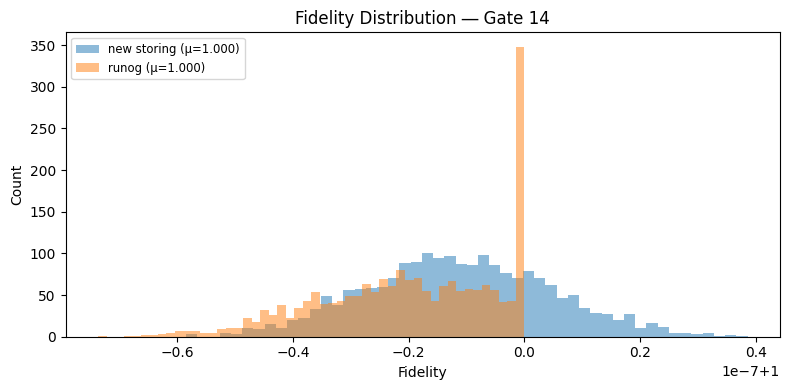

In [62]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Parameters ===
N_ctrl = 2
num_res = 1
trots = 20
# gate_indices = list(range())  # adjust as needed
gate_indices = [14]
# two parameterized base‐paths
base_paths = {
    "new storing": (
        "/Users/sophieblock/QRCCapstone/digital_qfim_res/"
        "trainsize_20_epoch1500_per_param_optb/"
        "U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/"
        "trotter_step_{trots}/bath_False/data_run_0.pickle"
    ),
    "runog": (
        "/Users/sophieblock/QRCCapstone/digital_qfim_res/"
        "trainsize_20_epoch1500_per_param_opt/"
        "U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/"
        "trotter_step_{trots}/bath_False/data_run_0.pickle"
    ),
    # "original storing": (
    #     "/Users/sophieblock/QRCCapstone/digital_results_trainable_baths_realistic/"
    #     "trainsize_20_epoch1500_per_param_opt/bath_factor_1.0/gamma_0.01/lambda_0.25/0_num_baths/"
    #     "U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/"
    #     "trotter_step_{trots}/data_run_2.pickle"
    # ),
 
}

for gate_idx in gate_indices:
    fig, ax = plt.subplots(figsize=(8, 4))

    for label, tpl in base_paths.items():
        path = tpl.format(
            N_ctrl=N_ctrl,
            gate_idx=gate_idx,
            num_res=num_res,
            trots=trots
        )
        # load the pickle
        with open(path, "rb") as f:
            df = pickle.load(f)

        # extract and flatten learning rates
        raw_lrs = df.get("opt_lr", None)
        if isinstance(raw_lrs, pd.Series):
            arr = raw_lrs.iloc[0]
        else:
            arr = raw_lrs
        lr_vals = np.ravel(arr) if arr is not None else np.array([])
        mean_lr = float(np.mean(lr_vals)) if lr_vals.size else np.nan

        # fidelity distribution
        test_results = np.array(df["testing_results"][0], dtype=np.float64)
        # === New lines to count exact 1.0 fidelities ===
        eps = np.finfo(test_results.dtype).eps
        num_ones = np.sum(np.abs(test_results - 1.0) <= eps)
        # === End new lines ===
        
        # infidelities_raw = np.array(df["infidelities"][0], dtype=np.float64)
        
        avg_fid = np.mean(test_results)
        avg_infidelity = 1.0 - avg_fid

        # print summary
        costs = np.array(df["costs"][0], dtype=np.float64)
        min_idx  = int(np.argmin(costs))       # zero-based
        min_cost = costs[min_idx]
        print(f"Gate {gate_idx} ― {label}")
        print(f"  Min training cost: {min_cost:.10e}  at epoch {min_idx+1}")
        # print(f"  F[0]:       {test_results[0]}")
        print(f"  Avg Fidelity:  {avg_fid:.10f}")
        print(f"  # fidelities ≈ 1.0 (±{eps:.3e}): {num_ones}")
        print(f"  Avg mean Infidelity:     {avg_infidelity:.10e}\n")
        # print(f"  Avg Infidelity:     {np.mean(infidelities_raw):.10e}\n")
        # plot histogram
        ax.hist(
            test_results,
            bins=50,
            alpha=0.5,
            label=f"{label} (μ={avg_fid:.3f})",
            zorder=1
        )

    ax.set_title(f"Fidelity Distribution ― Gate {gate_idx}")
    ax.set_xlabel("Fidelity")
    ax.set_ylabel("Count")
    ax.legend(loc="upper left", fontsize="small")
    plt.tight_layout()
    plt.show()


Gate 0 ― run2

test_results (numpy arr) type: <class 'numpy.ndarray'>, dtype: float64
  Avg Fidelity:  9.9999930477e-01
  Avg Infidelity:  6.9522857666e-07
  Avg Error:     -6.1590261207
  Avg Error (from avg infidelity):     -6.1578723850


raw_test_results (jax numpy) type: <class 'jaxlib.xla_extension.ArrayImpl'>, dtype: float32
  Avg Fidelity:  9.9999994040e-01
  Avg Infidelity:  6.9522860713e-07
  Avg Error:  -6.1590266228e+00

infidelities (1.00000000000000-testing_results) type: <class 'jaxlib.xla_extension.ArrayImpl'>, dtype: float32
  Avg Infidelity:  6.9503983013e-07
  Avg Error:  -6.1589884758e+00


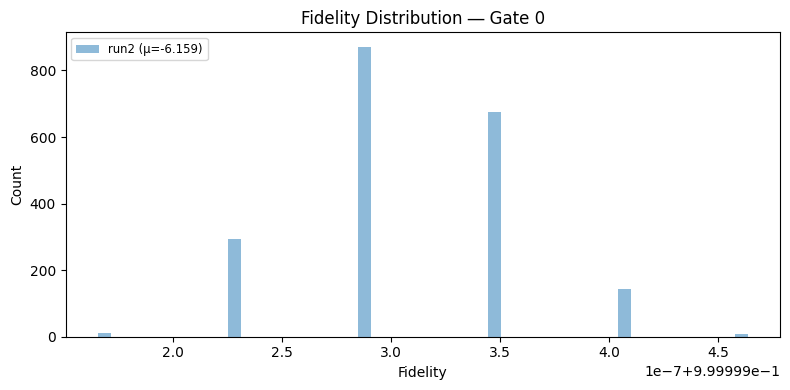

In [ ]:
import jax.numpy as jnp
import numpy as np
# === Parameters ===
N_ctrl = 2
num_res = 1
trots = 20
gate_indices = list(range(1))  # adjust as needed
# /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U2_0/reservoirs_1/trotter_step_20/bath_False/data_run_0.pickle
# two parameterized base‐paths
base_paths = {
    "run1": (
        "/Users/sophieblock/QRCCapstone/analog_results_trainable_global/"
        "trainsize_20_epoch1500_per_param_opt/0/"
        "U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/"
        "trotter_step_{trots}/bath_False/data_run_1.pickle"
    ),
    "run2": (
        "/Users/sophieblock/QRCCapstone/analog_results_trainable_global/"
        "trainsize_20_epoch1500_per_param_opt/0/"
        "U{N_ctrl}_{gate_idx}/reservoirs_{num_res}/"
        "trotter_step_{trots}/bath_False/data_run_2.pickle"
    ),
}

for gate_idx in gate_indices:
    fig, ax = plt.subplots(figsize=(8, 4))

    for label, tpl in base_paths.items():
        path = tpl.format(
            N_ctrl=N_ctrl,
            gate_idx=gate_idx,
            num_res=num_res,
            trots=trots
        )
        # load the pickle
        with open(path, "rb") as f:
            df = pickle.load(f)

        # extract and flatten learning rates
        raw_lrs = df.get("opt_lr", None)
        if isinstance(raw_lrs, pd.Series):
            arr = raw_lrs.iloc[0]
        else:
            arr = raw_lrs
        lr_vals = np.ravel(arr) if arr is not None else np.array([])
        mean_lr = float(np.mean(lr_vals)) if lr_vals.size else np.nan

        # fidelity distribution
        raw_test_results = df["testing_results"][0]
        test_results = np.array(df["testing_results"][0], dtype=np.float64)
        avg_fid = np.mean(test_results)
        errors = np.log10(1 - test_results)
        avg_error = np.mean(errors)
        avg_infid = np.mean(1 - test_results)

        # print summary
        print(f"Gate {gate_idx} ― {label}")
        print(f"\ntest_results (numpy arr) type: {type(test_results)}, dtype: {test_results.dtype}")
       
        print(f"  Avg Fidelity:  {avg_fid:.10e}")
        print(f"  Avg Infidelity:  {avg_infid:.10e}")
        print(f"  Avg Error:     {avg_error:.10f}")
        print(f"  Avg Error (from avg infidelity):     {np.log10(avg_infid):.10f}\n")


        avg_infid_jax = jnp.mean(1- raw_test_results)
        log10_vals = jnp.log10(1- raw_test_results)
        mean_log10 = jnp.mean(log10_vals)
        # log10_vals = jnp.log10(clipped)
        print(f"\nraw_test_results (jax numpy) type: {type(raw_test_results)}, dtype: {raw_test_results.dtype}")
        print(f"  Avg Fidelity:  {jnp.mean(raw_test_results):.10e}")
        print(f"  Avg Infidelity:  {avg_infid_jax:.10e}")
        print(f"  Avg Error:  {mean_log10:.10e}")

        # other infidelities stored from script 
        infidelities_key = df["infidelities"][0]
        print(f"\ninfidelities (1.00000000000000-testing_results) type: {type(infidelities_key)}, dtype: {infidelities_key.dtype}")
      
        print(f"  Avg Infidelity:  {jnp.mean(infidelities_key):.10e}")
        print(f"  Avg Error:  {jnp.mean(jnp.log10(infidelities_key)):.10e}")
        # plot histogram
        ax.hist(
            test_results,
            bins=50,
            alpha=0.5,
            label=f"{label} (μ={avg_error:.3f})",
            zorder=1
        )

    ax.set_title(f"Fidelity Distribution ― Gate {gate_idx}")
    ax.set_xlabel("Fidelity")
    ax.set_ylabel("Count")
    ax.legend(loc="upper left", fontsize="small")
    plt.tight_layout()
    plt.show()


In [80]:
costs_analog[-1]

5.65629493243236e-09

Dataset A - lf: [0.06593625 0.08534177 0.09543236 0.07188011 0.09896129]
avg lr: 0.08351036161184311, var: 0.0001656663662288338
Dataset A - num epochs: 1500
Dataset A - 0.99456, Error: -2.265e+00


Dataset B - lf: [0.06593603 0.08533968 0.0954294  0.07188167 0.0989619 ]
avg lr: 0.08350973576307297, var: 0.0001656486710999161
Dataset B - F: 0.99457, Error: -2.265e+00
[ 2.766165   -2.6943052   0.6668611  -2.3978386   0.35307935]


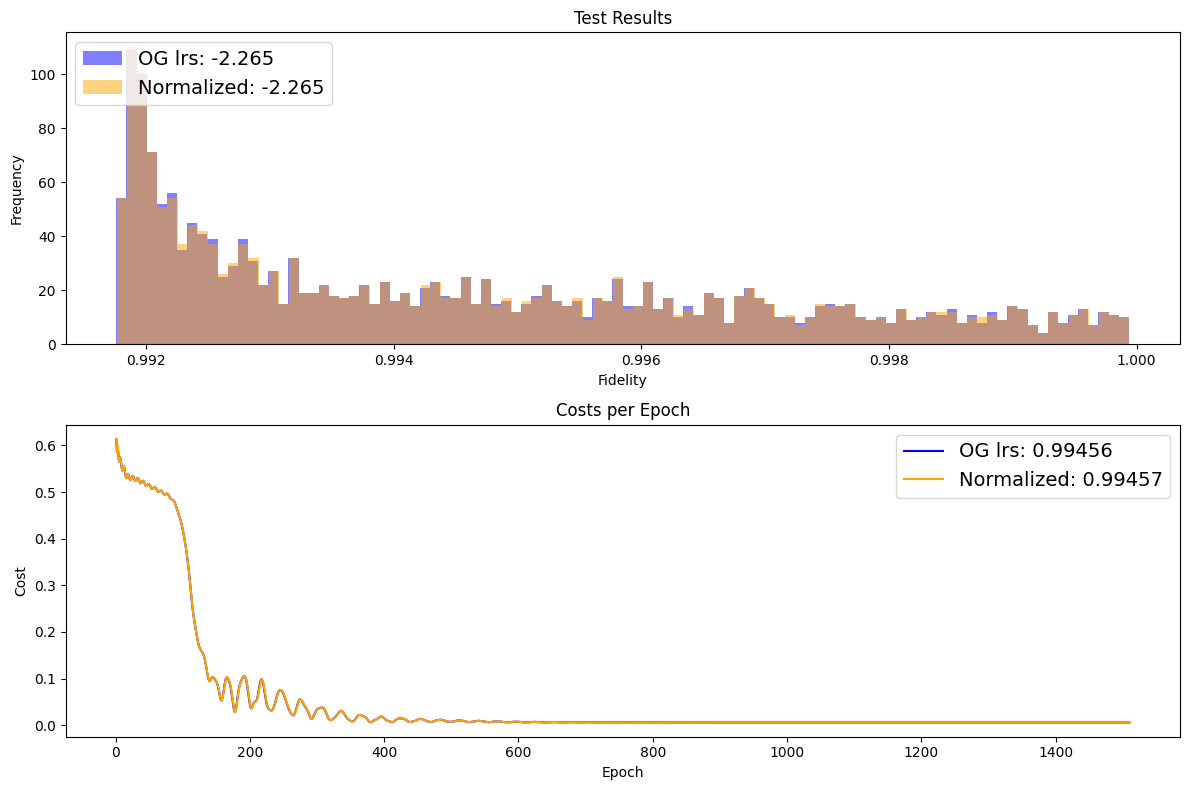

In [ ]:
gate_idx = 0
N_ctrl = 2
n_train =20
num_res = 1
trots = 6
# -----------------------------------------------------
# Dataset A: OG lrs (using per_param_costcut directory)
# -----------------------------------------------------
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U2_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
# a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_baths_realistic/trainsize_20_epoch1500_per_param_opt/bath_factor_1.0/gamma_0.01/lambda_0.1/1_num_baths/U1_0/reservoirs_1/trotter_step_1/data_run_1.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)

a_lr = df_analog.get('opt_lr', None)
print(f"Dataset A - lf: {a_lr[0]}\navg lr: {np.mean(a_lr[0])}, var: {np.var(a_lr[0])}")
print(f"Dataset A - num epochs: {df_analog['epochs'][0]}")
gate = df_analog['Gate'][0]
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# training_states = df_analog['X'][0]
# print(f"training state #1: {training_states[0]}")
costs_analog   = [float(i) for i in df_analog['costs'][0]]
# training_states = df_analog['X'][0]
grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
print(f"Dataset A - {df_analog['avg_fidelity'][0]:.5f}, Error: {np.log10(fidelity_analog):.3e}\n")
opt_lr_analog = df_analog['opt_lr'][0]


# -----------------------------------------------------
# Dataset B: New adaptive lrs (data_run_0 from per_param2_costcut directory)
# -----------------------------------------------------
b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_epoch1500_per_param_opt/0/U2_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_0.pickle'
# b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_baths_realistic/trainsize_20_epoch1500_per_param_opt/bath_factor_1.0/gamma_0.01/lambda_0.1/0_num_baths/U1_0/reservoirs_1/trotter_step_1/data_run_0.pickle'
with open(b, 'rb') as f:
    df_analog = pickle.load(f)

b_lr = df_analog.get('opt_lr', None)
print(f"\nDataset B - lf: {b_lr[0]}\navg lr: {np.mean(b_lr[0])}, var: {np.var(b_lr[0])}")
gate = df_analog['Gate'][0]
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# training_states = df_analog['X'][0]
# print(f"training state #1: {training_states[0]}")
costs_analog2   = [float(i) for i in df_analog['costs'][0]]
# training_states  = df_analog['X'][0]
grads_per_epoch_analog2 = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog2 = df_analog['testing_results'][0]
fidelity_analog2 = 1 - df_analog['avg_fidelity'][0]
print(f"Dataset B - F: {df_analog['avg_fidelity'][0]:.5f}, Error: {np.log10(fidelity_analog2):.3e}")
opt_lr_analog2 = df_analog['opt_lr'][0]
print(df_analog['init_params'][0])

# -----------------------------------------------------
# Dataset C: Adaptive lrs (data_run_1 from per_param2_costcut directory)
# -----------------------------------------------------
# c = f'/Users/sophieblock/QRCCapstone/digital_res2/trainsize_20_epoch1500_per_param2_costcut_1e-8/U2_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_2.pickle'
# with open(c, 'rb') as f:
#     df_analog = pickle.load(f)

# c_lr = df_analog.get('opt_lr', None)
# # print(f"\nDataset C - lf: {c_lr[0]}\navg lr: {np.mean(c_lr[0])}, var: {np.var(c_lr[0])}")
# gate = df_analog['Gate'][0]
# decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))

# costs_analog3   = [float(i) for i in df_analog['costs'][0]]
# testing_results_analog3 = df_analog['testing_results'][0]
# fidelity_analog3 = 1 - df_analog['avg_fidelity'][0]
# print(f"Dataset C - Error: {np.log10(fidelity_analog3)}")
# opt_lr_analog3 = df_analog['opt_lr'][0]


# # -----------------------------------------------------
# # Dataset D: Adaptive lrs (run2, data_run_2 from per_param2_costcut directory)
# # -----------------------------------------------------
# d = f'/Users/sophieblock/QRCCapstone/digital_res2/trainsize_20_epoch1500_per_param2_costcut_1e-8/U2_{gate_idx}/reservoirs_1/trotter_step_{trots}/bath_False/data_run_3.pickle'
# with open(d, 'rb') as f:
#     df_analog = pickle.load(f)

# d_lr = df_analog.get('opt_lr', None)
# print(f"\nDataset D - lf: {d_lr[0]}\navg lr: {np.mean(d_lr[0])}, var: {np.var(d_lr[0])}")
# gate = df_analog['Gate'][0]
# decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))

# costs_analog4   = [float(i) for i in df_analog['costs'][0]]
# testing_results_analog4 = df_analog['testing_results'][0]
# fidelity_analog4 = 1 - df_analog['avg_fidelity'][0]
# print(f"Dataset D - Error: {np.log10(fidelity_analog4)}")
# opt_lr_analog4 = df_analog['opt_lr'][0]


# -----------------------------------------------------
# Plotting: Histograms of testing results and Costs per Epoch for each dataset
# -----------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Calculate average testing result (for labeling)
avg_fidelity_a = np.mean(testing_results_analog)
avg_fidelity_b = np.mean(testing_results_analog2)
# avg_fidelity_c = np.mean(testing_results_analog3)
# avg_fidelity_d = np.mean(testing_results_analog4)

# Define labels – OG lrs is dataset A (plotted first)
label_a = f"OG lrs: {np.log10(1-avg_fidelity_a):.3f}"
label_b = f"Normalized: {np.log10(1-avg_fidelity_b):.3f}"
# label_c = f"Weighted: {np.log10(1-avg_fidelity_c):.3f}"
# label_d = f"Weighted & Normalized: {np.log10(1-avg_fidelity_d):.3f}"

# Plot histograms of testing results.
ax[0].hist([float(i) for i in testing_results_analog], bins=100, alpha=0.5, color='blue',  label=label_a, zorder=0)
ax[0].hist([float(i) for i in testing_results_analog2], bins=100, alpha=0.5, color='orange', label=label_b, zorder=1)
# ax[0].hist([float(i) for i in testing_results_analog3], bins=100, alpha=0.5, color='green',  label=label_c, zorder=2)
# ax[0].hist([float(i) for i in testing_results_analog4], bins=100, alpha=0.5, color='red',   label=label_d, zorder=3)

ax[0].legend(fontsize=14, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
label_a = f"OG lrs: {avg_fidelity_a:.5f}"
label_b = f"Normalized: {avg_fidelity_b:.5f}"
# label_c = f"Weighted: {avg_fidelity_c:.5f}"
# label_d = f"Weighted & Normalized: {avg_fidelity_d:.5f}"
# Plot costs per epoch for each dataset.
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,    color='blue',   label=label_a)
ax[1].plot(range(1, len(costs_analog2) + 1), costs_analog2,  color='orange', label=label_b)
# ax[1].plot(range(1, len(costs_analog3) + 1), costs_analog3,  color='green',  label=label_c)
# ax[1].plot(range(1, len(costs_analog4) + 1), costs_analog4,  color='red',    label=label_d)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=14)

plt.tight_layout()
plt.show()

lf: [0.02451201 0.0203839  0.05577217 0.02935825 0.05640345 0.10919916
 0.07721982 0.19680806 0.02437586 0.04169473 0.07004251 0.2
 0.0461259  0.06169201 0.04068237]
avg lr: 0.07028467953205109, var: 0.003034600056707859
num epochs: 1500
Error: -0.560996474518985


lf: 0.10020948946475983
avg lr: 0.10020948946475983, var: 0.0
Error: -0.683564015209589

Third dataset lf: [0.03759835 0.03337997 0.05782224 0.04191604 0.05809649 0.07285699
 0.06549481 0.08286989 0.03746776 0.05061447 0.06325815 0.08649204
 0.05313538 0.06026118 0.05      ]
avg lr: 0.05675091966986656, var: 0.00023743063502479345
Third Error: -0.7633662647850996


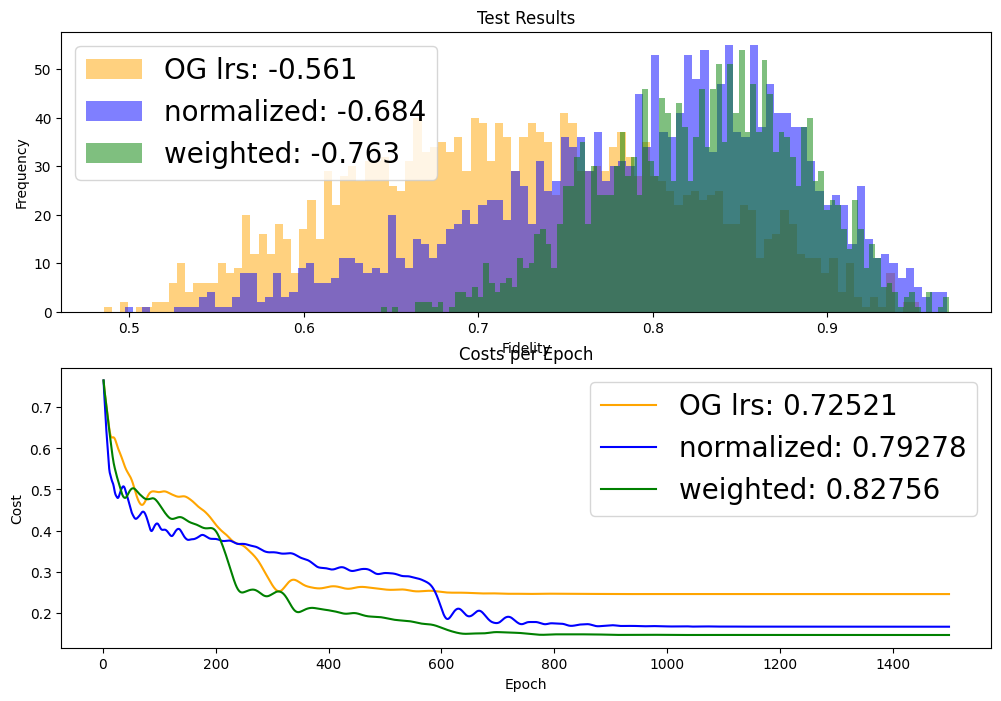

In [53]:
gate_idx = 13
N_ctrl = 2
n_train =20
num_res = 1
trots = 6
# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/digital_res2/trainsize_20_epoch1500_per_param_costcut_1e-8/U2_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle'

with open(a, 'rb') as f:
    df_analog = pickle.load(f)
a_lr = df_analog.get('opt_lr',None)
print(f"lf: {a_lr[0]}\navg lr: {np.mean(a_lr[0])}, var: {np.var(a_lr[0])}")
print(f"num epochs: {df_analog['epochs'][0]}")
gate = df_analog['Gate'][0]
# training_state_metrics = df_analog['selected_indices'][0]
# print(training_state_metrics)
# print(df_analog['stored_epoch'][0])
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]
training_states = df_analog['X'][0]
# print(f"training state #1: {training_states[0]}")
# print(f"params: {df_analog['init_params'][0]}")
grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
print(f"Error: {np.log10(fidelity_analog)}\n")
opt_lr_analog = df_analog['opt_lr'][0]
# lrs = df_analog['lrs'][0]

# Load the first dataset
b = f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1_costcut_1e-10/U2_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle'
with open(b, 'rb') as f:
    df_analog = pickle.load(f)
b_lr = df_analog.get('opt_lr',None)
print(f"\nlf: {b_lr[0]}\navg lr: {np.mean(b_lr[0])}, var: {np.var(b_lr[0])}")
gate = df_analog['Gate'][0]
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# print(decoded_gate)
costs_analog2 = [float(i) for i in df_analog['costs'][0]]
training_states = df_analog['X'][0]
# print(f"training state #1: {training_states[0]}")
# print(f"params: {df_analog['init_params'][0]}")
grads_per_epoch_analog2 = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog2 = df_analog['testing_results'][0]
fidelity_analog2 = 1 - df_analog['avg_fidelity'][0]
print(f"Error: {np.log10(fidelity_analog2)}")
opt_lr_analog2 = df_analog['opt_lr'][0]
# Adjust the file path below as appropriate.
c = f'/Users/sophieblock/QRCCapstone/digital_qfim_res/trainsize_20_epoch1500_per_param_costcut_1e-8/U2_{gate_idx}/reservoirs_{num_res}/trotter_step_{trots}/bath_False/data_run_0.pickle'
with open(c, 'rb') as f:
    df_analog = pickle.load(f)

c_lr = df_analog.get('opt_lr', None)
print(f"\nThird dataset lf: {c_lr[0]}\navg lr: {np.mean(c_lr[0])}, var: {np.var(c_lr[0])}")
gate = df_analog['Gate'][0]
decoded_gate = pickle.loads(base64.b64decode(gate.encode('utf-8')))

costs_analog3 = [float(i) for i in df_analog['costs'][0]]
testing_results_analog3 = df_analog['testing_results'][0]
fidelity_analog3 = 1 - df_analog['avg_fidelity'][0]
print(f"Third Error: {np.log10(fidelity_analog3)}")
opt_lr_analog3 = df_analog['opt_lr'][0]

# -----------------------------
# Plotting
# -----------------------------
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Calculate average testing results for labeling
avg_fidelity_analog  = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_analog2)
avg_fidelity_third   = np.mean(testing_results_analog3)

label_analog = f"OG lrs: {np.log10(1-avg_fidelity_analog):.3f}"

label_digital = f"normalized: {np.log10(1-avg_fidelity_digital):.3f}"
label_third = f"weighted: {np.log10(1-avg_fidelity_third):.3f}"

# Plot histograms of testing results
ax[0].hist([float(i) for i in testing_results_analog], bins=100, alpha=0.5,
           color='orange', label=label_analog, zorder=0)
ax[0].hist([float(i) for i in testing_results_analog2], bins=100, alpha=0.5,
           color='blue', label=label_digital, zorder=1)
ax[0].hist([float(i) for i in testing_results_analog3], bins=100, alpha=0.5,
           color='green', label=label_third, zorder=2)

ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
label_analog = f"OG lrs: {avg_fidelity_analog:.5f}"

label_digital = f"normalized: {avg_fidelity_digital:.5f}"
label_third = f"weighted: {avg_fidelity_third:.5f}"

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,
           color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_analog2) + 1), costs_analog2,
           color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_analog3) + 1), costs_analog3,
           color='green', label=label_third)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

plt.show()

In [23]:
[0.08981538563966751]*len(opt_lr_analog3)

[0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751,
 0.08981538563966751]

In [37]:

# Load the first dataset
a = '/Volumes/Block 1/NASA_USRA/analog_results/trainsize_25/0/U3_16/reservoirs_1/trotter_step_35/bath_False/data_run_0.pickle'
# a = '/Volumes/Block 1/NASA_USRA/analog_results/trainsize_25/0/U3_13/reservoirs_1/trotter_step_40/bath_False/data_run_0.pickle'
# a = f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case0_costcut_1e-6/U2_15/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df = pickle.load(f)
costs = df['costs'][0]
print(costs[0])
print(costs[499])
test_results = df['testing_results'][0]
print(df['opt_lr'])
print(min(test_results))
print(max(test_results))
print(f"  Min={np.min(test_results):.3e}, Max={np.max(test_results):.3e}, Var={np.var(test_results)}, Mean={np.mean(test_results):.6f}")
# plt.figure()
# plt.plot(costs)
# plt.title('Training Costs')
# plt.xlabel('Epoch')
# plt.ylabel('Cost')
# plt.show()
#if gate_name == 'U2_0':
gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))

# Find epochs where cost < 1e-8
threshold = 1e-8
epochs_below_threshold = [i for i, c in enumerate(costs) if c < threshold]

if epochs_below_threshold:
    print(f"Cost < {threshold} first occurs at epoch = {epochs_below_threshold[0]} (cost={costs[epochs_below_threshold[0]]:.3e})")
    print("All epochs below threshold:", epochs_below_threshold)
else:
    print(f"No epochs found with cost < {threshold}")
plt.figure()
label = 'd'
 # Plot testing results (histograms)
plt.hist([float(i) for i in test_results], bins=50, alpha=0.5, label=f'{np.mean(test_results)}')
plt.legend()
plt.show()
# 0.0
# 8.702185094744408e-08
#   Min=0.000e+00, Max=8.702e-08, Var=2.7870902708908297e-16, Mean=0.000000
# Cost < 1e-08 first occurs at epoch = 1196 (cost=9.029e-09)
# All epochs below threshold: [1196]

# print(f"Gate: ")
# print(decoded_qobj)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Block 1/NASA_USRA/analog_results/trainsize_25/0/U3_16/reservoirs_1/trotter_step_35/bath_False/data_run_0.pickle'

Index(['Gate', 'epochs', 'trotter_step', 'controls', 'reservoirs', 'N_train',
       'init_params_dict', 'init_params', 'testing_results', 'avg_fidelity',
       'costs', 'params_per_epoch', 'training_states', 'opt_params', 'opt_lr',
       'grads_per_epoch', 'bath', 'num_bath', 'partial_rho_qfim',
       'description'],
      dtype='object')
0.8729704
0    0.0045626936
Name: opt_lr, dtype: object
  Min=9.993e-01, Max=9.999e-01, Var=1.141925043413039e-08, Mean=0.999635


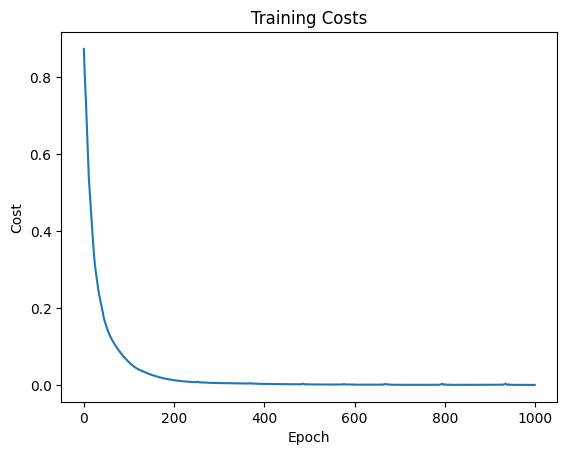

No epochs found with cost < 1e-08


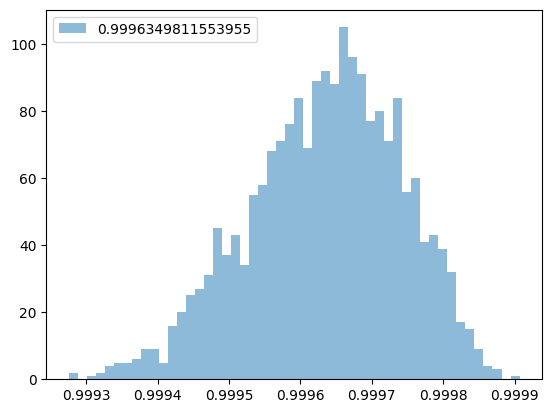

In [42]:
import pickle
import numpy as np

def print_init_params_to_csv(file_path: str) -> None:
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
        
    # Extract the first init_params
    init_params = df['init_params'][0]
    
    # Convert JAX array to a NumPy array
    np_params = np.array(init_params)
    
    # Format each value with high precision and join with commas
    formatted_values = [f"{val:.18g}" for val in np_params]
    
    # Print out as a single comma-separated line
    print(",".join(formatted_values))

# Load the first dataset
# a = '/Volumes/Block 1/NASA_USRA/analog_results/trainsize_20_optimized_by_cost3/0/U3_16/reservoirs_1/trotter_step_35/bath_False/data_run_0.pickle'
a = '/Users/sophieblock/Downloads/debug/analog_results_trainable_global/trainsize_20_optimized_by_cost3/0/U3_8/reservoirs_1/trotter_step_35/bath_False/data_run_0.pickle'
# a = f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case0_costcut_1e-6/U2_15/reservoirs_2/trotter_step_24/bath_False/data_run_0.pickle'
# print_init_params_to_csv(a)
with open(a, 'rb') as f:
    df = pickle.load(f)
print(df.keys())

init_params = df['init_params'][0]
# print(init_params)
costs = df['costs'][0]
print(costs[0])
test_results = df['testing_results'][0]
print(df['opt_lr'])
# print(min(test_results))
# print(max(test_results))
print(f"  Min={np.min(test_results):.3e}, Max={np.max(test_results):.3e}, Var={np.var(test_results)}, Mean={np.mean(test_results):.6f}")
plt.figure()
plt.plot(costs)
plt.title('Training Costs')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()
#if gate_name == 'U2_0':
gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))

# Find epochs where cost < 1e-8
threshold = 1e-8
epochs_below_threshold = [i for i, c in enumerate(costs) if c < threshold]

if epochs_below_threshold:
    print(f"Cost < {threshold} first occurs at epoch = {epochs_below_threshold[0]} (cost={costs[epochs_below_threshold[0]]:.3e})")
    print("All epochs below threshold:", epochs_below_threshold)
else:
    print(f"No epochs found with cost < {threshold}")
plt.figure()
label = 'd'
 # Plot testing results (histograms)
plt.hist([float(i) for i in test_results], bins=50, alpha=0.5, label=f'{np.mean(test_results)}')
plt.legend()
plt.show()
# 0.0
# 8.702185094744408e-08
#   Min=0.000e+00, Max=8.702e-08, Var=2.7870902708908297e-16, Mean=0.000000
# Cost < 1e-08 first occurs at epoch = 1196 (cost=9.029e-09)
# All epochs below threshold: [1196]

# print(f"Gate: ")
# print(decoded_qobj)

In [ ]:
#  0.9999967241183708
df_analog['fixed_params0']['test0']['qfim_eigvals']

In [ ]:
#/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10/0/U1_6/reservoirs_2/trotter_step_9/bath_False/data_run_0.pickle
# /Users/sophieblock/QRCCapstone/QFIM_traced_trainable_global/analog_model_new/Nc_2/GHZ_state/Nr_1/trotter_step_8/1.0K/data.pickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test15/U1_2/data_run_2.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)

# Load the second dataset
b =f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test15/U1_2/test15_.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)



# Load the third dataset
c = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test9/U1_2/test9_.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)

# Load the fourth dataset
d =f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test116/U1_2/test116_.pickle'
with open(d, 'rb') as f:
    df_d = pickle.load(f)

# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]
print(f"data_run_3__.pickle params: {df_c['init_params'][0]}")
print(f"ts: {df_c['training_states'][0][0]}")
# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]
print(f"data_run_3.pickle ts: {df_d['init_params'][0]}")
print(f"ts: {df_d['training_states'][0][0]}")
# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 5)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 5)


mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 5)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 5)


mean_fidelity_c = round(float(np.mean(testing_results_c)), 5)
std_fidelity_c = round(float(np.std(testing_results_c)), 5)


mean_fidelity_d = round(float(np.mean(testing_results_d)), 5)
std_fidelity_d = round(float(np.std(testing_results_d)), 5)


# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")

print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")

print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")

print(f"\nAverage Fidelity (8): {mean_fidelity_d} ± {std_fidelity_d}")

# Plot histograms of testing results
fig, ax = plt.subplots(5, 1, figsize=(12, 36))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)
avg_fidelity_d = np.mean(testing_results_d)

label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"
label_d = f"8: {avg_fidelity_d:.5f}"

ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)
ax[0].hist([float(i) for i in testing_results_d], bins=50,color='red', alpha=0.5, label=label_d)
ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)
ax[1].plot(range(1, len(costs_d) + 1), costs_d, color='red', label=label_d)
ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# Plot variance of gradients per epoch
var_analog = [np.var(grads) for grads in grads_per_epoch_analog]
min_abs_analog = [np.min(np.abs(grads)) for grads in grads_per_epoch_analog]
max_abs_analog = [np.max(np.abs(grads)) for grads in grads_per_epoch_analog]

var_digital = [np.var(grads) for grads in grads_per_epoch_digital]
min_abs_digital = [np.min(np.abs(grads)) for grads in grads_per_epoch_digital]
max_abs_digital = [np.max(np.abs(grads)) for grads in grads_per_epoch_digital]

var_c = [np.var(grads) for grads in grads_per_epoch_c]
min_abs_c = [np.min(np.abs(grads)) for grads in grads_per_epoch_c]
max_abs_c = [np.max(np.abs(grads)) for grads in grads_per_epoch_c]

var_d = [np.var(grads) for grads in grads_per_epoch_d]
min_abs_d = [np.min(np.abs(grads)) for grads in grads_per_epoch_d]
max_abs_d = [np.max(np.abs(grads)) for grads in grads_per_epoch_d]

ax[2].plot(range(1, len(var_analog) + 1), var_analog, label=label_analog, linestyle='-', color='orange')
ax[2].plot(range(1, len(var_digital) + 1), var_digital, label=label_digital, linestyle='-', color='blue')
ax[2].plot(range(1, len(var_c) + 1), var_c, label=label_c, linestyle='-', color='green')
ax[2].plot(range(1, len(var_d) + 1), var_d, label=label_d, linestyle='-', color='red')
ax[2].set_title('Variance of Gradients per Epoch', fontsize=25)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=20)

# Plot minimum absolute value of gradients per epoch
ax[3].plot(range(1, len(min_abs_analog) + 1), min_abs_analog, linewidth=1.5, color='orange', label=label_analog, linestyle='-')
ax[3].plot(range(1, len(min_abs_digital) + 1), min_abs_digital, linewidth=1.5, color='blue', label=label_digital, linestyle='-')
ax[3].plot(range(1, len(min_abs_c) + 1), min_abs_c, linewidth=1, color='green', label=label_c, linestyle='-')
ax[3].plot(range(1, len(min_abs_d) + 1), min_abs_d, linewidth=1, color='red', label=label_d, linestyle='-')
ax[3].set_title('Minimum Absolute Value of Gradients per Epoch', fontsize=25)
ax[3].set_xlabel('Epoch')
ax[3].set_yscale('log')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].legend(fontsize=20)

# Plot maximum absolute value of gradients per epoch
ax[4].plot(range(1, len(max_abs_analog) + 1), max_abs_analog, linewidth=2, color='orange', label=label_analog, linestyle='-.')
ax[4].plot(range(1, len(max_abs_digital) + 1), max_abs_digital, linewidth=2, color='blue', label=label_digital, linestyle='-.')
ax[4].plot(range(1, len(max_abs_c) + 1), max_abs_c, linewidth=2, color='green', label=label_c, linestyle='-.')
ax[4].plot(range(1, len(max_abs_d) + 1), max_abs_d, linewidth=2, color='red', label=label_d, linestyle='-.')
ax[4].set_title('Maximum Absolute Value of Gradients per Epoch', fontsize=25)
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 4
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_9.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)

# Load the second dataset
b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_19.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)

# Load the third dataset
c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_3.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)

# Load the fourth dataset
d = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_7.pickle'
with open(d, 'rb') as f:
    df_d = pickle.load(f)

# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]
print(f"data_run_3__.pickle params: {df_c['init_params'][0]}")
print(f"ts: {df_c['training_states'][0][0]}")
# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]
print(f"data_run_3.pickle ts: {df_d['init_params'][0]}")
print(f"ts: {df_d['training_states'][0][0]}")
# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 5)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 5)
var_grad_analog = float(jnp.mean(df_analog['var_grad'][0]))
iqr_var_grad_analog = calculate_iqr(jnp.array(df_analog['var_grad'][0]))
min_grad_analog = float(jnp.min(df_analog['min_grad'][0]))
max_grad_analog = float(jnp.max(df_analog['max_grad'][0]))

mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 5)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 5)
var_grad_digital = float(jnp.mean(df_digital['var_grad'][0]))
iqr_var_grad_digital = calculate_iqr(jnp.array(df_digital['var_grad'][0]))
min_grad_digital = float(jnp.min(df_digital['min_grad'][0]))
max_grad_digital = float(jnp.max(df_digital['max_grad'][0]))

mean_fidelity_c = round(float(np.mean(testing_results_c)), 5)
std_fidelity_c = round(float(np.std(testing_results_c)), 5)
var_grad_c = float(jnp.mean(df_c['var_grad'][0]))
iqr_var_grad_c = calculate_iqr(jnp.array(df_c['var_grad'][0]))
min_grad_c = float(jnp.min(df_c['min_grad'][0]))
max_grad_c = float(jnp.max(df_c['max_grad'][0]))

mean_fidelity_d = round(float(np.mean(testing_results_d)), 5)
std_fidelity_d = round(float(np.std(testing_results_d)), 5)
var_grad_d = float(jnp.mean(df_d['var_grad'][0]))
iqr_var_grad_d = calculate_iqr(jnp.array(df_d['var_grad'][0]))
min_grad_d = float(jnp.min(df_d['min_grad'][0]))
max_grad_d = float(jnp.max(df_d['max_grad'][0]))

# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")
print(f"Initial Variance (10): {var_grad_analog:.5e}, IQR: {iqr_var_grad_analog:.5e}, Min Gradient: {min_grad_analog:.5e}, Max Gradient: {max_grad_analog:.5e}")

print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")
print(f"Initial Variance (16): {var_grad_digital:.5e}, IQR: {iqr_var_grad_digital:.5e}, Min Gradient: {min_grad_digital:.5e}, Max Gradient: {max_grad_digital:.5e}")

print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")
print(f"Initial Variance (4): {var_grad_c:.5e}, IQR: {iqr_var_grad_c:.5e}, Min Gradient: {min_grad_c:.5e}, Max Gradient: {max_grad_c:.5e}")

print(f"\nAverage Fidelity (8): {mean_fidelity_d} ± {std_fidelity_d}")
print(f"Initial Variance (8): {var_grad_d:.5e}, IQR: {iqr_var_grad_d:.5e}, Min Gradient: {min_grad_d:.5e}, Max Gradient: {max_grad_d:.5e}")

# Plot histograms of testing results
fig, ax = plt.subplots(5, 1, figsize=(12, 36))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)
avg_fidelity_d = np.mean(testing_results_d)

label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"
label_d = f"8: {avg_fidelity_d:.5f}"

ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)
ax[0].hist([float(i) for i in testing_results_d], bins=50,color='red', alpha=0.5, label=label_d)
ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)
ax[1].plot(range(1, len(costs_d) + 1), costs_d, color='red', label=label_d)
ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# Plot variance of gradients per epoch
var_analog = [np.var(grads) for grads in grads_per_epoch_analog]
min_abs_analog = [np.min(np.abs(grads)) for grads in grads_per_epoch_analog]
max_abs_analog = [np.max(np.abs(grads)) for grads in grads_per_epoch_analog]

var_digital = [np.var(grads) for grads in grads_per_epoch_digital]
min_abs_digital = [np.min(np.abs(grads)) for grads in grads_per_epoch_digital]
max_abs_digital = [np.max(np.abs(grads)) for grads in grads_per_epoch_digital]

var_c = [np.var(grads) for grads in grads_per_epoch_c]
min_abs_c = [np.min(np.abs(grads)) for grads in grads_per_epoch_c]
max_abs_c = [np.max(np.abs(grads)) for grads in grads_per_epoch_c]

var_d = [np.var(grads) for grads in grads_per_epoch_d]
min_abs_d = [np.min(np.abs(grads)) for grads in grads_per_epoch_d]
max_abs_d = [np.max(np.abs(grads)) for grads in grads_per_epoch_d]

ax[2].plot(range(1, len(var_analog) + 1), var_analog, label=label_analog, linestyle='-', color='orange')
ax[2].plot(range(1, len(var_digital) + 1), var_digital, label=label_digital, linestyle='-', color='blue')
ax[2].plot(range(1, len(var_c) + 1), var_c, label=label_c, linestyle='-', color='green')
ax[2].plot(range(1, len(var_d) + 1), var_d, label=label_d, linestyle='-', color='red')
ax[2].set_title('Variance of Gradients per Epoch', fontsize=25)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=20)

# Plot minimum absolute value of gradients per epoch
ax[3].plot(range(1, len(min_abs_analog) + 1), min_abs_analog, linewidth=1.5, color='orange', label=label_analog, linestyle='-')
ax[3].plot(range(1, len(min_abs_digital) + 1), min_abs_digital, linewidth=1.5, color='blue', label=label_digital, linestyle='-')
ax[3].plot(range(1, len(min_abs_c) + 1), min_abs_c, linewidth=1, color='green', label=label_c, linestyle='-')
ax[3].plot(range(1, len(min_abs_d) + 1), min_abs_d, linewidth=1, color='red', label=label_d, linestyle='-')
ax[3].set_title('Minimum Absolute Value of Gradients per Epoch', fontsize=25)
ax[3].set_xlabel('Epoch')
ax[3].set_yscale('log')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].legend(fontsize=20)

# # Plot maximum absolute value of gradients per epoch
# ax[4].plot(range(1, len(max_abs_analog) + 1), max_abs_analog, linewidth=2, color='orange', label=label_analog, linestyle='-.')
# ax[4].plot(range(1, len(max_abs_digital) + 1), max_abs_digital, linewidth=2, color='blue', label=label_digital, linestyle='-.')
# ax[4].plot(range(1, len(max_abs_c) + 1), max_abs_c, linewidth=2, color='green', label=label_c, linestyle='-.')
# ax[4].plot(range(1, len(max_abs_d) + 1), max_abs_d, linewidth=2, color='red', label=label_d, linestyle='-.')
# ax[4].set_title('Maximum Absolute Value of Gradients per Epoch', fontsize=25)
# ax[4].set_xlabel('Epoch')
# ax[4].set_ylabel('Max Abs Gradient')
# ax[4].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [361]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module='pickle')

In [228]:
gate_idx = 5
selected_sets = {
                0:'',
                 1:'',
                #  5:'',
                #  6:'',
                 2:'',
                 3:'', 

                 4:'',
                #  7:''
                # 13:'No clip',
                # 14:'optax.clip_by_global_norm(.2)'
                }

--- Dataset: $N_{bath} = 1, \lambda_{scale} = 0.01$ [data_run_0.pickle] ---
  File Path: /Users/sophieblock/Downloads/debug/analog_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.1/lambda_0.1/2_num_baths/U1_9/reservoirs_1/trotter_step_3/data_run_0.pickle
  Gamma Local: [0.039867704890165716, -0.005752644678842983]
  Testing Results (Sample): [0.99960256 0.9997003  0.9992504  0.9991294  0.99890643]
----------------------------------------

Average Fidelity ($N_{bath} = 1, \lambda_{scale} = 0.01$ [data_run_0.pickle]): 0.99916 ± 0.00035


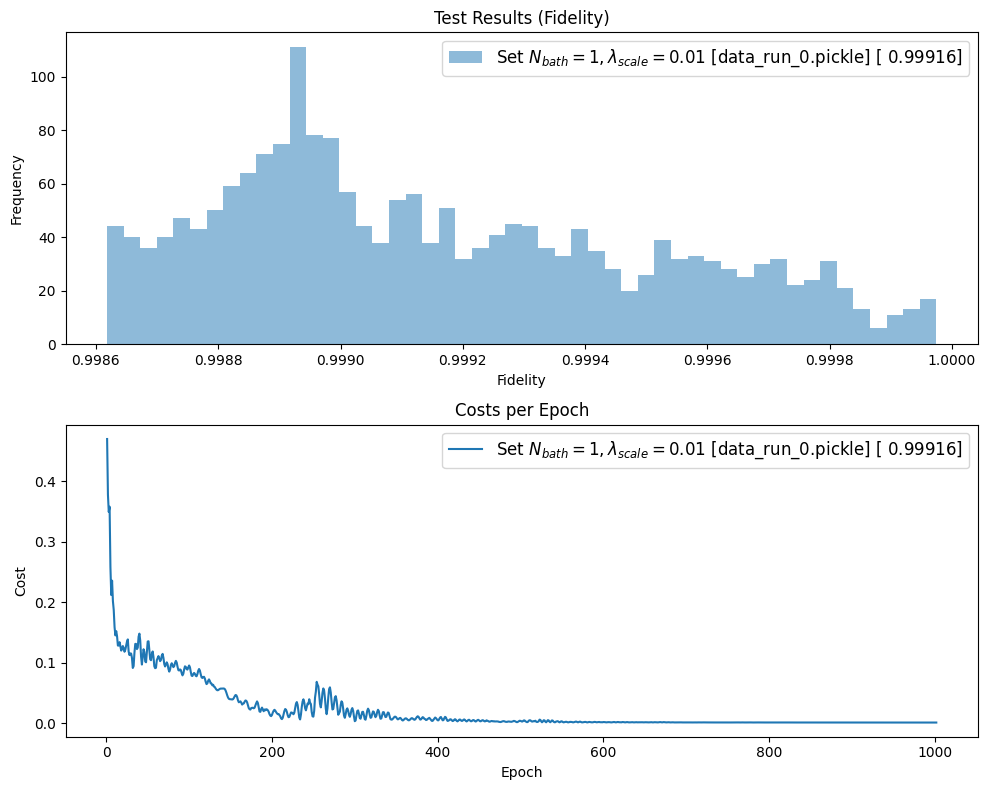

In [14]:

import jax.numpy as jnp
trot = 8
N_r = 1
N_ctrl = 2
gate_idx =0
n_train = 20
epochs = 1000
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr
selected_sets = {
    # 0:r'cummulative $\tau$: circuit1',
                #  0:f'$\\gamma_{{scale}} = 0.05, \\lambda_{{scale}} = 0.01$ [data_run_0.pickle]',
                # #  7:'ogog',
                #  1:f'$\\gamma_{{scale}} =  0.05, \\lambda_{{scale}} = 0.01$ [data_run_1.pickle]',
                #   2:f'$\\gamma_{{scale}} =  0.05, \\lambda_{{scale}} = 0.1$ [data_run_0.pickle]',
                #    3:f'$\\gamma_{{scale}} =  0.05, \\lambda_{{scale}} = 0.1$ [data_run_1.pickle]',
                     0:f'$N_{{bath}} = 1, \\lambda_{{scale}} = 0.01$ [data_run_0.pickle]',
                #  7:'ogog',
                #  1:f'$N_{{bath}} = 1, \\lambda_{{scale}} = 0.01$ [data_run_1.pickle]',
                #   2:f'$N_{{bath}} = 2, \\lambda_{{scale}} = 0.1$ [data_run_0.pickle]',
                #    3:f'$N_{{bath}} = 2, \\lambda_{{scale}} = 0.1$ [data_run_1.pickle]',
                #  3:'og rev',
                #  5:'og real',
                #    7:'new real',
                #  4:'',
                 }

num_bath = 1
trotter_step = 1
gate_idx = 0
N_C = 1
# Initialize the paths to the datasets (as a loop)
# data_files = [f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_fuckery/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
#               for run_idx,_ in selected_sets.items()]
data_files = [
    '/Users/sophieblock/Downloads/debug/analog_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.1/lambda_0.1/2_num_baths/U1_9/reservoirs_1/trotter_step_3/data_run_0.pickle'
    # '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_10_epoch1500_case1/U1_3/reservoirs_1/trotter_step_3//bath_False/data_run_0.pickle',
    # f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.01/{num_bath}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_0.pickle',
    # f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.01/{num_bath+1}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_0.pickle',
    #  f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.01/{num_bath}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_1.pickle',
    # f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.1/{num_bath}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_0.pickle',
    #  f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.1/{num_bath}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_1.pickle'
]
# data_files = [f'/Users/sophieblock/Downloads/debug/analog_results_trainable_global/trainsize_{n_train}_epoch{epochs}_pwc/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
#               for run_idx,_ in selected_sets.items()]
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad
def calculate_global_gradient_norm(grads_per_epoch):
    return [np.linalg.norm(grad) for grad in grads_per_epoch]
# Load the datasets and extract relevant data
data_results = []
for i,file_path in zip(selected_sets,data_files):
    # print(i_pair)
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        # Extract bath-related information
    gamma_local = data.get('gamma_local', {})[0]
    gamma_scale = data.get('gamma_scale', None)
    lambda_scale = data.get('lambda_scale', None)
    bath_factor = data.get('bath_factor', None)
    num_bath = data.get('Bath', None)  # From the rows in your DataFrame
    avg_fidelity = data.get('avg_fidelity', [None])[0]
    testing_results = data.get('testing_results', [None])[0]

    # Print bath information
    print(f"--- Dataset: {selected_sets[i]} ---")
    print(f"  File Path: {file_path}")
    # print(f"  Gamma Scale: {gamma_scale}")
    # print(f"  Lambda Scale: {lambda_scale}")
    # print(f"  Bath Factor: {bath_factor}")
   
    print(f"  Gamma Local: {gamma_local}")
    print(f"  Testing Results (Sample): {testing_results[:5]}")
    print("-" * 40)
    # print(data)
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    try:
        trainin_states = data['training_states'][0][0]

    except KeyError:
        trainin_states = data['X'][0][0]
    
    # time_per_epoch = data['time_per_epoch'][0]
    
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # try:
    #     selected_sets[i] = data['opt_description'][0]
    #     lrs = data['lrs'][0]

    # except KeyError:
    #     selected_sets[i] = file_path.split('/')[-1]
    #     lrs = None
    # Print the results
    print(f"\nAverage Fidelity ({selected_sets[i]}): {mean_fidelity} ± {std_fidelity}")
    # H_string = data['H_analytical']
    # H_bath = data['H_bath']
    # print(f"Hamiltonian: {H_string[0]}")
    # print(f"H_bath: {H_bath[0]}")
    # print(f"    total time: {sum(time_per_epoch)}")
    # print(f"Initial Variance ({selected_sets[i]}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")
    # print(f"initial learning rate? (opt_lr): {opt_lr}\nX[0]: {trainin_states[0]}")

    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    
    
    

    grad_norm = calculate_global_gradient_norm(grads_per_epoch)

    data_results.append({
        'costs': costs,
        'var_grad': var_grad,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        # 'lrs':lrs,
        # 'time': time_per_epoch
    })

# Now plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Loop over datasets and add each to the plots
for idx, dataset in zip(selected_sets,data_results):
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'Set {selected_sets[idx]} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    # time_label = sum(dataset['time'][:10])
    # ax[2].plot(range(1, 11), dataset['time'][:10], label=f'{time_label:.4e}')

    # # Plot minimum absolute value of gradients per epoch
    # ax[3].plot(range(1, len(dataset['lrs']) + 1), dataset['lrs'],linewidth=1, label=label)
   
    # # Plot maximum absolute value of gradients per epoch
    # ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    # ax[4].set_yscale('log')

    # ax[5].plot(range(1, len(dataset['grad_norm']) + 1), dataset['grad_norm'], label=label)
    # # ax[5].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)


# ax[5].legend(fontsize=12)
plt.tight_layout()
plt.show()

--- Dataset: $N_{bath} = 2, \lambda_{scale} = 0.01$, \text{bath_scale} = 10$  ---
  File Path: /Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.01/1_num_baths/U1_0/reservoirs_1/trotter_step_3/data_run_0.pickle
  Gamma Scale: 0    0.05
Name: gamma_scale, dtype: float64
  Lambda Scale: 0    0.01
Name: lambda_scale, dtype: float64
  Bath Factor: 0    1.0
Name: bath_factor, dtype: float64
  Gamma Local: 0    [0.06369098702818281]
Name: gamma_local, dtype: object
  Testing Results (Sample): [0.9994891411772918, 0.9994831203706837, 0.9969834276998993, 0.9984501526380397, 0.9992301995919419]
----------------------------------------

Average Fidelity ($N_{bath} = 2, \lambda_{scale} = 0.01$, \text{bath_scale} = 10$ ): 0.99876 ± 0.00077
--- Dataset: $N_{bath} = 2, \lambda_{scale} = 0.1$, \text{bath_scale} = 10$  ---
  File Path: /Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/ba

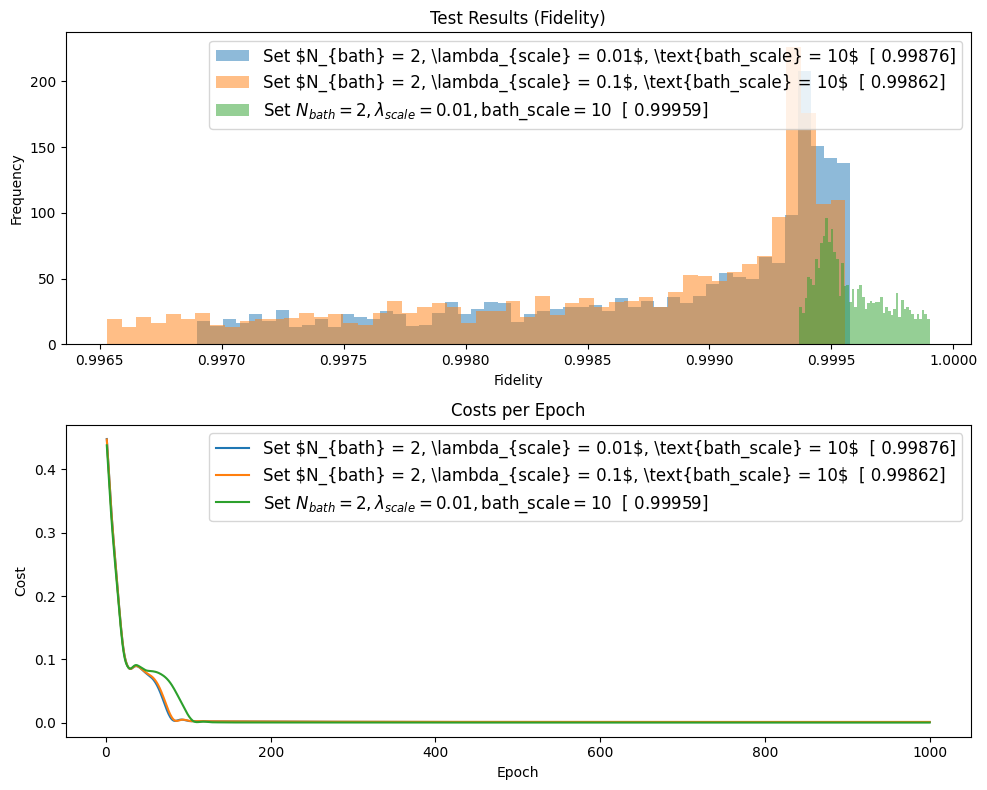

In [41]:

num_bath = 1
trotter_step = 3
gate_idx = 0
N_C = 1
selected_sets = {
    # 0:r'cummulative $\tau$: circuit1',
                #  0:f'$\\gamma_{{scale}} = 0.05, \\lambda_{{scale}} = 0.01$ [data_run_0.pickle]',
                # #  7:'ogog',
                #  1:f'$\\gamma_{{scale}} =  0.05, \\lambda_{{scale}} = 0.01$ [data_run_1.pickle]',
                #   2:f'$\\gamma_{{scale}} =  0.05, \\lambda_{{scale}} = 0.1$ [data_run_0.pickle]',
                #    3:f'$\\gamma_{{scale}} =  0.05, \\lambda_{{scale}} = 0.1$ [data_run_1.pickle]',
                     0:f'$N_{{bath}} = 2, \\lambda_{{scale}} = 0.01$, \\text{{bath_scale}} = 10$ ',
                #  7:'ogog',
                 1:f'$N_{{bath}} = 2, \\lambda_{{scale}} = 0.1$, \\text{{bath_scale}} = 10$ ',
                  2:f'$N_{{bath}} = 2, \\lambda_{{scale}} = 0.01, \\text{{bath_scale}} = 10$ ',
                #    3:f'$N_{{bath}} = 2, \\lambda_{{scale}} = 0.1$',
                #  3:'og rev',
                #  5:'og real',
                #    7:'new real',
                #  4:'',
                 }
# Initialize the paths to the datasets (as a loop)
# data_files = [f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_fuckery/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
#               for run_idx,_ in selected_sets.items()]
data_files = [
    # '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_10_epoch1500_case1/U1_3/reservoirs_1/trotter_step_3//bath_False/data_run_0.pickle',
    f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.01/{num_bath}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_0.pickle',

    f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_1.0/gamma_0.05/lambda_0.1/{num_bath+1}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_0.pickle',
    
      f'/Users/sophieblock/Downloads/debug/digital_results_trainable_baths/trainsize_10_epoch1000/bath_factor_10.0/gamma_0.05/lambda_0.01/{num_bath+1}_num_baths/U{N_C}_{gate_idx}/reservoirs_1/trotter_step_{trotter_step}/data_run_0.pickle',
    
]
# data_files = [f'/Users/sophieblock/Downloads/debug/analog_results_trainable_global/trainsize_{n_train}_epoch{epochs}_pwc/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
#               for run_idx,_ in selected_sets.items()]
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad
def calculate_global_gradient_norm(grads_per_epoch):
    return [np.linalg.norm(grad) for grad in grads_per_epoch]
# Load the datasets and extract relevant data
data_results = []
for i,file_path in zip(selected_sets,data_files):
    # print(i_pair)
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
        # Extract bath-related information
    gamma_local = data.get('gamma_local', {})
    gamma_scale = data.get('gamma_scale', None)
    lambda_scale = data.get('lambda_scale', None)
    bath_factor = data.get('bath_factor', None)
    num_bath = data.get('Bath', None)  # From the rows in your DataFrame
    avg_fidelity = data.get('avg_fidelity', [None])[0]
    testing_results = data.get('testing_results', [None])[0]

    # Print bath information
    print(f"--- Dataset: {selected_sets[i]} ---")
    print(f"  File Path: {file_path}")
    print(f"  Gamma Scale: {gamma_scale}")
    print(f"  Lambda Scale: {lambda_scale}")
    print(f"  Bath Factor: {bath_factor}")
   
    print(f"  Gamma Local: {gamma_local}")
    print(f"  Testing Results (Sample): {testing_results[:5]}")
    print("-" * 40)
    # print(data)
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    try:
        trainin_states = data['training_states'][0][0]

    except KeyError:
        trainin_states = data['X'][0][0]
    
    # time_per_epoch = data['time_per_epoch'][0]
    
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # try:
    #     selected_sets[i] = data['opt_description'][0]
    #     lrs = data['lrs'][0]

    # except KeyError:
    #     selected_sets[i] = file_path.split('/')[-1]
    #     lrs = None
    # Print the results
    print(f"\nAverage Fidelity ({selected_sets[i]}): {mean_fidelity} ± {std_fidelity}")
    # print(f"    total time: {sum(time_per_epoch)}")
    # print(f"Initial Variance ({selected_sets[i]}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")
    # print(f"initial learning rate? (opt_lr): {opt_lr}\nX[0]: {trainin_states[0]}")

    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    
    
    

    grad_norm = calculate_global_gradient_norm(grads_per_epoch)

    data_results.append({
        'costs': costs,
        'var_grad': var_grad,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        # 'lrs':lrs,
        # 'time': time_per_epoch
    })

# Now plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Loop over datasets and add each to the plots
for idx, dataset in zip(selected_sets,data_results):
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'Set {selected_sets[idx]} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
   
# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)


# ax[5].legend(fontsize=12)
plt.tight_layout()
plt.show()

In [486]:
time = jnp.linspace(0.1, 0.4, 6) # Six time points from 0.1 to 0.4

def amp0(p, t):
    return p


def amp1(p, t):
    return p[0] * t + p[1]
H0 = qml.Hadamard(0) + qml.Hadamard(1)
H1 = qml.PauliX(1) + amp0 * qml.PauliZ(0) + amp1 * qml.PauliY(1)
params1 = (0.5, [0.5, 0.5])
print(H1)
tau = 1.0
dev = qml.device("default.qubit", wires =2)
wires = dev.wires
@qml.qnode(dev)
def circuit(params):

    qml.evolve(H0+H1)(params, t = [0,tau])
    return qml.density_matrix(wires=wires)


circuit_output = circuit(params1)
print(f"circuit_output: {circuit_output}")

taus = [1.,2.]

@qml.qnode(dev)
def circuit2(params):
    for i,tau in enumerate(taus):
        qml.evolve(H0+H1)(params, t = tau, return_intermediate=True)
    return qml.density_matrix(wires=wires)


out1,out2=circuit2(params1)
print(f"out1: {out1}")
print(f"out2: {out2}")



@qml.qnode(dev)
def circuit3(params):
    qml.evolve(H0+H1)(params, t = taus, return_intermediate=True)
    return qml.density_matrix(wires=wires)


out1,out2=circuit3(params1)
print(f"out1: {out1}")
print(f"out2: {out2}")

@qml.qnode(dev)
def circuit4(params):
    qml.evolve(H0+H1)(params, t = taus, return_intermediate=False)
    return qml.density_matrix(wires=wires)


out=circuit4(params1)
print(f"out: {out}")




(
    1 * X(1)
  + amp0(params_0, t) * Z(0)
  + amp1(params_1, t) * Y(1)
)
circuit_output: [[ 0.16503619+0.j          0.03423573-0.3093488j   0.0929174 +0.0186879j
   0.0543041 -0.17029038j]
 [ 0.03423573+0.3093488j   0.5869547 +0.j         -0.01575404+0.17804386j
   0.33046246+0.06646356j]
 [ 0.0929174 -0.0186879j  -0.01575404-0.17804386j  0.05442976+0.j
   0.01129101-0.1020247j ]
 [ 0.0543041 +0.17029038j  0.33046246-0.06646356j  0.01129101+0.1020247j
   0.19358025+0.j        ]]


/Users/sophieblock/miniforge3/envs/torch_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


out1: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
out2: [[ 0.79385227+0.j         -0.0962872 -0.02921067j  0.32492614+0.21336028j
  -0.03155984-0.03783451j]
 [-0.0962872 +0.02921067j  0.01275362+0.j         -0.04726147-0.01392268j
   0.00522009+0.00342771j]
 [ 0.32492614-0.21336028j -0.04726147+0.01392268j  0.1903372 +0.j
  -0.02308616-0.00700357j]
 [-0.03155984+0.03783451j  0.00522009-0.00342771j -0.02308616+0.00700357j
   0.00305784+0.j        ]]
out1: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
out2: [[ 0.30188325+0.j         -0.12462397-0.34691307j  0.16996399+0.03418429j
  -0.0308821 -0.20942807j]
 [-0.12462397+0.34691307j  0.4501071 +0.j         -0.10944813+0.18120429j
   0.25341576+0.05096789j]
 [ 0.16996399-0.03418429j -0.10944813-0.18120429j  0.09956273+0.j
  -0.04110196-0.11441359j]
 [-0.0308821 +0.20942807j  0.25341

In [462]:
H0+H1

(
    1 * H(0) + H(1)
  + 1 * X(1)
  + amp0(params_0, t) * Z(0)
  + amp1(params_1, t) * Y(1)
)

In [485]:

def amp0(p, t):
    return p


def amp1(p, t):
    return p

H0 = qml.Hadamard(0) 
H1 = qml.PauliX(1) + amp0 * qml.PauliZ(0) + amp1 * qml.PauliY(1)
H = H1
params1 = (0.5, 0.5)


taus = [1.,2.]

@qml.qnode(dev)
def circuit2(params):
    cummulative_time = 0.0
    for i,tau in enumerate(taus):
        qml.evolve(H)(params, t = [cummulative_time,cummulative_time+tau], return_intermediate=True)
        cummulative_time+=tau
    return qml.density_matrix(wires=wires)



circuit_output = circuit2(params1)
print(f"circuit_output: {circuit_output}")


@qml.qnode(dev)
def circuit3(params):
    qml.evolve(H)(params, t = taus, return_intermediate=True)
    return qml.density_matrix(wires=wires)


out1,out2=circuit3(params1)
print(f"out1: {out1}")
print(f"out2: {out2}")
# print(out1@out2)

@qml.qnode(dev)
def circuit4(params):
    qml.evolve(H)(params, t = [0,taus[0]])
    qml.evolve(H)(params,t = [taus[0],taus[1]])
    return qml.density_matrix(wires=wires)


out=circuit4(params1)
print(f"out: {out}")


/Users/sophieblock/miniforge3/envs/torch_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


circuit_output: [[[1.        +0.j         0.        +0.j         0.        +0.j
   0.        +0.j        ]
  [0.        +0.j         0.        +0.j         0.        +0.j
   0.        +0.j        ]
  [0.        +0.j         0.        +0.j         0.        +0.j
   0.        +0.j        ]
  [0.        +0.j         0.        +0.j         0.        +0.j
   0.        +0.j        ]]

 [[0.95551556+0.j         0.09220197+0.18440416j 0.        +0.j
   0.        +0.j        ]
  [0.09220197-0.18440416j 0.044485  +0.j         0.        +0.j
   0.        +0.j        ]
  [0.        -0.j         0.        +0.j         0.        +0.j
   0.        +0.j        ]
  [0.        -0.j         0.        +0.j         0.        +0.j
   0.        +0.j        ]]]
out1: [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
out2: [[ 0.19136345+0.j          0.17592245+0.35184494j  0.        -0.j
   0.        -0.j        ]
 [ 0.17592245-0.351844

/Users/sophieblock/miniforge3/envs/torch_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


out: [[ 0.3810262 +0.j        -0.21718459-0.4343688j  0.        +0.j
   0.        +0.j       ]
 [-0.21718459+0.4343688j  0.6189741 +0.j        -0.        +0.j
  -0.        +0.j       ]
 [ 0.        -0.j        -0.        +0.j         0.        +0.j
   0.        +0.j       ]
 [ 0.        -0.j        -0.        +0.j         0.        +0.j
   0.        +0.j       ]]


In [501]:
from functools import reduce
def amp0(p, t):
    return p

def amp1(p, t):
    return p

H0 = qml.Hadamard(0)
H1 = qml.PauliX(1) + amp0 * qml.PauliZ(0) + amp1 * qml.PauliY(1)
H = H1  # Use H1 for this test
params = (0.5, 0.5)

# Define device
dev = qml.device("default.qubit", wires=2)
wires = dev.wires
import jax
jax.config.update("jax_enable_x64", True)
# 1. Compute expected cumulative evolution using matrix exponentials
def compute_expected_density_matrix(H, params, taus):
    """Compute the expected density matrix using cumulative time evolution."""
    # Generate time evolution matrices
    def generator(params, taus):
        cumulative_time = 0.0
        for tau in taus:
            t_range = np.linspace(cumulative_time, cumulative_time + tau, 100)
            for ti in t_range:
                yield jax.scipy.linalg.expm(-1j * qml.matrix(H(params, t=ti)) * (tau / len(t_range)))
            cumulative_time += tau

    # Multiply the time evolution matrices
    true_mat = reduce(lambda x, y: y @ x, generator(params, taus))
    
    # Initialize the state vector
    initial_state = np.array([1.0, 0.0, 0.0, 0.0], dtype=complex)
    evolved_state = true_mat @ initial_state
    return np.outer(evolved_state, np.conj(evolved_state))

# 2. Compare with `qml.evolve()` cumulative evolution
@qml.qnode(dev)
def cumulative_evolution(params):
    cumulative_time = 0.0
    for tau in taus:
        qml.evolve(H)(params, t=[cumulative_time, cumulative_time + tau],hmax=1.0)
        cumulative_time += tau
    return qml.density_matrix(wires=wires)
@qml.qnode(dev)
def noncummulative_evolution(params):

    for tau in taus:
        qml.evolve(H)(params, t=tau)

    return qml.density_matrix(wires=wires)


# Perform the tests
# circuit_output = cumulative_evolution(params)
expected_output = compute_expected_density_matrix(H, params, taus)
circuit_output = cumulative_evolution(params)
print("\nExpected Density Matrix (Matrix Exponential):")
print(expected_output)

print("Cumulative Evolution Output from qml.evolve():")
print(circuit_output)
noncummulative_evolution = noncummulative_evolution(params)

print("Non-Cumulative Evolution Output from qml.evolve():")
print(noncummulative_evolution)





assert np.allclose(circuit_output, expected_output, atol=1e-3), "Mismatch in density matrices!"



Expected Density Matrix (Matrix Exponential):
[[0.95551553-8.41289127e-20j 0.        +0.00000000e+00j
  0.09220152+1.84403048e-01j 0.        +0.00000000e+00j]
 [0.        -0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.09220152-1.84403048e-01j 0.        +0.00000000e+00j
  0.04448447+4.76801592e-19j 0.        +0.00000000e+00j]
 [0.        -0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]]
Cumulative Evolution Output from qml.evolve():
[[0.95551544+0.j         0.09220149+0.18440307j 0.        +0.j
  0.        +0.j        ]
 [0.09220149-0.18440307j 0.04448448+0.j         0.        +0.j
  0.        +0.j        ]
 [0.        -0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        -0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]]
Non-Cumulative Evolution Output from qml.evolve():
[[0.95551544+0.j         0.09220149+0.1844030

AssertionError: Mismatch in density matrices!

In [492]:
# 2. Compare with `qml.evolve()` cumulative evolution
@qml.qnode(dev)
def cumulative_evolution(params):
    cumulative_time = 0.0
    for tau in taus:
        qml.evolve(H)(params, t=[cumulative_time, cumulative_time + tau])
        cumulative_time += tau
    return qml.density_matrix(wires=wires)


# 3. Validate against intermediate evolution (for debugging or inspection)
@qml.qnode(dev)
def intermediate_evolution(params):
    qml.evolve(H)(params, t = [0,taus[0]])
    qml.evolve(H)(params,t = [taus[0],taus[1]])
    return qml.density_matrix(wires=wires)


# Perform the tests
circuit_output = cumulative_evolution(params)
intermediate_output = intermediate_evolution(params)

print("Cumulative Evolution Output from qml.evolve():")
print(circuit_output)

print("Intermediate Evolution Output from qml.evolve():")
print(intermediate_output)


/Users/sophieblock/miniforge3/envs/torch_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/Users/sophieblock/miniforge3/envs/torch_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=

Cumulative Evolution Output from qml.evolve():
[[0.95551556+0.j         0.09220161+0.18440351j 0.        +0.j
  0.        +0.j        ]
 [0.09220161-0.18440351j 0.04448466+0.j         0.        +0.j
  0.        +0.j        ]
 [0.        -0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        -0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]]
Intermediate Evolution Output from qml.evolve():
[[ 0.3810262 +0.j        -0.21718459-0.4343688j  0.        +0.j
   0.        +0.j       ]
 [-0.21718459+0.4343688j  0.6189741 +0.j        -0.        +0.j
  -0.        +0.j       ]
 [ 0.        -0.j        -0.        +0.j         0.        +0.j
   0.        +0.j       ]
 [ 0.        -0.j        -0.        +0.j         0.        +0.j
   0.        +0.j       ]]


/Users/sophieblock/miniforge3/envs/torch_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


Array([[[ 1.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ],
        [ 0.        +0.j        ,  0.        +0.j        ,
          0.        +0.j        ,  0.        +0.j        ]],

       [[ 0.79385227+0.j        , -0.0962872 -0.02921067j,
          0.32492614+0.21336028j, -0.03155984-0.03783451j],
        [-0.0962872 +0.02921067j,  0.01275362+0.j        ,
         -0.04726147-0.01392268j,  0.00522009+0.00342771j],
        [ 0.32492614-0.21336028j, -0.04726147+0.01392268j,
          0.1903372 +0.j        , -0.02308616-0.00700357j],
        [-0.03155984+0.03783451j,  0.00522009-0.00342771j,
         -0.02308616+0.00700357j,  0.00305784+0.j        ]]],      dtype=complex64)

[DEBUG] Processing file: /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle
[DEBUG] Loaded data keys: Index(['Gate', 'epochs', 'grads_per_epoch', 'trotter_step', 'controls',
       'reservoirs', 'x_coeff', 'J_coeffs', 'y_coeff', 'z_coeff', 'K_coeffs',
       'bath_params', 'costs', 'backup_cost', 'backup_params', 'avg_fidelity',
       'avg_infidelity', 'test_results', 'fidelities', 'training_size',
       'noise_central', 'noise_range', 'bath', 'static'],
      dtype='object')
[ERROR] Missing expected key in file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: 'testing_results'
[DEBUG] Processing file: /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2712346470.py:39: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2712346470.py:39: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[DEBUG] Loaded data keys: Index(['Gate', 'epochs', 'grads_per_epoch', 'trotter_step', 'controls',
       'reservoirs', 'x_coeff', 'J_coeffs', 'y_coeff', 'z_coeff', 'K_coeffs',
       'bath_params', 'costs', 'backup_cost', 'backup_params', 'avg_fidelity',
       'avg_infidelity', 'test_results', 'fidelities', 'training_size',
       'noise_central', 'noise_range', 'bath', 'static'],
      dtype='object')
[ERROR] Missing expected key in file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: 'testing_results'


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2712346470.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(fontsize=12)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2712346470.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(fontsize=12)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2712346470.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[2].legend(fontsize=12)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2712346470.py:130: UserWarning: No artists with labels found to put in legend.  Note that

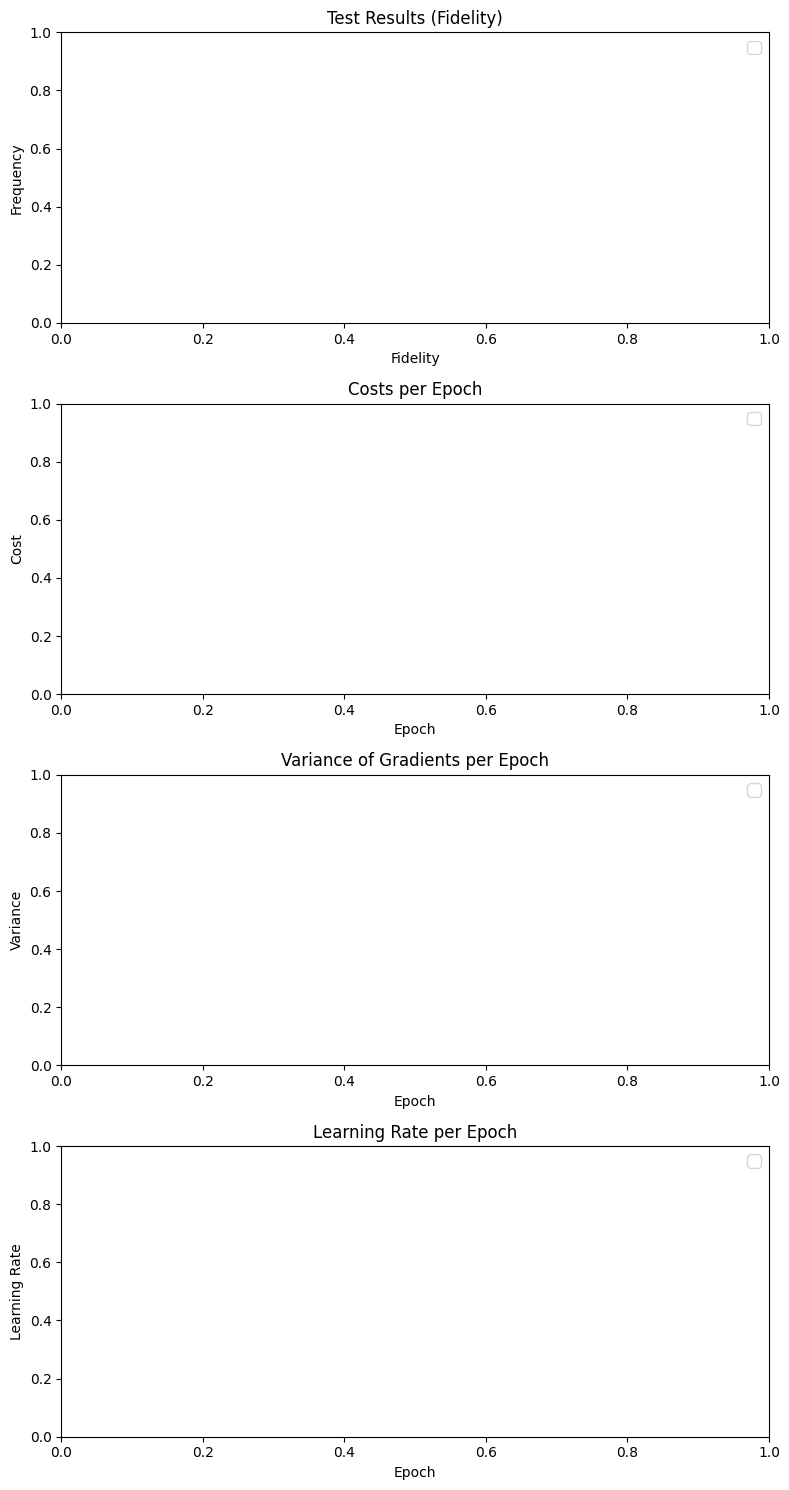

In [290]:
gate_idx = 1
selected_sets = {
                0:'',
                 1:'',
              
                }


import jax.numpy as jnp
trot = 30
N_r = 1
N_ctrl = 3

n_train = 20
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr

# Initialize the paths to the datasets (as a loop)
# data_files = [f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_fuckery/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
#               for run_idx,_ in selected_sets.items()]
# File paths
# /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle
data_files = [
    # f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1000_case3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
    '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle',
    f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
]

# Load datasets and extract data
data_results = []
for i, file_path in zip(selected_sets, data_files):
    print(f"[DEBUG] Processing file: {file_path}")
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
    except Exception as e:
        print(f"[ERROR] Could not load file {file_path}: {e}")
        continue

    print(f"[DEBUG] Loaded data keys: {data.keys()}")
    
    # Extract necessary information
    try:
        costs = [float(i) for i in data['costs'][0]]
        grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
        init_grads = grads_per_epoch[0]
        testing_results = data['testing_results'][0]
        fidelity = data['avg_fidelity'][0]
        opt_lr = data['opt_lr'][0]
        trainin_states = data['X'][0][0]
        lrs = data['lrs'][0]
        scales_per_epoch = data['scales_per_epoch'][0]
        scale_reduction_epochs = data['scale_reduction_epochs'][0]
    except KeyError as e:
        print(f"[ERROR] Missing expected key in file {file_path}: {e}")
        continue
    
    print(f"[DEBUG] Dataset {i}: Costs length = {len(costs)}, Grads length = {len(grads_per_epoch)}")
    print(f"[DEBUG] Initial Fidelity: {fidelity}, Testing Results Sample: {testing_results[:5]}")
    print(f"[DEBUG] Initial Learning Rate: {opt_lr}")

    # Calculate gradient statistics
    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    grad_norm = calculate_global_gradient_norm(grads_per_epoch)
    
    print(f"[DEBUG] Initial Gradient Variance: {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}")
    
    data_results.append({
        'costs': costs,
        'var_grad': [np.var(grads) for grads in grads_per_epoch],
        'min_grad': [np.min(np.abs(grads)) for grads in grads_per_epoch],
        'max_grad': [np.max(np.abs(grads)) for grads in grads_per_epoch],
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        'lrs': lrs,
        'scales_per_epoch': scales_per_epoch,
        'scale_reduction_epochs': scale_reduction_epochs
    })

# Plotting
fig, ax = plt.subplots(4, 1, figsize=(8, 15))

# Loop over datasets and add each to the plots
for idx, dataset in enumerate(data_results):
    label = f'Set {selected_sets[idx]} [Avg Fidelity: {dataset["avg_fidelity"]:.5f}]'
    
    # Testing results (Fidelity histogram)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=label)
    
    # Costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    ax[1].scatter(dataset["scale_reduction_epochs"], 
                  [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                  color="purple", label="Reduction Points", zorder=5)
    
    # Variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    ax[2].set_yscale('log')
    
    # Learning rates per epoch
    ax[3].plot(range(1, len(dataset['lrs']) + 1), dataset['lrs'], linewidth=1, label=label)

# Customize the plots
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

ax[3].set_title('Learning Rate per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Learning Rate')
ax[3].legend(fontsize=12)

plt.tight_layout()
plt.show()

# /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_1/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle

In [343]:
file_path = '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_no_hypertraining/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

data['epochs']

0    1000
Name: epochs, dtype: int64

[ERROR] File does not exist: /Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/U2_3/reservoirs_1/trotter_step_6/bath_False/data_run_0.pickle
[ERROR] File does not exist: /Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/U2_3/reservoirs_1/trotter_step_6/bath_False/data_run_0.pickle
[ERROR] Could not load file /Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/U2_3/reservoirs_1/trotter_step_6/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/U2_3/reservoirs_1/trotter_step_6/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/U2_3/reservoirs_1/trotter_step_6/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophi

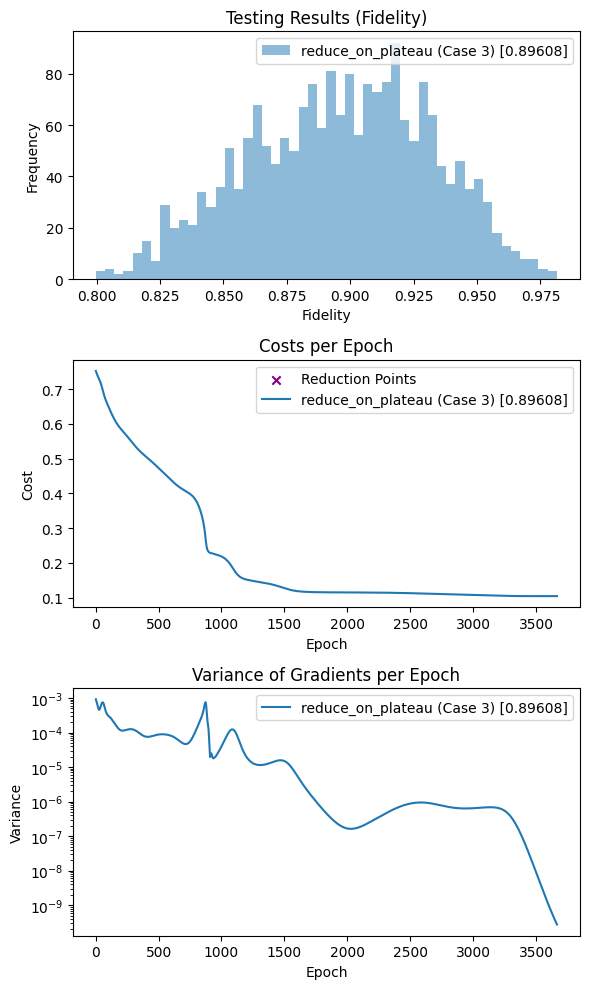

In [369]:
import os
import jax.numpy as jnp
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Configuration
gate_idx = 3
trot = 6
N_r = 1
N_ctrl = 2
labels = ['reduce_on_plateau (Case 3)',
          'Fixed LR (Case 1)',
          'Old Result']
# File paths
data_files = [
     f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
     f'/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
    f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
]

# Ensure all files exist
for file_path in data_files:
    if not os.path.exists(file_path):
        print(f"[ERROR] File does not exist: {file_path}")

# Calculate IQR
def calculate_iqr(data):
    """Calculate the Interquartile Range (IQR) of the input data."""
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr

# Calculate gradient statistics
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad

# Calculate global gradient norm
def calculate_global_gradient_norm(grads_per_epoch):
    return [np.linalg.norm(grad) for grad in grads_per_epoch]

# Load datasets
data_results = []
for file_path in data_files:
    # print(f"[DEBUG] Processing file: {file_path}")
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
    except Exception as e:
        print(f"[ERROR] Could not load file {file_path}: {e}")
        continue

    # Extract necessary information
    try:
        costs = [float(i) for i in data['costs'][0]]
        grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
        init_grads = grads_per_epoch[0]
        # try:
        #     testing_results = data['testing_results'][0]
        # except KeyError:
        #     testing_results = data['X'][0]
        testing_results = data['testing_results'][0]

        fidelity = data['avg_fidelity'][0]
        # opt_lr = data['opt_lr'][0]
        lrs = data['lrs'][0]
        scales_per_epoch = data['scales_per_epoch'][0]
        scale_reduction_epochs = data['scale_reduction_epochs'][0]
    except KeyError as e:
        lrs = []
        scales_per_epoch = []
        scale_reduction_epochs = []
        testing_results = data['fidelities'][0]
        fidelity = data['avg_fidelity'][0]
        print(data['training_size'][0])
    print(data['epochs'][0])
    # Calculate gradient statistics
    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    grad_norm = calculate_global_gradient_norm(grads_per_epoch)

    # Store results
    data_results.append({
        'costs': costs,
        'var_grad': [np.var(grads) for grads in grads_per_epoch],
        'min_grad': [np.min(np.abs(grads)) for grads in grads_per_epoch],
        'max_grad': [np.max(np.abs(grads)) for grads in grads_per_epoch],
        'grad_norm': grad_norm,
        'avg_fidelity': fidelity,
        'testing_results': testing_results,
        'lrs': lrs,
        'scales_per_epoch': scales_per_epoch,
        'scale_reduction_epochs': scale_reduction_epochs
    })

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(6, 10))

# Loop over datasets and plot
for idx, dataset in enumerate(data_results):
    label = f'{labels[idx]} [{dataset["avg_fidelity"]:.5f}]'

    # Plot testing results (Fidelity histogram)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=label)
    
    # Plot costs per epoch
    
    if idx ==0:
        ax[1].scatter(dataset["scale_reduction_epochs"], 
                    [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", marker='x',label=f"Reduction Points", zorder=5)
    else:
        ax[1].scatter(dataset["scale_reduction_epochs"], 
                    [dataset["costs"][e] for e in dataset["scale_reduction_epochs"]],
                    color="purple", marker='x', zorder=5)
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    ax[2].set_yscale('log')
    
# Customize plots
ax[0].set_title('Testing Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=10)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=10)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=10)

plt.tight_layout()
plt.show()

# import os
# import pickle
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Configuration
# trot = 30
# N_r = 1
# N_ctrl = 3
# base_path_1 = '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/'
# base_path_2 = '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/'

# # Iterate through `gate_idx` values
# data_results = {}
# combined_results = {0: [], 1: []}

# for gate_idx in range(20):
#     # File paths
#     data_files = [
#         f'{base_path_1}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle',
#         f'{base_path_2}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
#     ]
    
#     for file_idx, file_path in enumerate(data_files):
#         if not os.path.exists(file_path):
#             print(f"[ERROR] File does not exist: {file_path}")
#             continue
        
#         # print(f"[DEBUG] Processing file: {file_path}")
        
#         try:
#             with open(file_path, 'rb') as f:
#                 data = pickle.load(f)
#         except Exception as e:
#             print(f"[ERROR] Could not load file {file_path}: {e}")
#             continue

#         # Extract testing results (fidelities)
#         try:
#             testing_results = data['testing_results'][0]
#         except KeyError:
#             # print(f"[ERROR] Missing 'testing_results' in file {file_path}")
#             testing_results = data['fidelities'][0]
#             # continue
        
#         # Store results for plotting
#         label = f"Dataset {file_idx + 1} (Gate {gate_idx})"
#         if label not in data_results:
#             data_results[label] = []
#         data_results[label].extend([1 - float(res) for res in testing_results])  # Convert fidelities to infidelities
#         combined_results[file_idx].extend([float(res) for res in testing_results])


In [388]:
N_r = 1
N_ctrl = 2
gate_indices = range(20)
trotter_steps = {1, 5, 10, 15, 20, 25, 30, 35, 40}
trotter_steps = {6,12,18}
# File labels
labels = ['reduce_on_plateau (Case 3)', 'Fixed LR (Case 1)', 'Old Result']
# labels = [ 'Fixed LR (Case 0)','optimized_by_cost', 'no_hypertraining']
# Base paths for the three file sources
base_paths = [
    '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1200_case3/',
    # '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case1/',
    '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1200_case0/',
    '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/',
    # '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_no_hypertraining/'
]
def re_pickle_file(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        # Re-pickle the file to remove deprecated attributes
        with open(file_path, 'wb') as f:
            pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
        # print(f"[INFO] Re-pickled file: {file_path}")
    except Exception as e:
        print(f"[ERROR] Could not re-pickle file {file_path}: {e}")

# Initialize combined results
combined_results = {i: {trot: [] for trot in trotter_steps} for i in range(len(base_paths))}

# Iterate through gates and trotter steps
for gate_idx in gate_indices:
    for trot in trotter_steps:
        for file_idx, base_path in enumerate(base_paths):
            # Construct the file path
            if file_idx == 0:
                file_path = (
                f"{base_path}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle"
            )
            else:
                file_path = (
                    f"{base_path}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle"
                )

            # Try to load the file
            try:
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
                re_pickle_file(file_path)
            except Exception as e:
                # print(f"[ERROR] Could not load file {file_path}: {e}")
                continue

            # Extract testing results (fidelities)
            try:
                testing_results = data['testing_results'][0]
            except KeyError:
                testing_results = data['fidelities'][0]
            
            # Aggregate fidelities for the current trotter step
            combined_results[file_idx][trot].extend([float(res) for res in testing_results])


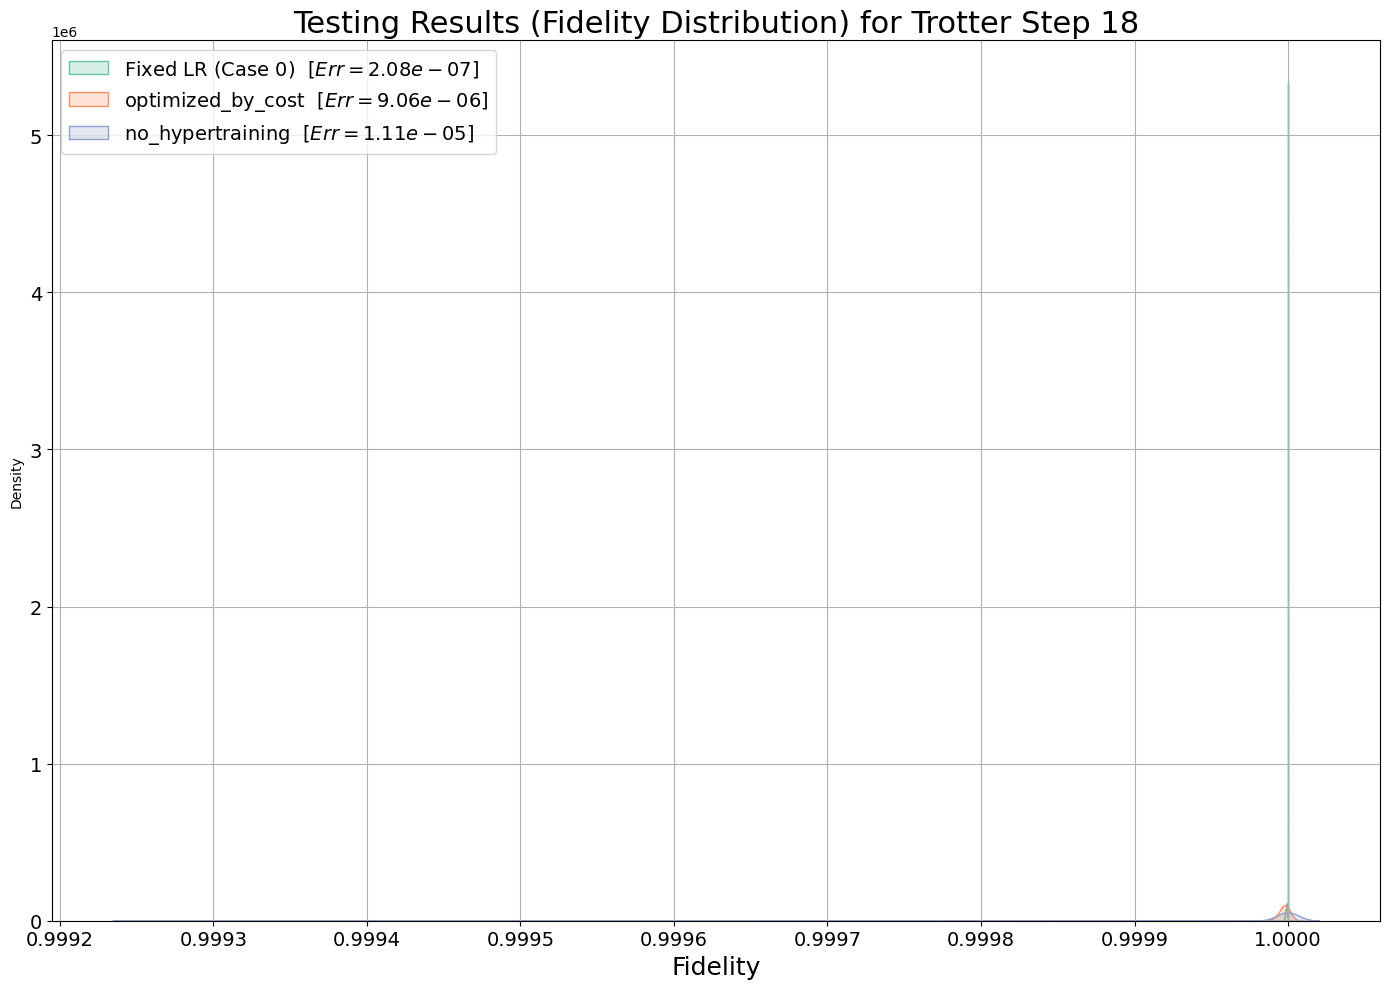

In [386]:

# Plotting Function
def plot_combined_kde(combined_results, trotter_step):
    """
    Plot KDE of testing results (fidelities) for a specific trotter step.
    
    Args:
        combined_results: dict containing testing results organized by file index and trotter step.
        trotter_step: int, the trotter step to plot.
    """
    if trotter_step not in trotter_steps:
        print(f"[ERROR] Invalid trotter step: {trotter_step}. Valid steps: {sorted(trotter_steps)}")
        return
    
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.grid(True, zorder=10)
    
    cmap = plt.get_cmap('Set2')
    
    # Plot KDE for each file index at the specified trotter step
    for file_idx, results_by_trot in combined_results.items():
        fidelities = results_by_trot[trotter_step]
        if 1.0 - np.mean(fidelities) < 1e-4:
            sns.kdeplot(
                fidelities, ax=ax, fill=True, multiple="layer",
                color=cmap(file_idx), label=f"{labels[file_idx]}  [$Err = {1-np.mean(fidelities):.2e}$]"
            )
            # sns.kdeplot(
            #     fidelities, ax=ax, fill=True, multiple="layer",
            #     color=cmap(file_idx), label=f"{labels[file_idx]}  [$Err = {np.log10(1-np.mean(fidelities))}$]"
            # )
        else:
            sns.kdeplot(
                fidelities, ax=ax, fill=True, multiple="layer",
                color=cmap(file_idx), label=f"{labels[file_idx]} [$\\bar{{F}} = {np.mean(fidelities):.5f}$]"
            )
    
    # Customize plot
    ax.set_xlabel('Fidelity', fontsize=18)
    ax.set_title(f'Testing Results (Fidelity Distribution) for Trotter Step {trotter_step}', fontsize=22)
    ax.legend(loc='upper left', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()

# Example Usage
plot_combined_kde(combined_results, trotter_step=18)

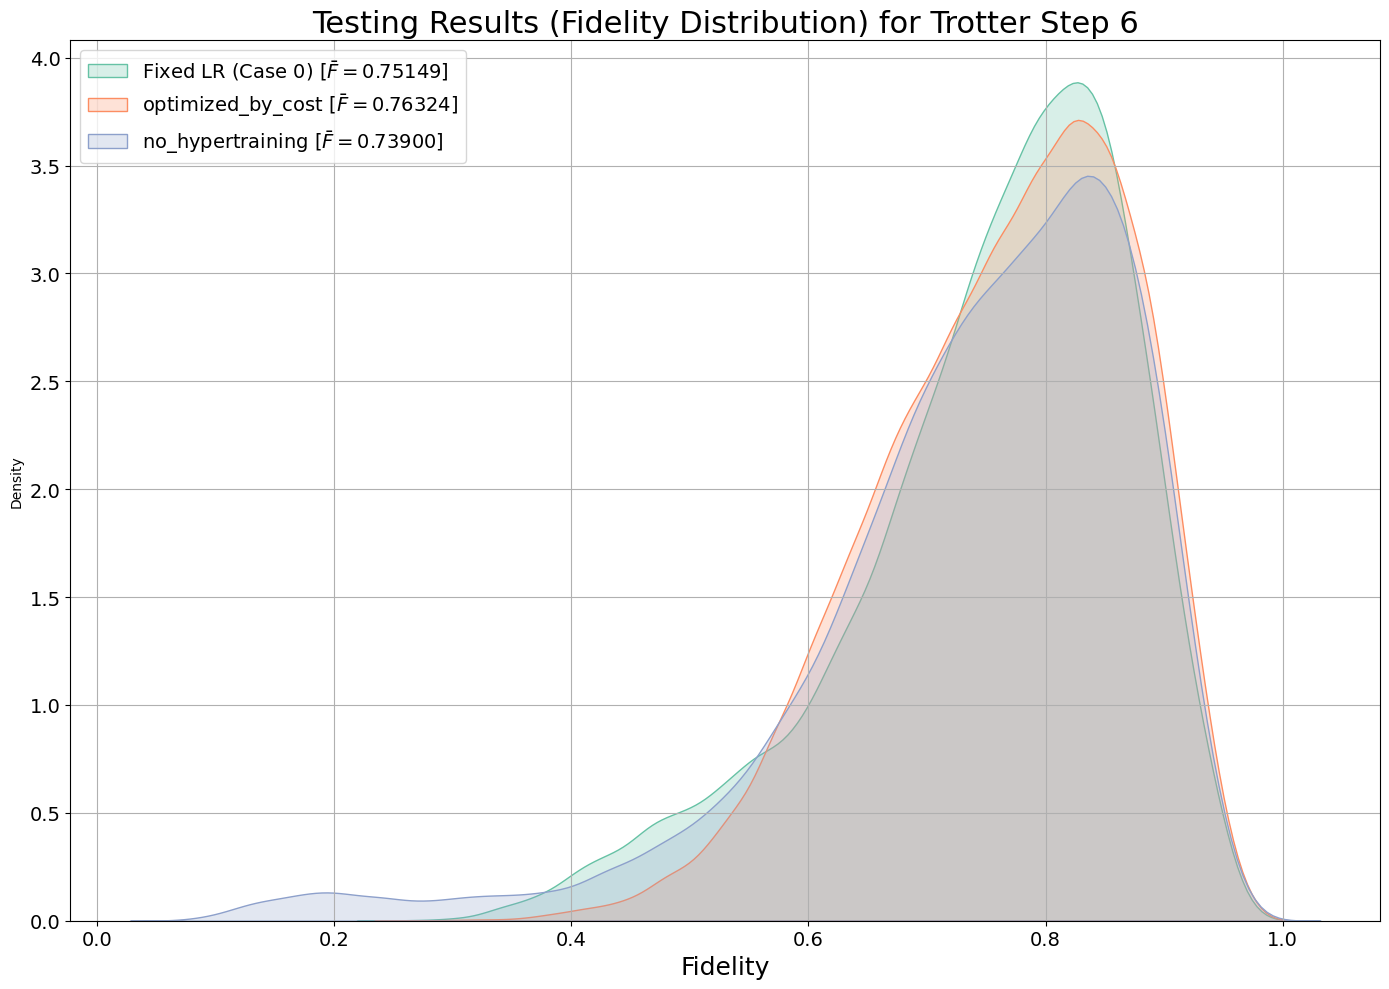

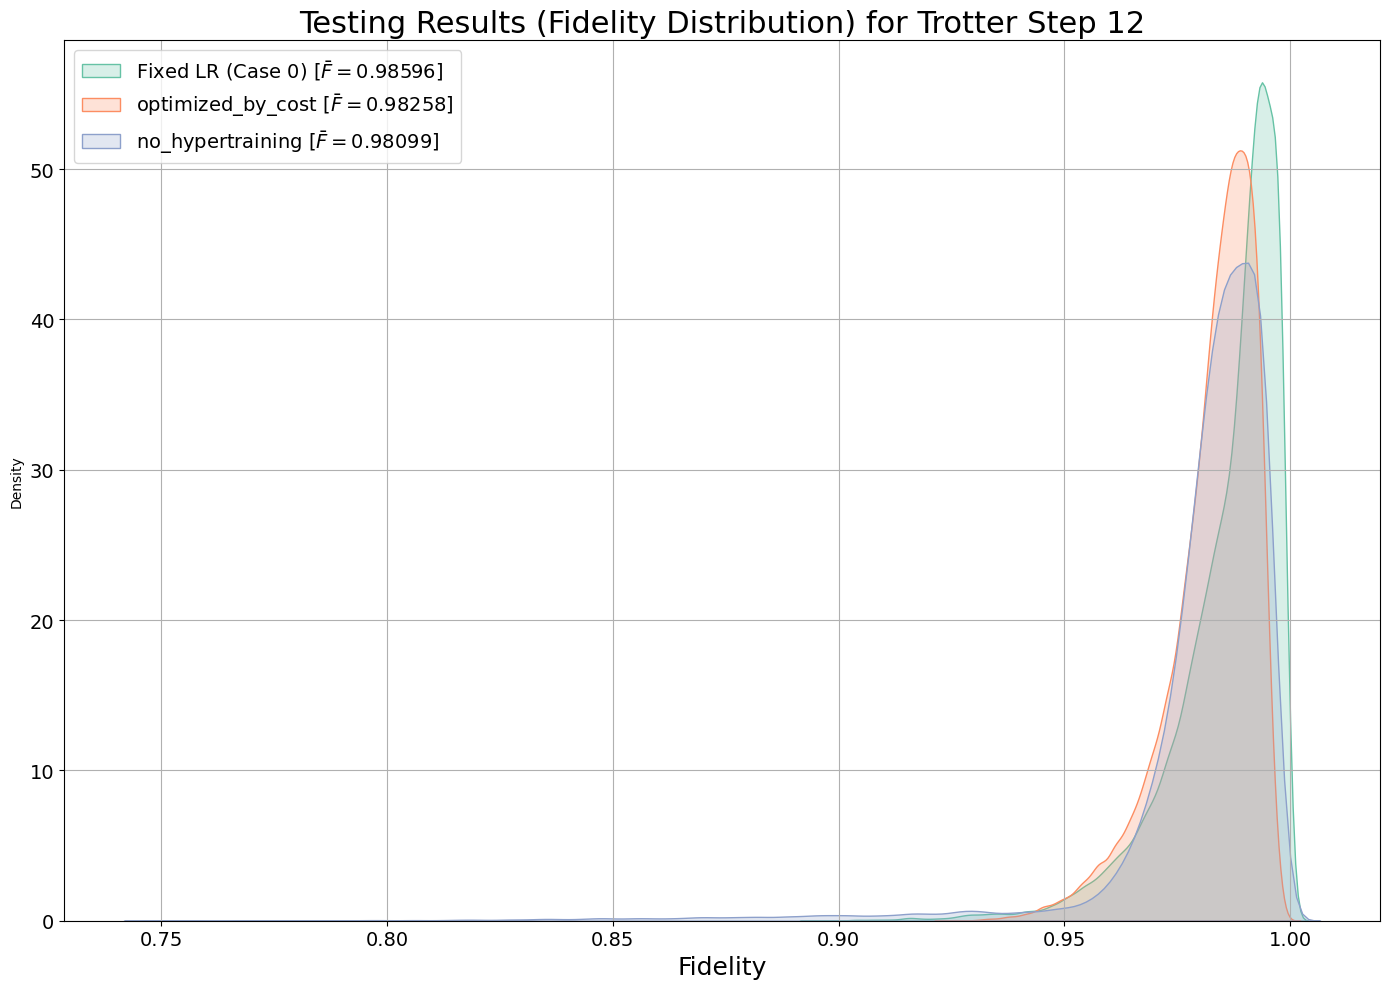

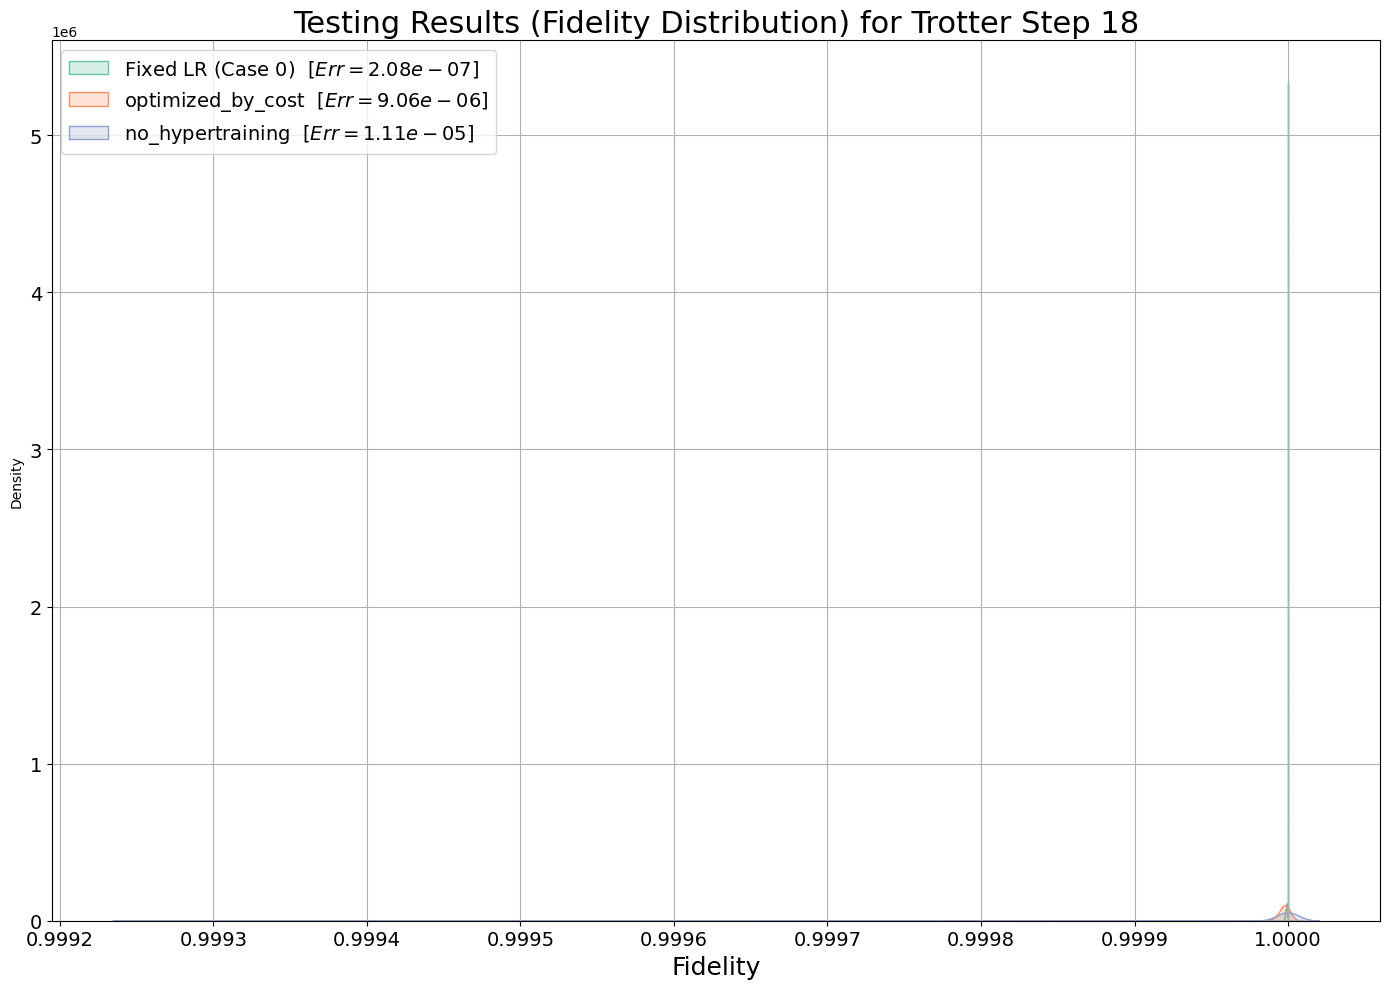

In [387]:
# Example Usage
plot_combined_kde(combined_results, trotter_step=6)
plot_combined_kde(combined_results, trotter_step=12)
plot_combined_kde(combined_results, trotter_step=18)

In [325]:
N_r = 1
N_ctrl = 3
gate_indices = range(20)
trotter_steps = {1, 5, 10, 15, 20, 25, 30, 35, 40}

# Base paths for the two file sources
base_paths = [
    '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_case3/',
    '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/'
]

# Initialize combined results
combined_results = {0: {trot: [] for trot in trotter_steps}, 1: {trot: [] for trot in trotter_steps}}

# Iterate through gates and trotter steps
for gate_idx in gate_indices:
    for trot in trotter_steps:
        for file_idx, base_path in enumerate(base_paths):
            # Construct the file path
            file_path = (
                f"{base_path}U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle"
            )

            try:
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
            except Exception as e:
                print(f"[ERROR] Could not load file {file_path}: {e}")
                continue

            # Extract testing results (fidelities)
            try:
                testing_results = data['testing_results'][0]
            except KeyError:
                
                testing_results = data['fidelities'][0]
               
            
            combined_results[file_idx][trot].extend([float(res) for res in testing_results])





/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)
/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contain

[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_35/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_35/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_5/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle'


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_15/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle: [Errno 2] No such file or directory:

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle'


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_16/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle: [Errno 2] No such file or directory:

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle'


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_17/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle: [Errno 2] No such file or directory:

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle'


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_18/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle: [Errno 2] No such file or directory:

/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_15/bath_False/data_run_0.pickle'


/var/folders/xx/w2tzbky134bg3g8mct87xb8c0000gn/T/ipykernel_79955/2420087529.py:26: DeprecationWarning: Pickled array contains an aval with a named_shape attribute. This is deprecated and the code path supporting such avals will be removed. Please re-pickle the array.
  data = pickle.load(f)


[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_25/bath_False/data_run_0.pickle'
[ERROR] Could not load file /Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U3_19/reservoirs_1/trotter_step_30/bath_False/data_run_0.pickle'


In [337]:
combined_results.keys()

dict_keys([0, 1])

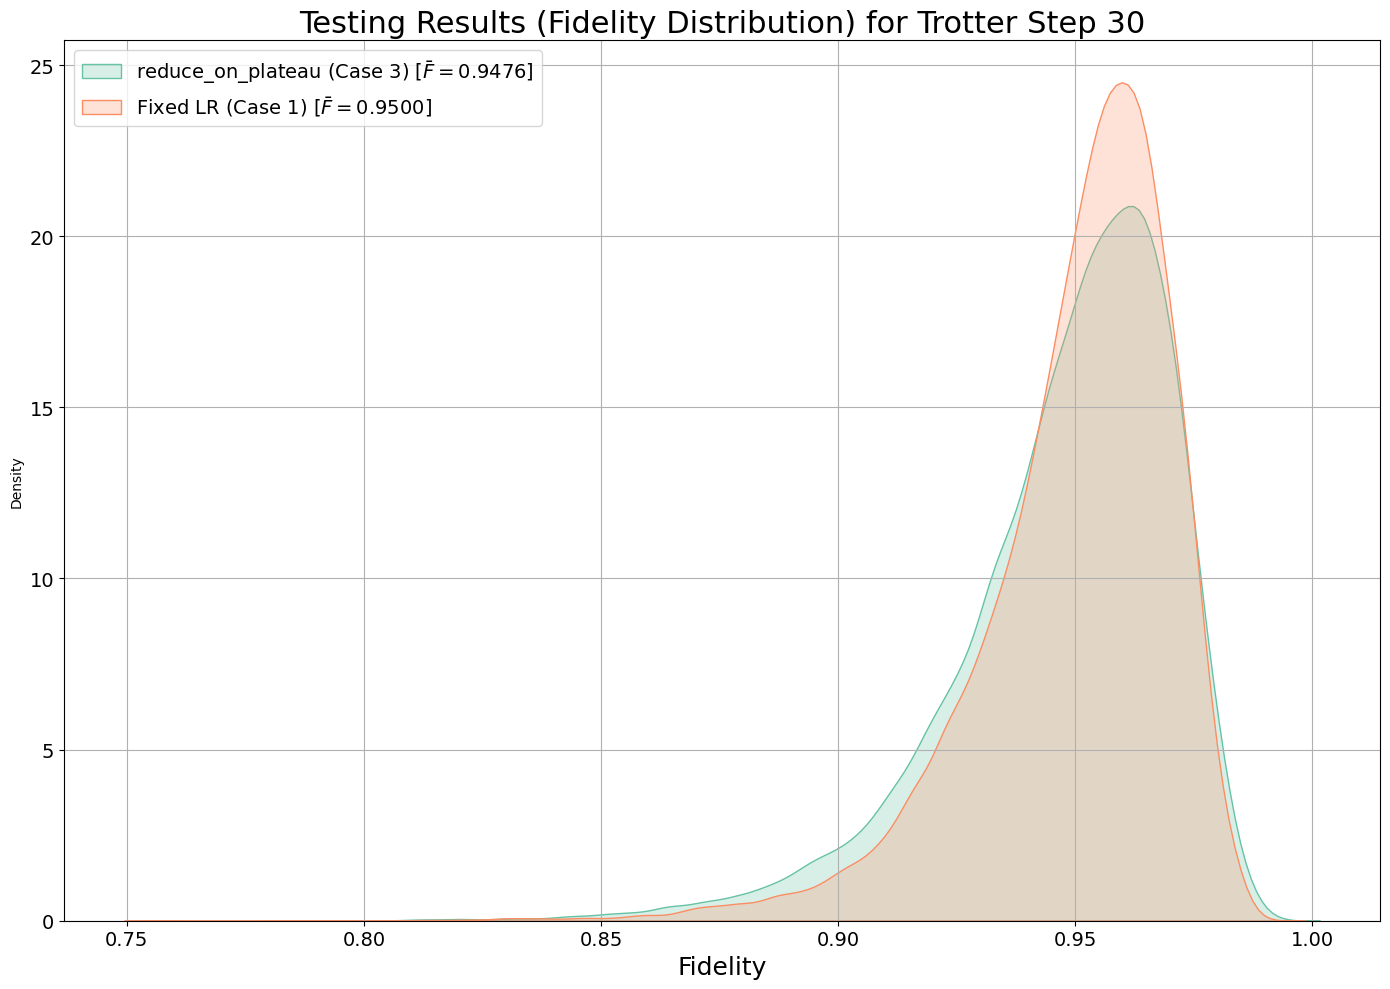

In [338]:

# Plotting Function
def plot_combined_kde(combined_results, trotter_step):
    """
    Plot KDE of testing results (fidelities) for a specific trotter step.
    
    Args:
        combined_results: dict containing testing results organized by file index and trotter step.
        trotter_step: int, the trotter step to plot.
    """
    if trotter_step not in trotter_steps:
        print(f"[ERROR] Invalid trotter step: {trotter_step}. Valid steps: {sorted(trotter_steps)}")
        return
    
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.grid(True, zorder=10)
    
    cmap = plt.get_cmap('Set2')
    
    # Plot KDE for each file index at the specified trotter step
    for file_idx, results_by_trot in combined_results.items():
        fidelities = results_by_trot[trotter_step]
        sns.kdeplot(
            fidelities, ax=ax, fill=True, multiple="layer",
            color=cmap(file_idx), label=f"{labels[file_idx]} [$\\bar{{F}} = {np.mean(fidelities):.4f}$]"
        )
    
    # Customize plot
    ax.set_xlabel('Fidelity', fontsize=18)
    ax.set_title(f'Testing Results (Fidelity Distribution) for Trotter Step {trotter_step}', fontsize=22)
    ax.legend(loc='upper left', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()

# Example Usage
plot_combined_kde(combined_results, trotter_step=30)

Epoch Loss       Scale      Plateau    Cooldown   Avg Value 
------------------------------------------------------------
1     0.5025     1.0000     0          0          0.5025    
2     0.4940     1.0000     0          0          0.4983    
3     0.4927     1.0000     0          0          0.4964    
4     0.4918     1.0000     0          0          0.4953    
5     0.4778     1.0000     0          0          0.0000    
6     0.4725     1.0000     0          0          0.4725    
7     0.4763     1.0000     0          0          0.4744    
8     0.4670     1.0000     0          0          0.4719    
9     0.4555     1.0000     0          0          0.4678    
10    0.4553     1.0000     0          0          0.0000    
11    0.4451     1.0000     0          0          0.4451    
12    0.4398     1.0000     0          0          0.4424    
13    0.4381     1.0000     0          0          0.4410    
14    0.4220     1.0000     0          0          0.4362    
15    0.4177     1.0000 

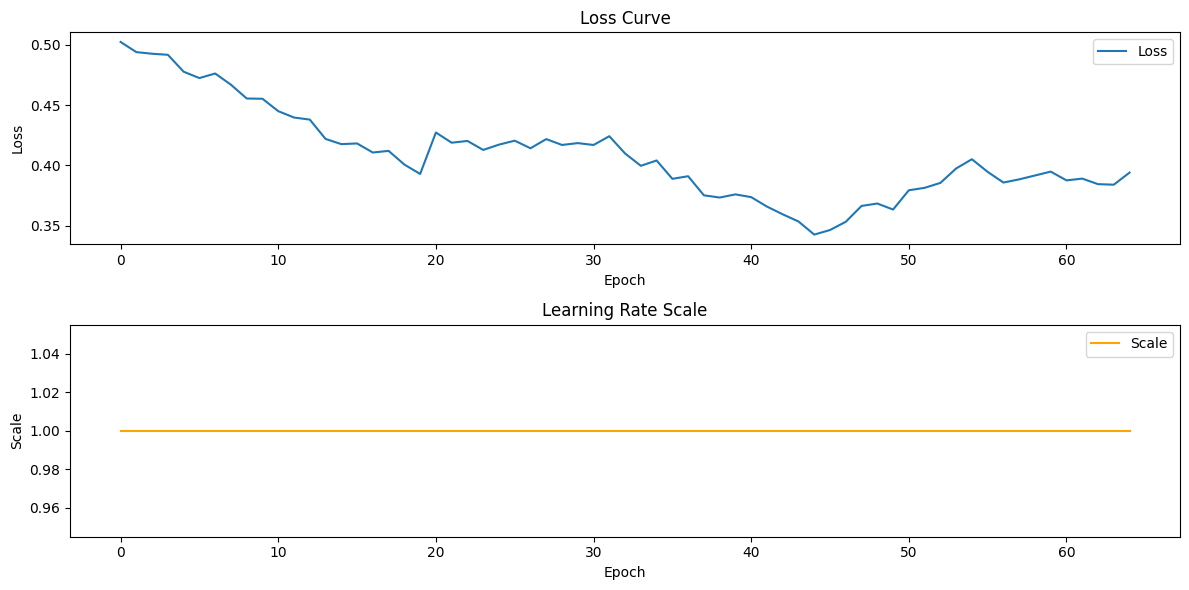

In [89]:
import jax
import jax.numpy as jnp
import optax

# Define ReduceLROnPlateau parameters
PATIENCE = 20
COOLDOWN = 10
FACTOR = 0.75
RTOL = 1e-3
ACCUMULATION_SIZE = 5
MIN_SCALE = 0.01

# Initialize the scheduler
reduce_on_plateau = optax.contrib.reduce_on_plateau(
    factor=FACTOR,
    patience=PATIENCE,
    rtol=RTOL,
    cooldown=COOLDOWN,
    accumulation_size=ACCUMULATION_SIZE,
    min_scale=MIN_SCALE,
)

# Initialize the state
initial_state = reduce_on_plateau.init(None)
np.random.seed(42)

# Base loss with periodic fluctuations
loss_values = (
    np.concatenate([
        np.linspace(0.5, 0.4, 20),  # Gradual improvement
        np.full(10, 0.42),         # Plateau
        np.linspace(0.42, 0.35, 15),  # Further improvement
        np.linspace(0.35, 0.4, 10),   # Slight degradation
        np.full(10, 0.39),            # Stagnation
    ]) + np.random.normal(0, 0.005, 65)  # Add noise
)

state = initial_state
scales = []
plateau_counts = []
cooldown_counts = []
average_values = []

print(f"{'Epoch':<5} {'Loss':<10} {'Scale':<10} {'Plateau':<10} {'Cooldown':<10} {'Avg Value':<10}")
print("-" * 60)

for epoch, loss in enumerate(loss_values):
    # Simulate the update
    updates, state = reduce_on_plateau.update(
        updates=None, state=state, value=jnp.array(loss, dtype=jnp.float32)
    )
    
    # Log the state
    scales.append(state.scale)
    plateau_counts.append(state.plateau_count)
    cooldown_counts.append(state.cooldown_count)
    average_values.append(state.avg_value)

    print(
        f"{epoch+1:<5} {loss:<10.4f} {state.scale:<10.4f} {state.plateau_count:<10} "
        f"{state.cooldown_count:<10} {state.avg_value:<10.4f}"
    )


plt.figure(figsize=(12, 6))

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Scale curve
plt.subplot(2, 1, 2)
plt.plot(scales, label='Scale', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Scale')
plt.title('Learning Rate Scale')
plt.legend()

plt.tight_layout()
plt.show()

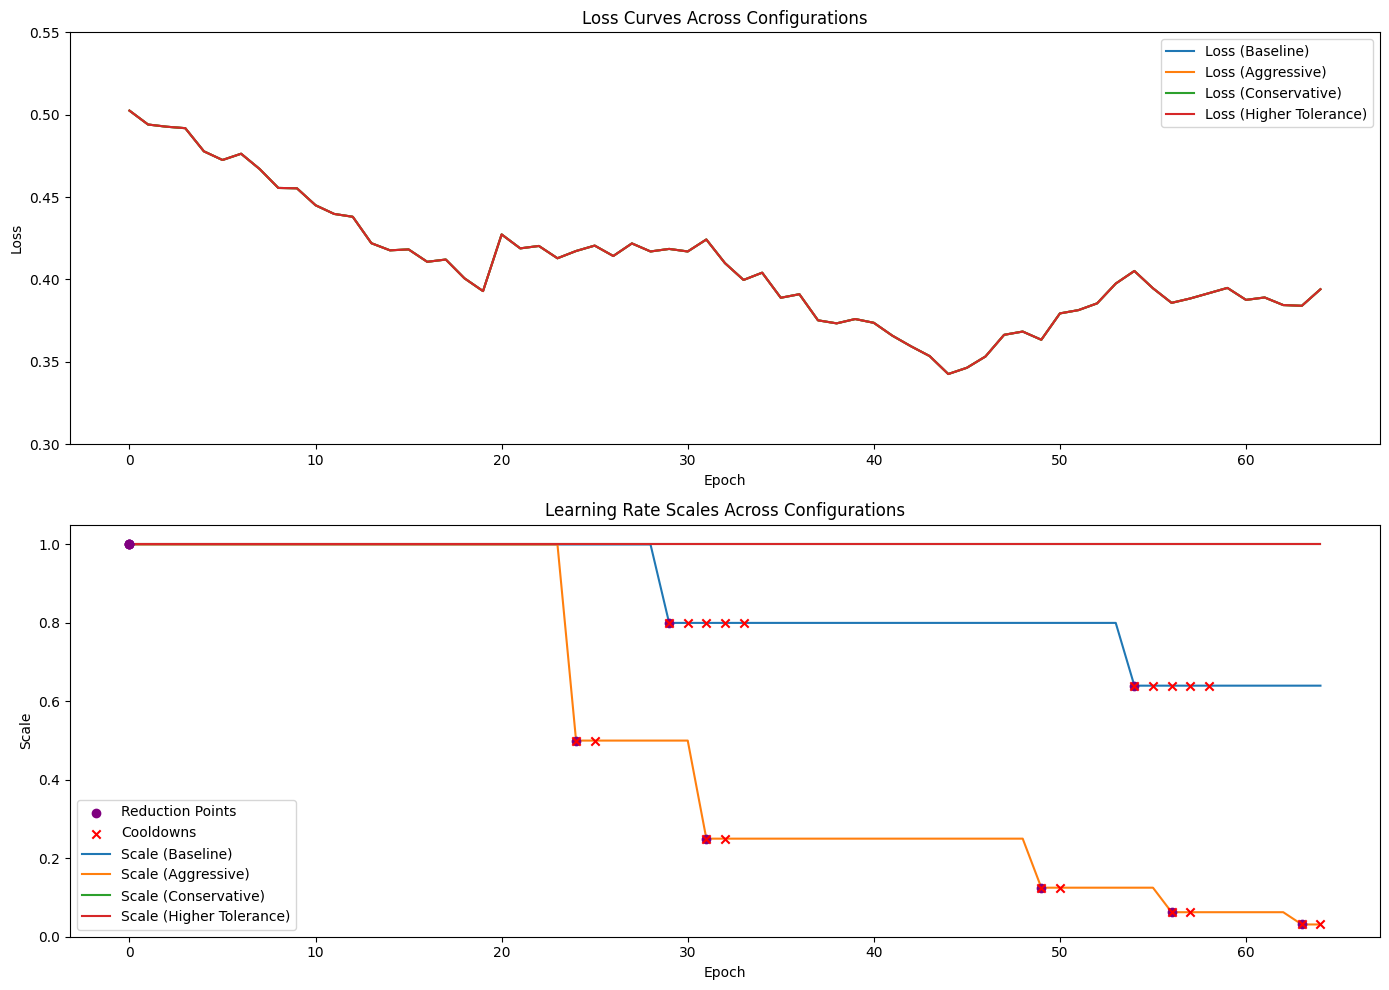

In [105]:
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
import numpy as np

# Shared simulated loss values with noise
np.random.seed(42)
loss_values = (
    np.concatenate([
        np.linspace(0.5, 0.4, 20),  # Gradual improvement
        np.full(10, 0.42),         # Plateau
        np.linspace(0.42, 0.35, 15),  # Further improvement
        np.linspace(0.35, 0.4, 10),   # Slight degradation
        np.full(10, 0.39),            # Stagnation
    ]) + np.random.normal(0, 0.005, 65)  # Add noise
)

# Configurations to compare
configs = {
    "Baseline": {"PATIENCE": 10, "COOLDOWN": 5, "FACTOR": 0.8, "RTOL": 1e-3, "ACCUMULATION_SIZE": 1},
    "Aggressive": {"PATIENCE": 5, "COOLDOWN": 2, "FACTOR": 0.5, "RTOL": 1e-2, "ACCUMULATION_SIZE": 1},
    "Conservative": {"PATIENCE": 20, "COOLDOWN": 10, "FACTOR": 0.9, "RTOL": 1e-4, "ACCUMULATION_SIZE": 5},
    "Higher Tolerance": {"PATIENCE": 10, "COOLDOWN": 5, "FACTOR": 0.8, "RTOL": 5e-3, "ACCUMULATION_SIZE": 3},
}

# Run the scheduler for each configuration
results = {}

for name, params in configs.items():
    reduce_on_plateau = optax.contrib.reduce_on_plateau(
        factor=params["FACTOR"],
        patience=params["PATIENCE"],
        rtol=params["RTOL"],
        cooldown=params["COOLDOWN"],
        accumulation_size=params["ACCUMULATION_SIZE"],
        min_scale=0.01,
    )

    # Initialize the state
    state = reduce_on_plateau.init(None)
    scales = []
    reduction_epochs = []
    cooldown_epochs = []

    for epoch, loss in enumerate(loss_values):
        updates, state = reduce_on_plateau.update(
            updates=None, state=state, value=jnp.array(loss, dtype=jnp.float32)
        )

        scales.append(state.scale)
        if len(reduction_epochs) == 0 or state.scale < scales[-2]:
            reduction_epochs.append(epoch)
        if state.cooldown_count > 0:
            cooldown_epochs.append(epoch)

    results[name] = {
        "loss_values": loss_values,
        "scales": scales,
        "reduction_epochs": reduction_epochs,
        "cooldown_epochs": cooldown_epochs,
    }


# Plot comparison
plt.figure(figsize=(14, 10))

# Plot 1: Loss curves
plt.subplot(2, 1, 1)
for name, result in results.items():
    plt.plot(result["loss_values"], label=f"Loss ({name})")
    # plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
    #             color="purple", label="Reduction Points", zorder=5)
    # plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
    #             color="red",marker='x',  label="Cooldowns",zorder=5)
plt.title("Loss Curves Across Configurations")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.3, 0.55)  # Fixed y-scale
plt.legend()

# Plot 2: Learning rate scales
plt.subplot(2, 1, 2)
i=0
for name, result in results.items():
    
    if i ==0:
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", label="Reduction Points", zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red",marker='x',  label="Cooldowns",zorder=5)
    else:
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red",marker='x',  zorder=5)
    plt.plot(result["scales"], label=f"Scale ({name})")
    i+=1
plt.title("Learning Rate Scales Across Configurations")
plt.xlabel("Epoch")
plt.ylabel("Scale")
plt.ylim(0.0, 1.05)  # Fixed y-scale
plt.legend()

plt.tight_layout()
plt.show()

In [133]:
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
import numpy as np

# Simulated loss values with noise
np.random.seed(42)
loss_values = (
    np.concatenate([
        np.linspace(0.5, 0.4, 20),  # Gradual improvement\
        np.full(10, 0.42),         # Plateau
        np.linspace(0.42, 0.35, 15),  # Further improvement
        # np.linspace(0.35, 0.4, 10),   # Slight degradation
         np.linspace(0.35, 0.32, 5),
        np.linspace(0.32, 0.315, 20)      
    ]) + np.random.normal(0, 0.002, 70)  # Add noise
)

# Function to generate configs for one parameter variation
def generate_configs(param_name, values):
    base_config = {"PATIENCE": 2, "COOLDOWN": 0, "FACTOR": 0.8, "RTOL": 1e-3, "ACCUMULATION_SIZE": 3}
    configs = {}
    for value in values:
        config = base_config.copy()
        config[param_name] = value
        configs[f"{param_name}={value}"] = config
    return configs

# Parameter values to compare
param_to_vary = "RTOL"  # Change this to "COOLDOWN", "FACTOR", "RTOL", or "ACCUMULATION_SIZE"
param_values = [1e-4, 1e-3, 1e-2, 1e-1]  # Example values for PATIENCE
configs = generate_configs(param_to_vary, param_values)

# Run the scheduler for each configuration
results = {}

for name, params in configs.items():
    reduce_on_plateau = optax.contrib.reduce_on_plateau(
        factor=params["FACTOR"],
        patience=params["PATIENCE"],
        rtol=params["RTOL"],
        cooldown=params["COOLDOWN"],
        accumulation_size=params["ACCUMULATION_SIZE"],
        # min_scale=0.01,
    )

    # Initialize the state
    state = reduce_on_plateau.init(None)
    scales = []
    reduction_epochs = []
    cooldown_epochs = []

    for epoch, loss in enumerate(loss_values):
        updates, state = reduce_on_plateau.update(
            updates=None, state=state, value=jnp.array(loss, dtype=jnp.float32)
        )

        scales.append(state.scale)
        if len(reduction_epochs) == 0 or state.scale < scales[-2]:
            reduction_epochs.append(epoch)
        if state.cooldown_count > 0:
            cooldown_epochs.append(epoch)

    results[name] = {
        "loss_values": loss_values,
        "scales": scales,
        "reduction_epochs": reduction_epochs,
        "cooldown_epochs": cooldown_epochs,
    }


# Plot comparison
plt.figure(figsize=(14, 10))

# Plot 1: Loss curves
plt.subplot(2, 1, 1)
for name, result in results.items():
    plt.plot(result["loss_values"], label=f"Loss ({name})")
plt.title(f"Loss Curves with Varying {param_to_vary}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.3, 0.55)  # Fixed y-scale
plt.legend()

# Plot 2: Learning rate scales
plt.subplot(2, 1, 2)
i = 0
for name, result in results.items():
    if i ==0:
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", label="Reduction Points", zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red",marker='x',  label="Cooldowns",zorder=5)
    else:
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red",marker='x',  zorder=5)
    plt.plot(result["scales"], label=f"Scale ({name})")
    i+=1
plt.title(f"Learning Rate Scales with Varying {param_to_vary}")
plt.xlabel("Epoch")
plt.ylabel("Scale")
plt.ylim(0.0, 1.05)  # Fixed y-scale
plt.legend()

plt.tight_layout()
plt.show()


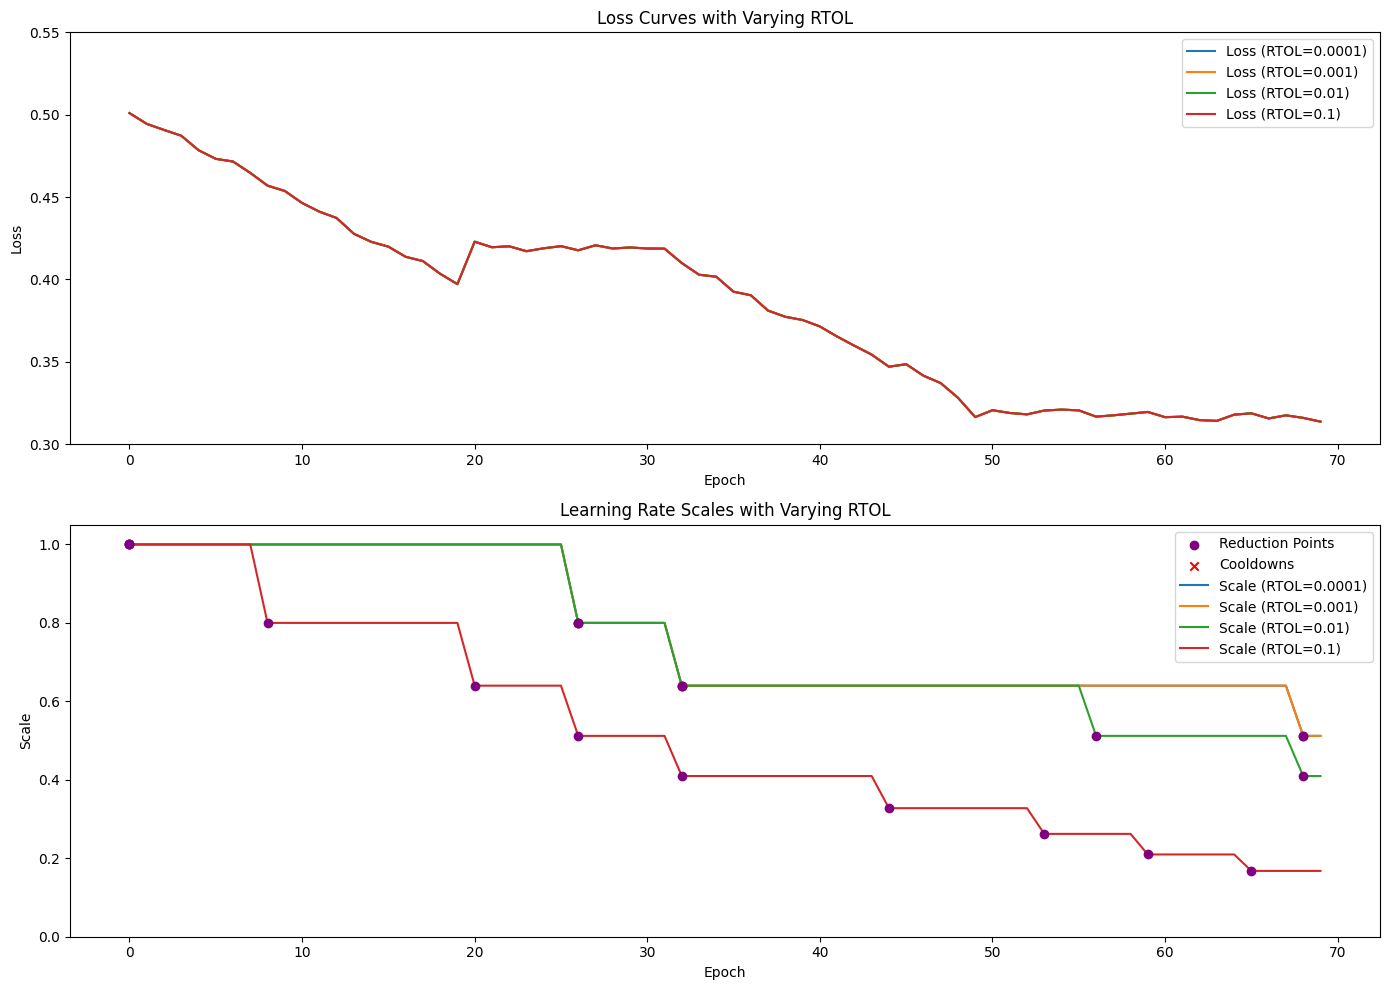

In [134]:

# Plot comparison
plt.figure(figsize=(14, 10))

# Plot 1: Loss curves
plt.subplot(2, 1, 1)
for name, result in results.items():
    plt.plot(result["loss_values"], label=f"Loss ({name})")
plt.title(f"Loss Curves with Varying {param_to_vary}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0.3, 0.55)  # Fixed y-scale
plt.legend()

# Plot 2: Learning rate scales
plt.subplot(2, 1, 2)
i = 0
for name, result in results.items():
    if i ==0:
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", label="Reduction Points", zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red",marker='x',  label="Cooldowns",zorder=5)
    else:
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red",marker='x',  zorder=5)
    plt.plot(result["scales"], label=f"Scale ({name})")
    i+=1
plt.title(f"Learning Rate Scales with Varying {param_to_vary}")
plt.xlabel("Epoch")
plt.ylabel("Scale")
plt.ylim(0.0, 1.05)  # Fixed y-scale
plt.legend()

plt.tight_layout()
plt.show()

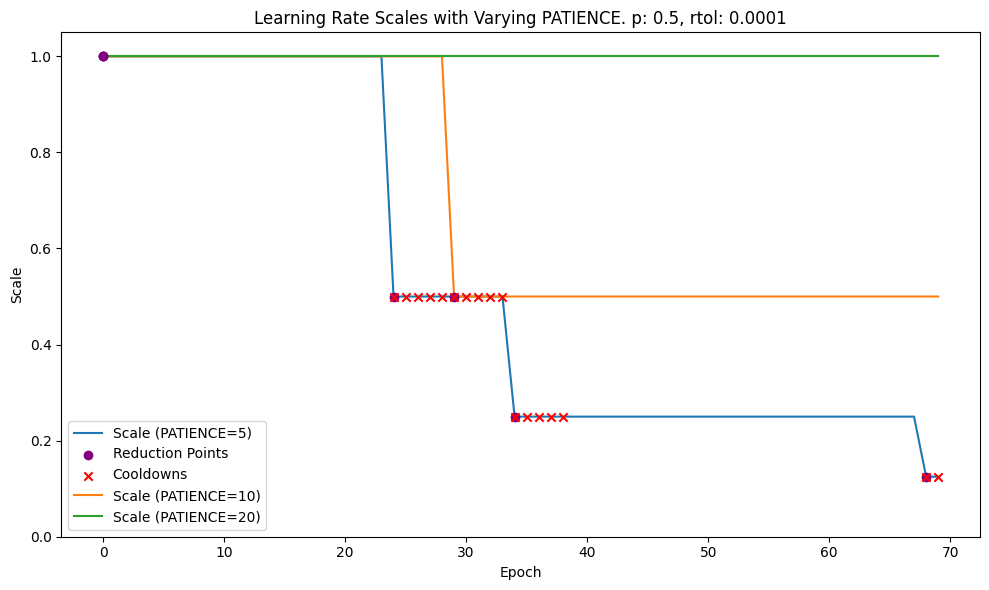

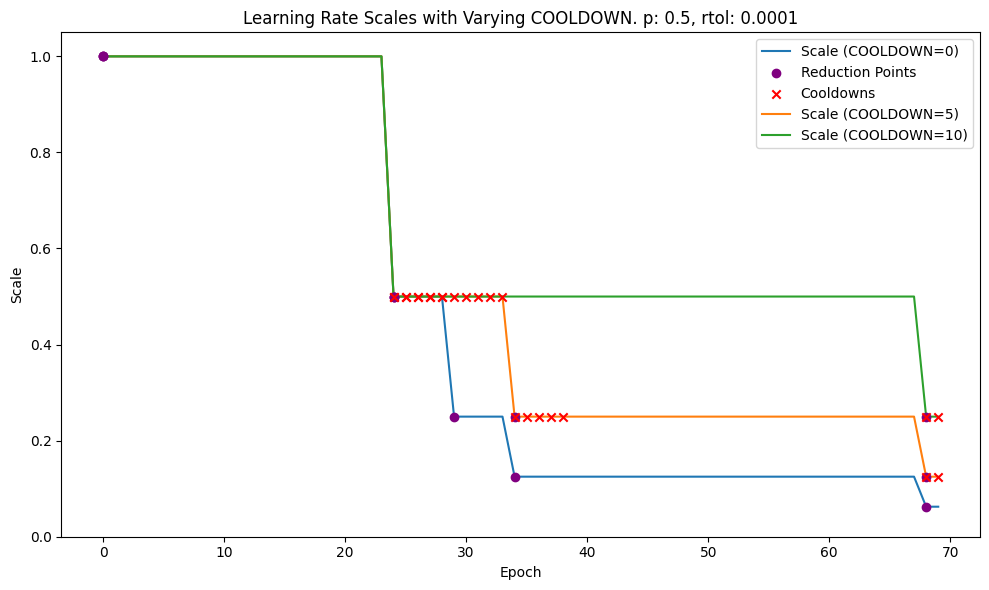

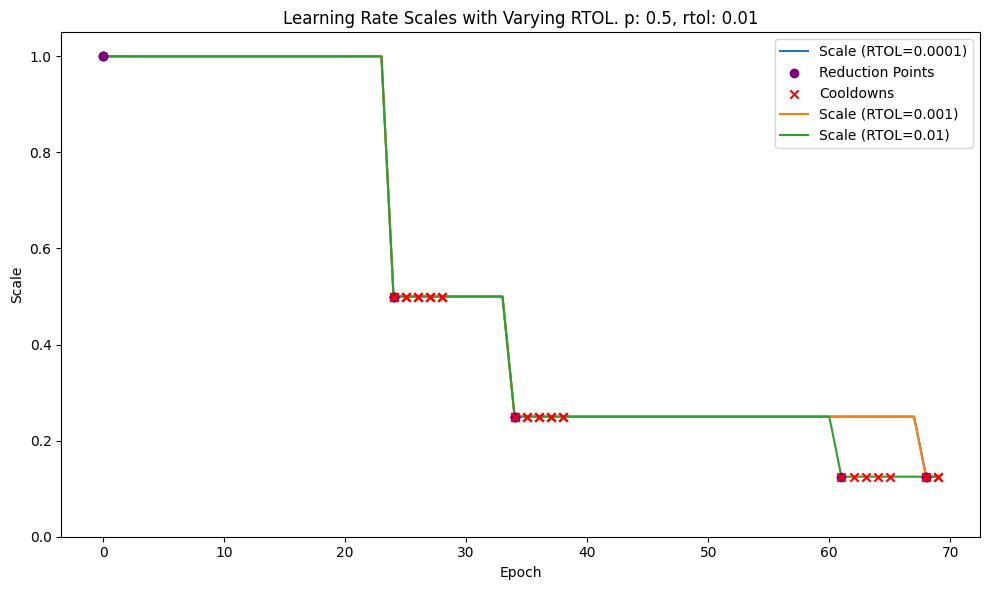

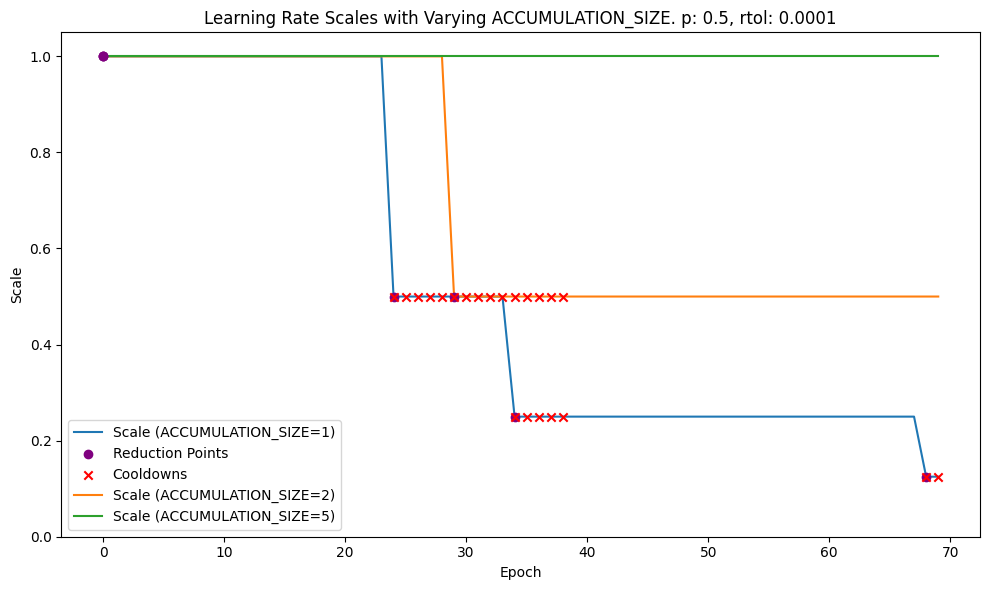

In [131]:
# Simulated loss values with noise
np.random.seed(42)

# Simulated loss values with noise
np.random.seed(42)
loss_values = (
    np.concatenate([
        np.linspace(0.5, 0.4, 20),  # Gradual improvement\
        np.full(10, 0.42),         # Plateau
        np.linspace(0.42, 0.35, 15),  # Further improvement
        # np.linspace(0.35, 0.4, 10),   # Slight degradation
         np.linspace(0.35, 0.32, 5),
        np.linspace(0.32, 0.315, 20)      
    ]) + np.random.normal(0, 0.002, 70)  # Add noise
)


# Function to generate configs for one parameter variation
def generate_configs(param_name, values):
    base_config = {"PATIENCE": 5, "COOLDOWN": 5, "FACTOR": 0.5, "RTOL": 1e-4, "ACCUMULATION_SIZE": 1}
    configs = {}
    for value in values:
        config = base_config.copy()
        config[param_name] = value
        configs[f"{param_name}={value}"] = config
    return configs

# Define parameter variations
parameter_variations = {
    "PATIENCE": [5, 10, 20],
    "COOLDOWN": [0, 5, 10],
    # "FACTOR": [0.5, 0.75, 0.9],
    "RTOL": [1e-4, 1e-3, 1e-2],
    "ACCUMULATION_SIZE": [1,2, 5],
}

# Iterate over each parameter and plot results
for param_to_vary, param_values in parameter_variations.items():
    configs = generate_configs(param_to_vary, param_values)

    results = {}
    for name, params in configs.items():
        reduce_on_plateau = optax.contrib.reduce_on_plateau(
            factor=params["FACTOR"],
            patience=params["PATIENCE"],
            rtol=params["RTOL"],
            cooldown=params["COOLDOWN"],
            accumulation_size=params["ACCUMULATION_SIZE"],
            min_scale=0.01,
        )

        # Initialize the state
        state = reduce_on_plateau.init(None)
        scales = []
        reduction_epochs = []
        cooldown_epochs = []

        for epoch, loss in enumerate(loss_values):
            updates, state = reduce_on_plateau.update(
                updates=None, state=state, value=jnp.array(loss, dtype=jnp.float32)
            )

            scales.append(state.scale)
            if len(reduction_epochs) == 0 or state.scale < scales[-2]:
                reduction_epochs.append(epoch)
            if state.cooldown_count > 0:
                cooldown_epochs.append(epoch)

        results[name] = {
            "scales": scales,
            "reduction_epochs": reduction_epochs,
            "cooldown_epochs": cooldown_epochs,
        }

    # Plot the learning rate scales
    plt.figure(figsize=(10, 6))
    for name, result in results.items():
        plt.plot(result["scales"], label=f"Scale ({name})")
        plt.scatter(result["reduction_epochs"], [result["scales"][e] for e in result["reduction_epochs"]],
                    color="purple", label="Reduction Points" if name == list(results.keys())[0] else None, zorder=5)
        plt.scatter(result["cooldown_epochs"], [result["scales"][e] for e in result["cooldown_epochs"]],
                    color="red", marker='x', label="Cooldowns" if name == list(results.keys())[0] else None, zorder=5)

    plt.title(f"Learning Rate Scales with Varying {param_to_vary}. p: {params['FACTOR']}, rtol: {params['RTOL']}")
    plt.xlabel("Epoch")
    plt.ylabel("Scale")
    plt.ylim(0.0, 1.05)  # Fixed y-scale
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Define the parameters
gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1
selected_sets = [3,9]  # List of selected data run indices
trainsize = 20
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    return iqr
# Initialize the plot for costs per epoch
plt.figure(figsize=(10, 8))
# Loop through the selected sets
for idx, run_idx in enumerate(selected_sets):
    # Load the dataset
    file_path =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    file_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract data
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    testing_results = data['testing_results'][0]
    fidelity = 1 - data['avg_fidelity'][0]
    opt_lr = data['opt_lr'][0]
    
    # Convert jax arrays to Python floats without rounding
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    var_grad = float(jnp.mean(data['var_grad'][0]))
    iqr_var_grad = calculate_iqr(jnp.array(data['var_grad'][0]))
    min_grad = float(jnp.min(data['min_grad'][0]))
    max_grad = float(jnp.max(data['max_grad'][0]))

    # Print the results
    print(f"Set {run_idx + 1} (data_run_{run_idx}):")
    print(f"Average Fidelity: {mean_fidelity} ± {std_fidelity}")
    print(f"Initial Variance: {var_grad:.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {min_grad:.5e}, Max Gradient: {max_grad:.5e}\n")
    # Plot the cost per epoch for this dataset
    plt.plot(range(1, len(costs) + 1), costs, label=f'Set {run_idx + 1} (data_run_{run_idx})')
    

# Finalize the plot
plt.title('Costs per Epoch for Selected Sets')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

In [10]:
gate_idx =4
trot = 8
N_r = 1
N_ctrl = 2
trainsize = 20
temp = 1*10**-2.9
# /Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_2/10_training_states_no_opt/fixed_params0/1.0K/test22
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_0.pickle'
b =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_1.pickle'

# a =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_t1.0/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    dfb = pickle.load(f)
# results_dict = df['preopt_results']
print(df['epochs'])
print(dfb['epochs'])
fig, ax = plt.subplots(figsize=(16, 9))
# gate_idx =gate_idx + 1
costs = [float(i) for i in df['costs'][0]]
costsb = [float(i) for i in dfb['costs'][0]]
# rocs = [float(i) for i in df['rocs'][0]]
# print(df['selected_indices'][0])
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
testing_results = df['testing_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['stored_epoch'][0],df['a_marked'][0]*1e-3, (df['a_marked'][0]*temp)*1 )
print(df['epochs'][0])
# print(df['training_states'][0][0])
# print(df['init_params'][0])
label1 =f"analog: {fidelity:6e}"
# print(df['init_params'][0][trot:])
# results_dict = df['preopt_results']

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)

test_resultsb = [float(i) for i in dfb['testing_results'][0]] 
ax.hist(test_resultsb, bins=50, alpha=0.5,label = 'b')
print(f"final_cost: {1-costs[-1]:.4f}. avg fidelity 1: {np.mean(test_results):3f} +- {np.std(test_results):3f}\n")
print(test_results)
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(costsb)
ax.plot(costs)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_1.pickle'

In [ ]:
gate_idx =0
trot = 28
N_ctrl = 2
trainsize = 20
temp = 1*10**-2.9
res_count = 1
# /Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_2/10_training_states_no_opt/fixed_params0/1.0K/test22
# a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/test22/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
# a =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_t1.0/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
# # results_dict = df['preopt_results']
fig, ax = plt.subplots(figsize=(16, 9))
# # gate_idx =gate_idx + 1
costs = [float(i) for i in df['costs'][0]]
# rocs = [float(i) for i in df['rocs'][0]]
# # print(df['stored_epoch'][0],df['selected_indices'][0])
# grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
test_results = df['testing_results'][0]
fidelity = df['avg_fidelity'][0]
# # print(df['stored_epoch'][0],df['backup_epoch'][0], (df['a_marked'][0]*temp)*1 )
# # print(df['backup_epoch'][0])
# # print(df['training_states'][0][0])
# # print(df['init_params'][0])
label1 =f"analog: {fidelity:6e}"
params = df['init_params'][0]
params = '[' + ', '.join([f"{x:.16f}" for x in params]) + ']'

print(params)
print(f"final_cost: {1-costs[-1]:.4f}. avg fidelity 1: {fidelity:3f} +- {np.std(test_results):3f}")
# print(df['stored_epoch'][0],df['selected_indices'][0])
print(f"lr: {df['opt_lr'][0]:.5f}, train state 0: ",df['training_states'][0][0])
# gate = df['Gate'][0]
# decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# #print(decoded_qobj)
print(df.keys())
test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)

# add=0
# if N_ctrl ==3:
#     add = 5
# /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle
# b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}/0/U{N_ctrl}_{gate_idx}/reservoirs_{res_count}/trotter_step_{trot}/bath_False/data_run_0.pickle'

# b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_test/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/A5_to_A7__.pickle'

with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
# rocs2 = [float(i) for i in df['rocs'][0]]
# print(df['init_params'][0][trot:])
results_dict = df['preopt_results']
# a_marked = df['a_marked'][0]
costs2 = [float(i) for i in df['costs'][0]]
testing_results2 = df['testing_results'][0]
fidelity2 = df['avg_fidelity'][0]
# print(df['stored_epoch'][0],df['selected_indices'][0])
label2 = f"test 53: {fidelity2:6e}"
gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# results_dict = df['preopt_results']
test_results2 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results2, bins=50, alpha=0.5,label = label2)
print(f"\nfinal_cost: {1-costs2[-1]:.4f}. avg fidelity 3: {fidelity2:3f} +- {np.std(test_results2):3f}")
print(df['stored_epoch'][0],df['selected_indices'][0])
print(f"lr: {df['opt_lr'][0]:.5f}")
print(df['init_params'][0])

# c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_1.pickle'
# # c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize+add}/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_2.pickle'

# with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
#     df = pickle.load(f)

# costs3 = [float(i) for i in df['costs'][0]]

# fidelity3 = df['avg_fidelity'][0]
# results_dict = df['preopt_results']
# label3 =  f"analog (trots: {trot}): {fidelity3:6e}"

# test_results3 =  [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
# # results_dict = df['preopt_results']
# print(f"\nfinal_cost: {1-costs3[-1]:.4f}. avg fidelity 3: {np.mean(test_results3):3f} +- {np.std(test_results3):3f}")
# print(df['stored_epoch'][0],df['selected_indices'][0])
# # print(f"lr: {df['opt_lr'][0]:.5f}, replacement indices: ",df['replacement_indices'][0])
# # print(df['init_params'][0])
# ax.hist(test_results3, bins=50, alpha=0.5,label = label3)




# # /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/0/U1_9/reservoirs_1/trotter_step_3/bath_False/data_run_3.pickle
# d =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}/0/U{N_ctrl}_{gate_idx}/reservoirs_{res_count}/trotter_step_{trot}/bath_False/data_run_1.pickle'
# with open(d, 'rb') as f:  # Note 'rb' here, which means read binary
#     df = pickle.load(f)



# costs4 = [float(i) for i in df['costs'][0]]

# fidelity4 = df['avg_fidelity'][0]

# label4 =  f"digital (trots: {trot}): {fidelity4:6e}"

# test_results4 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed

# print(f"\nfinal_cost: {1-costs4[-1]:.4f}. avg fidelity 4: {np.mean(test_results4):3f} +- {np.std(test_results4):3f}")

# print(f"lr: {df['opt_lr'][0]:.5f}, train state 0: ",df['training_states'][0][0])
# print(df['stored_epoch'][0],df['selected_indices'][0])
# # print(df['selected_indices'][0])
# ax.hist(test_results4, bins=50, alpha=0.5,label = label4)



# ax.legend(fontsize=20)

# /analog_results_trainable_global/trainsize_20/0/U3_2/reservoirs_1/trotter_step_24/bath_False/data_run_1.pickle

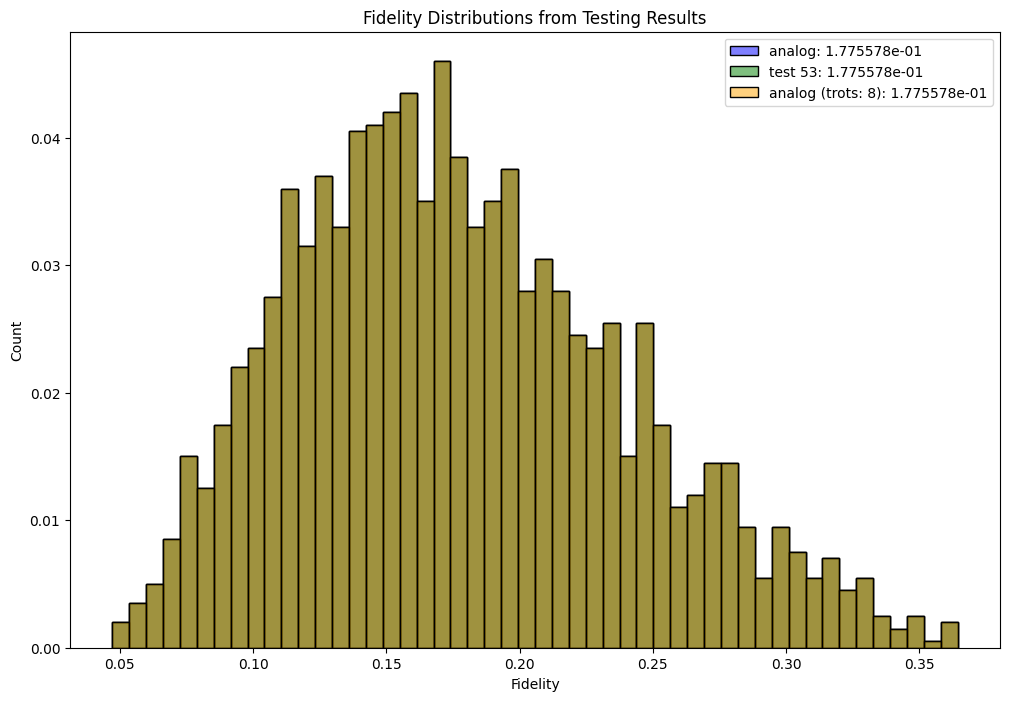

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the first dataset
a = '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_bath_factor_0.1/0_num_baths/)U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df = pickle.load(f)

test_results1 = [float(i) for i in df['testing_results'][0]]
costs1 =df['costs'][0]
label1 = f"analog: {df['avg_fidelity'][0]:6e}"

# Load the second dataset
b =  '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_bath_factor_0.1/1_num_baths/)U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(b, 'rb') as f:
    df = pickle.load(f)

test_results2 = [float(i) for i in df['testing_results'][0]]
costs2 =df['costs'][0]
label2 = f"test 53: {df['avg_fidelity'][0]:6e}"

# Load the third dataset
c = '/Users/sophieblock/Downloads/debug/digital_results_trainable_global/trainsize_20_epoch1500_bath_factor_0.1/2_num_baths/)U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(c, 'rb') as f:
    df = pickle.load(f)

test_results3 = [float(i) for i in df['testing_results'][0]]
label3 = f"analog (trots: 8): {df['avg_fidelity'][0]:6e}"
costs3 =df['costs'][0]

# Plot using seaborn histplot
plt.figure(figsize=(12, 8))

sns.histplot(test_results1, bins=50, label=label1, color="blue", stat='probability',alpha=0.5)
sns.histplot(test_results2, bins=50, label=label2, color="green",stat='probability', alpha=0.5)
sns.histplot(test_results3, bins=50, label=label3, color="orange",stat='probability', alpha=0.5)

plt.legend()
plt.title('Fidelity Distributions from Testing Results')
plt.xlabel('Fidelity')
plt.ylabel('Count')
plt.show()


TEST 0 BATH QUBIT(S)
params_key_seed: 12345
training state #1: [0.21008787-0.26180088j 0.36702169-0.86753586j]
Effective Digital Hamiltonian:
H:  (
    0.3530793501666427 * (X(1) @ X(0) + Y(1) @ Y(0)) + 
    -2.6943051609471182 * X(1) + 
    -2.397838588829403 * Y(1) + 
    0.6668611194824152 * Z(1)
)
specs: {'resources': Resources(num_wires=2, num_gates=5, gate_types=defaultdict(<class 'int'>, {'StatePrep': 1, 'RX': 1, 'RZ': 1, 'RY': 1, 'IsingXY': 1}), gate_sizes=defaultdict(<class 'int'>, {1: 4, 2: 1}), depth=4, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 0, 'num_device_wires': 2, 'num_tape_wires': 2, 'device_name': 'default.qubit', 'level': 'gradient', 'gradient_options': {}, 'interface': 'jax', 'diff_method': 'backprop', 'gradient_fn': 'backprop'}
initial fidelity: 0.6882062060260006, initial_gradients: 0.017370457178722168. Time: 0.35971879959106445
Adjusted initial learning rate: 0.1627.prev: 0.16268
________________________________________________________________________________
Starting optimization for U1_0  trots = 1, N_r = 1 with optimal lr 0.1627 time_steps = 1, N_r = 1 N_bath = 0...

Number of trainable parameters:  4
Epoch 1 --- cost: 0.68821, lr: 1.62680e-01, scale: 1.0GradNorm: 6.1e-02, [t: 0.6s]
    - setting cond1: initial mean(grad) 3.650819e-02, threshold: 3.650819e-03
    - setting cond2: initial var(grad) 4.133805e-03, threshold: 4.133805e-05
acceration: 9.63e-03, marked: 9.63e-06
Epoch 200 --- cost: 0.35990, lr: 1.62680e-01, scale: 1.0GradNorm: 5.8e-02, [t: 0.8s]
Epoch 400 --- cost: 0.34578, lr: 1.62680e-01, scale: 1.0GradNorm: 1.8e-03, [t: 0.9s]
Epoch 600 --- cost: 0.34580, lr: 1.62680e-01, scale: 1.0GradNorm: 3.1e-03, [t: 1.0s]
Epoch 800 --- cost: 0.34581, lr: 1.62680e-01, scale: 1.0GradNorm: 3.3e-03, [t: 1.1s]
Epoch 1000 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 1.3e-03, [t: 1.1s]
Epoch 1200 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 1.2e-04, [t: 1.2s]
Epoch 1400 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 8.3e-05, [t: 1.3s]
backup cost (epoch: 1196) is better with: 3.46e-01 <  3.46e-01: True
time optimizing: 0.8650579452514648 improvement count: 0
Testing opt params against 2000 new random states...
Avg Fidelity: 0.36711
./digital_results_trainable_global/trainsize_20_epoch1500_bath_factor_1.0/0_num_baths/)U1_0/reservoirs_1/trotter_step_1//bath_False/data_run_0.pickle

TEST 1 BATH QUBIT(S)
params_key_seed: 12345
training state #1: [0.21008787-0.26180088j 0.36702169-0.86753586j]
Effective Digital Hamiltonian:
H:  (
    -0.09388414888381909 * (Z(0) @ X(2) + Z(1) @ X(2)) + 
    0.3530793501666427 * (X(1) @ X(0) + Y(1) @ Y(0)) + 
    -2.6943051609471182 * X(1) + 
    -2.397838588829403 * Y(1) + 
    0.6668611194824152 * Z(1)
)
specs: {'resources': Resources(num_wires=3, num_gates=12, gate_types=defaultdict(<class 'int'>, {'StatePrep': 1, 'Hadamard': 1, 'CNOT': 4, 'RX': 3, 'RZ': 1, 'RY': 1, 'IsingXY': 1}), gate_sizes=defaultdict(<class 'int'>, {1: 7, 2: 5}), depth=11, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 0, 'num_device_wires': 3, 'num_tape_wires': 3, 'device_name': 'default.qubit', 'level': 'gradient', 'gradient_options': {}, 'interface': 'jax', 'diff_method': 'backprop', 'gradient_fn': 'backprop'}
initial fidelity: 0.6882062060440578, initial_gradients: 0.01737045717872219. Time: 0.25550079345703125
Adjusted initial learning rate: 0.1627.prev: 0.16268
________________________________________________________________________________
Starting optimization for U1_0  trots = 1, N_r = 1 with optimal lr 0.1627 time_steps = 1, N_r = 1 N_bath = 1...

Number of trainable parameters:  4
Epoch 1 --- cost: 0.68821, lr: 1.62680e-01, scale: 1.0GradNorm: 6.1e-02, [t: 0.4s]
    - setting cond1: initial mean(grad) 3.650819e-02, threshold: 3.650819e-03
    - setting cond2: initial var(grad) 4.133805e-03, threshold: 4.133805e-05
acceration: 9.63e-03, marked: 9.63e-06
Epoch 200 --- cost: 0.35990, lr: 1.62680e-01, scale: 1.0GradNorm: 5.8e-02, [t: 0.6s]
Epoch 400 --- cost: 0.34578, lr: 1.62680e-01, scale: 1.0GradNorm: 1.8e-03, [t: 0.6s]
Epoch 600 --- cost: 0.34580, lr: 1.62680e-01, scale: 1.0GradNorm: 3.1e-03, [t: 0.7s]
Epoch 800 --- cost: 0.34581, lr: 1.62680e-01, scale: 1.0GradNorm: 3.3e-03, [t: 0.8s]
Epoch 1000 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 1.3e-03, [t: 0.9s]
Epoch 1200 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 1.2e-04, [t: 1.0s]
Epoch 1400 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 8.3e-05, [t: 1.0s]
backup cost (epoch: 1335) is better with: 3.46e-01 <  3.46e-01: True
time optimizing: 0.8155529499053955 improvement count: 0
Testing opt params against 2000 new random states...
Avg Fidelity: 0.36711
./digital_results_trainable_global/trainsize_20_epoch1500_bath_factor_1.0/1_num_baths/)U1_0/reservoirs_1/trotter_step_1//bath_False/data_run_0.pickle

TEST 2 BATH QUBITS
params_key_seed: 12345
training state #1: [0.21008787-0.26180088j 0.36702169-0.86753586j]
Effective Digital Hamiltonian:
H:  (
    0.5513891084752636 * (Z(0) @ X(2) + Z(1) @ X(2)) + 
    -0.041562744001590594 * (Z(0) @ X(3) + Z(1) @ X(3)) + 
    -0.2355008437157788 * (Z(2) @ Z(3)) + 
    0.3530793501666427 * (X(1) @ X(0) + Y(1) @ Y(0)) + 
    -2.6943051609471182 * X(1) + 
    -2.397838588829403 * Y(1) + 
    0.6668611194824152 * Z(1)
)
specs: {'resources': Resources(num_wires=4, num_gates=20, gate_types=defaultdict(<class 'int'>, {'StatePrep': 1, 'Hadamard': 2, 'CNOT': 8, 'RX': 5, 'IsingZZ': 1, 'RZ': 1, 'RY': 1, 'IsingXY': 1}), gate_sizes=defaultdict(<class 'int'>, {1: 10, 2: 10}), depth=14, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_trainable_params': 0, 'num_device_wires': 4, 'num_tape_wires': 4, 'device_name': 'default.qubit', 'level': 'gradient', 'gradient_options': {}, 'interface': 'jax', 'diff_method': 'backprop', 'gradient_fn': 'backprop'}
initial fidelity: 0.6882062058081793, initial_gradients: 0.017370457178722154. Time: 0.3012223243713379
Adjusted initial learning rate: 0.1627.prev: 0.16268
________________________________________________________________________________
Starting optimization for U1_0  trots = 1, N_r = 1 with optimal lr 0.1627 time_steps = 1, N_r = 1 N_bath = 2...

Number of trainable parameters:  4
Epoch 1 --- cost: 0.68821, lr: 1.62680e-01, scale: 1.0GradNorm: 6.1e-02, [t: 0.5s]
    - setting cond1: initial mean(grad) 3.650819e-02, threshold: 3.650819e-03
    - setting cond2: initial var(grad) 4.133805e-03, threshold: 4.133805e-05
acceration: 9.63e-03, marked: 9.63e-06
Epoch 200 --- cost: 0.35990, lr: 1.62680e-01, scale: 1.0GradNorm: 5.8e-02, [t: 0.7s]
Epoch 400 --- cost: 0.34578, lr: 1.62680e-01, scale: 1.0GradNorm: 1.8e-03, [t: 0.7s]
Epoch 600 --- cost: 0.34580, lr: 1.62680e-01, scale: 1.0GradNorm: 3.1e-03, [t: 0.8s]
Epoch 800 --- cost: 0.34581, lr: 1.62680e-01, scale: 1.0GradNorm: 3.3e-03, [t: 0.9s]
Epoch 1000 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 1.3e-03, [t: 1.0s]
Epoch 1200 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 1.2e-04, [t: 1.1s]
Epoch 1400 --- cost: 0.34577, lr: 1.62680e-01, scale: 1.0GradNorm: 8.3e-05, [t: 1.2s]
backup cost (epoch: 1335) is better with: 3.46e-01 <  3.46e-01: True
time optimizing: 0.896500825881958 improvement count: 0
Testing opt params against 2000 new random states...
Avg Fidelity: 0.36711

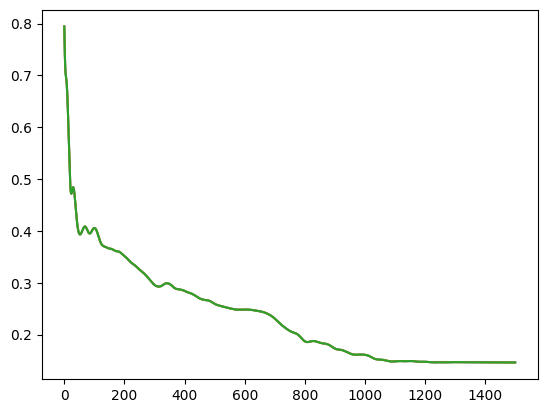

In [393]:
plt.plot(costs1,label= label1)
plt.plot(costs2,label=  label2)
plt.plot(costs3,label=  label3)

In [ ]:
plt.plot(range(1,len(costs)+1),costs, label = label1)
linestyle =  '--'


plt.plot(range(1,len(costs2)+1),costs2, label = label2)

plt.plot(range(1,len(costs3)+1),costs3, label = label3, linestyle=linestyle)
# plt.plot(range(1,len(costs4)+1),costs4, label = label4, linestyle=linestyle)
plt.legend()

# print(costs[1490:])
# len(costs)

In [ ]:
plt.plot(rocs)

In [ ]:

b =1*(10**-2.55)

print(b*3.42e-04)
b = 1 * (10**-3)

# b = 1**10-2.5
print(b*3.42e-04)

In [ ]:
i = 1400
plt.plot(costs[i:])
plt.plot(costs2[i:])
costs[-4]-costs[-1]

In [ ]:
thresh =9.638869624924435e-07
thresh = 7.866838e-07
for i,a in enumerate(rocs):
    if a < 0.0 and np.abs(a) < thresh:
        print(i, a)

In [ ]:
print(rocs[11]*1e-3)
# print(np.abs(rocs[50])*1e-2)
# rocs[850]
# print(rocs2[:20])

In [ ]:
print(rocs[8]*1e-3)

In [ ]:
import jax.numpy as jnp
import numpy
def calculate_gradient_stats_per_state(gradients,abs_grad=True):
    
    """Calculate the mean and variance of the gradients for each state."""
    if abs_grad:
        gradients = jnp.abs(gradients)
    mean_grad = jnp.mean(gradients, axis=-1)  # Mean across parameters for each state
    mean_grad_squared = jnp.mean(gradients ** 2, axis=-1)  # Mean squared gradients across parameters
    var_grad = mean_grad_squared - mean_grad ** 2  # Variance per state
    grad_norm = jnp.linalg.norm(gradients, axis=-1)  # Norm per state

    return mean_grad, var_grad, grad_norm
def analyze_results(results_dict, num_datasets):
    """
    Analyze results dictionary to select the best datasets for initial training, replacement, and fine-tuning.
    """
    # Lists to store metrics for normalization purposes
    var_grad_means,var_var_grads = [], []
    min_gradvars,max_gradvars = [], []
    min_mean_grads,max_mean_grads = [], []
    grad_norms, mean_grads = [],[]
    min_norm_var_grads, max_norm_var_grads = [],[]
    normalized_var_grad_norms = []

    # Initialize tracking for scores and results
    results = {}

    # Loop through all datasets in the results_dict
    for set_idx in range(num_datasets):
        # Extract necessary statistics for the current dataset
        # meangrad_norm, vargrad_norm, gradnorm_norm = calculate_gradient_stats_per_state(normalized_gradients_per_state)
        result = results_dict[f'dataset_{set_idx}']
        var_grad_mean = result["Mean(Var Grad)"]
        variance_of_variance_gradients_normalized =result["Var(Var Grad) [normalized]"]
        mean_grad = result["Mean(Mean Grad)"]
        min_grad, max_grad = result['Min Gradient'], result['Max Gradient']
        min_vargrad, max_vargrad = result['min_var_grad_means'], result['max_var_grad_means']
        min_gradvars.append(min_vargrad)
        max_gradvars.append(max_vargrad)
        min_mean_grads.append(min_grad)
        max_mean_grads.append(max_grad)
        var_var_grad = result["Var(Var Grad)"]
        grad_norm = result["Gradient Norm"]
        norm_var_grad_mean = result["Mean(Var Grad) [normalized]"]

        # Collect statistics for normalization purposes
        var_grad_means.append(var_grad_mean)
        var_var_grads.append(var_var_grad)
        mean_grads.append(mean_grad)
        grad_norms.append(grad_norm)
        
        normalized_var_grad_norms.append(np.float64(variance_of_variance_gradients_normalized))

    # Compute min and max for normalization
    min_var_var,max_var_var = min(var_var_grads), max(var_var_grads)
    print(np.array(mean_grads).shape)
    print(f"Variance of the gradients: [min: {min(min_gradvars):.2e}), max: {max(max_gradvars):.2e}]")
    print(f"Mean gradients: [min: {min(min_mean_grads):.2e}), max: {max(max_mean_grads):.2e}]")
    min_var_grad = min(min_gradvars)
    max_var_grad = max(max_gradvars)
    min_mean = min(min_mean_grads)
    max_mean = max(max_mean_grads)
    min_norm_var_grad = min(normalized_var_grad_norms*10)
    max_norm_var_grad = max(normalized_var_grad_norms*10)
    print(f"normalized_var_grad_norms: {normalized_var_grad_norms}")
    log_var_grad_norms = [numpy.float64(np.log2(el)) for el in normalized_var_grad_norms]
    print(f"log_var_grad_norms: {log_var_grad_norms}")
    print(f"min: {min_norm_var_grad:.2e}, max: {max_norm_var_grad:.2e}")
    # Function for normalizing metrics
    def normalize_metric(value, min_val, max_val, epsilon=1e-6, upper_bound=0.999):
        if max_val > min_val:
            # Adjust to avoid exactly 0.0 and 1.0, and ensure upper bound doesn't reach 1.0
            normalized_value = (value - min_val ) / (max_val - min_val + 2 )
            return min(normalized_value, upper_bound)
        else:
            return 0.5  # Neutral value if min and max are the same
        
    to_print = [0,1,2,3,4,5,6,7,8,9]
    alpha = 1.0
    # Weights for each metric in the weighted sum approach

    w1 = 0.8  # Weight for normalized variance of the gradient
    w2 = .2# Weight for normalized gradient norm
    w3 = 0.5 # Weight for normalized variance of the variance of the gradient

    beta =0.5

    max_scale = max(max_mean,max_var_grad)
    min_scale = min(min_mean,min_var_grad)
    print(f"Scaled: [min: {min_scale:.2e}), max: {max_scale:.2e}]")
    # Now calculate scores and store them in the results
    for set_idx in range(num_datasets):
        i = set_idx
        result = results_dict[f'dataset_{set_idx}']

        # Extract necessary statistics for the current dataset
        var_grad_mean = result["Mean(Var Grad)"]
        var_var_grad = result["Var(Var Grad)"]
        mean_grad = np.mean(result["Mean(Mean Grad)"])
        var_mean_grad = result["Var(Mean Grad)"]
        grad_norm = result["Gradient Norm"]
        X,y = result["dataset"]
        
        mean_variance_of_gradient_normalized =result["Mean(Var Grad) [normalized]"]
        variance_of_variance_gradients_normalized =normalized_var_grad_norms[set_idx]
        average_of_mean_gradients_normalized_abs =result["Mean(Mean Grad) [normalized]"]
        variance_of_mean_gradients_normalized =result["Var(Mean Grad) [normalized]"]
        normalized_grad_norm = result["Norm(Gradient Norm)"]
        
        
        # Normalize var_grad_mean and grad_norm
        normalized_mean_variance_of_gradient = normalize_metric(var_grad_mean, min_scale,max_scale)
        normalized_mean_gradient_score = normalize_metric(mean_grad,  min_scale,max_scale)
        # normalized_mean_variance_of_gradient_normalized = normalize_metric(mean_variance_of_gradient_normalized, min_var_grad, max_var_grad)
        normalized_var_var_grads = normalize_metric(var_var_grad,   min_var_var,max_var_var)
        normalized_var_mean_gradient = normalize_metric(var_mean_grad, min_scale,max_scale)
        variance_of_variance_gradients_normalized_scaled = normalize_metric(variance_of_variance_gradients_normalized, min_norm_var_grad,max_norm_var_grad)
        # normalized_grad_norm_score = normalize_metric(grad_norm, 0, 1)
        # normalized_mean_variance_of_gradient_normalized = normalize_metric(mean_of_variance_normalized_gradient, 0, 1)
        # normalized_var_var_grads = normalize_metric(var_var_grad, 0, 1)
        
        # initial_score = (
        #     w1 * (var_grad_mean)  # Reward high gradient variance
        #     +w2 * (mean_grad)   # Reward high gradient norm
        #     # +w2*(average_of_mean_gradients_normalized_abs)
        #     -w3* (var_var_grad)  # Penalize high variance of variance of gradients
        #      -beta * (var_mean_grad)  # Penalize high variance of mean gradients
        # )
        other_score = (
            w1 * (normalized_mean_variance_of_gradient)  # Reward high gradient variance
            +w2 * (normalized_mean_gradient_score)   # Reward high gradient norm
            # +w2*(average_of_mean_gradients_normalized_abs)
            -w3* (variance_of_variance_gradients_normalized)  # Penalize high variance of variance of gradients
             -beta * (normalized_var_mean_gradient)  # Penalize high variance of mean gradients
        )
        initial_score = (
            w1 * (normalized_mean_variance_of_gradient)  # Reward high gradient variance
            +w2 * (normalized_mean_gradient_score)   # Reward high gradient norm
            # +w2*(average_of_mean_gradients_normalized_abs)
            -w3* (variance_of_variance_gradients_normalized_scaled)  # Penalize high variance of variance of gradients
             -beta * (normalized_var_mean_gradient)  # Penalize high variance of mean gradients
        )
      
        # Compute Replacement Score (focus on stable gradient variance but consider Var(Var Grad))
        replacement_score = (
            mean_variance_of_gradient_normalized * np.exp(-beta * (normalized_grad_norm - 1) ** 2) 
        )
        # replacement_score = (normalized_grad_norm + mean_variance_of_gradient_normalized

        # )

        fine_tuning_score = 0.5 * normalized_grad_norm + 0.5 * mean_variance_of_gradient_normalized

        # Store the scores in the results dictionary
        results[f'dataset_{set_idx}'] = {
            "Initial Score": initial_score,
            "Replacement Score": replacement_score,
            
        }
        if set_idx in to_print:
            # Print the detailed summary statistics for each dataset
            print(f"(A{i}, b{i}) ")
            # print(f"    first state  : {X[0]}")
            # print(f"    Var(Grad): {var_grad_mean:.2e}, Mean(Grad): {mean_grad:.2e} ->  Var(Grad)+Mean(Grad) = {var_grad_mean+mean_grad:.2e}")
            print(f"    Raw Var(Grad): {var_grad_mean:.2e}")
            print(f"    Var(Grad): {w1*normalized_mean_variance_of_gradient:.2e}, Mean(Grad): {w2*normalized_mean_gradient_score:.2e} ->  Var(Grad)+Mean(Grad) = {w1*normalized_mean_variance_of_gradient+w2*normalized_mean_gradient_score:.2e} [scaled]")
            # print(f"    Var(Var): {variance_of_variance_gradients_normalized_scaled:.2e}, {variance_of_variance_gradients_normalized:.2e},  {normalized_var_var_grads:.2e}.  VarMean): {var_mean_grad:.2e}, {normalized_var_mean_gradient:.2e}")
            print(f"    Var(Var) scaled: {variance_of_variance_gradients_normalized_scaled:.2e}, Var(Mean(Grad)): {normalized_var_mean_gradient:.2e} -> {-w3*variance_of_variance_gradients_normalized_scaled+ -beta*normalized_var_mean_gradient:.2e}")
            print(f"    Initial Score: {initial_score:.3e}, other: {other_score:.3e}\n")

            # print(f"(A{i}, b{i}) ")
            # print(f"    Var(Grad): {var_grad_mean:.2e}, Normalized Var(Grad): {mean_variance_of_gradient_normalized:.2e}")
            # print(f"    scaled vargrad: {normalized_mean_variance_of_gradient:.2e}, scaled meangrad: {normalized_mean_gradient_score:.2e}")
            # print(f"    Mean(Grad): {mean_grad:.2e},  Mean(GradNorm): {average_of_mean_gradients_normalized_abs:.2e}")
            # print(f"    Var(MeanGrad): {var_mean_grad:.2e},  VarMean(GradNorm): {variance_of_mean_gradients_normalized:.2e}")
            # # print(f"    Gradient Norm: {grad_norm:.2e}, Normalized Grad Norm: {normalized_grad_norm_score:.2e}")
            # # print(f"    first state  : {X[0]}")
            # # print(f"    Var(NormGrad): {mean_variance_of_gradient_normalized:.2e}, Normalized Var(NormGrad): {normalized_grad_norm:.2e}")
            # print(f"    Var(Var(Grad)): {var_var_grad:.2e}, Normalized  Var(Var(Grad)): {variance_of_variance_gradients_normalized:.2e}")
            
            # print(f"    Initial Score: {initial_score:.3e}, Replacement Score: {replacement_score:.3e}, other: {other_score:.3e}\n")


    # Now select the best datasets for initial training, replacement, and fine-tuning
    sorted_by_initial = sorted(results.items(), key=lambda x: x[1]["Initial Score"], reverse=True)
    sorted_by_replacement = sorted(results.items(), key=lambda x: x[1]["Replacement Score"], reverse=True)

    # print(sorted_by_replacement)
    # Best for initial training
    best_for_initial_training = sorted_by_initial[0]
    
    # Ensure the replacement is not the same as the initial
    if sorted_by_replacement[0][0] == best_for_initial_training[0]:
        best_for_replacement = sorted_by_replacement[1]  # Pick the second best
    else:
        best_for_replacement = sorted_by_replacement[0]



    # Print the results
    print(f"Best Dataset for Initial Training: {best_for_initial_training[0]} with score: {best_for_initial_training[1]['Initial Score']:.2e}")
    print(f"Best Dataset for Replacement: {best_for_replacement[0]} with score: {best_for_replacement[1]['Replacement Score']:.2e}")

    # Return the best datasets
    return best_for_initial_training, best_for_replacement
analyze_results(results_dict[0],num_datasets)

# [-0.658#[ 0.21641777-0.05214687j  0.1271135 +0.6088834j  -0.41251817+0.46148774j  -0.0407903 -0.422778j  ]

In [ ]:
analyze_results(results_dict[0],num_datasets)

In [ ]:
results_dict[0]

avg fidelity 1: 0.99174512347579 +- 0.0027397721582176553
avg fidelity 3: 0.9912960633635521 +- 0.002645143835515139
avg fidelity 3: 0.9983646594158782 +- 0.00047729121268886556

In [ ]:
num_epochs = 1000
a = 3*num_epochs // 4

a

Variance of gradients = 1.337231e-01; Varince of mean gradient 1.186686e-02 IQR of Variance (25,75) = 8.437296e-02; min grad: 3.721845e-04; max grad: 5.292232e-01

Variance of gradients = 1.493278e-01; Varince of mean gradient 8.839552e-03 IQR of Variance (25,75) = 8.805603e-02; min grad: 2.534003e-04; max grad: 3.528179e-01

{}
init_params:  [-0.88111204 -1.487593   -1.8190458  -0.01114495  0.76837647]
final_cost: 6.172260e-01. avg fidelity 1: 6.810059e-01 +- 2.114353e-01


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_0/reservoirs_1/trotter_step_1/bath_False/testing_preopt/trainingset_A7_rep_A9.pickle'

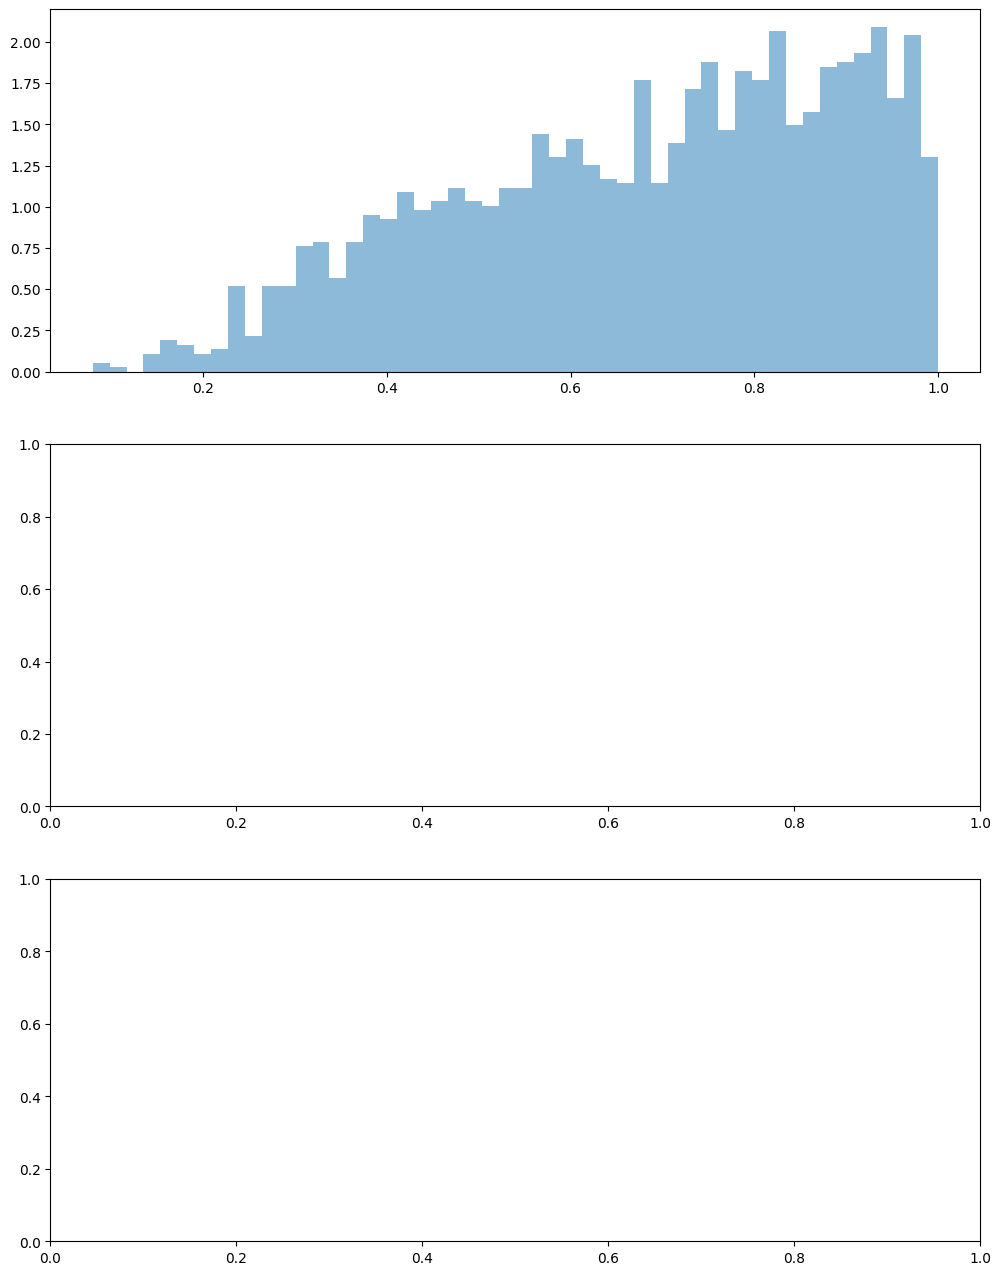

In [11]:
gate_idx =0
trot = 1
N_r = 1
N_ctrl = 2
#/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_3/reservoirs_1/trotter_step_9/bath_False/testing_preopt/trainingset_A4_rep_A7.pickle

a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)

fig, axs = plt.subplots(3,1,figsize=(12, 16))
ax = axs[0]
# gate_idx =gate_idx + 1
preopt_results = df['selected_indices'][0]
print(preopt_results)
costs = [i for i in df['costs'][0]]
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch = [max(arr) for arr in grads_per_epoch]
testing_results = df['test_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['training_states'][0][0])
print("init_params: ",df['init_params'][0])
label1 =f"A4_rep_A7"

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [i for i in df['test_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5, density=True, label=label1)  # Normalize histogram

print(f"final_cost: {costs[-1]:4e}. avg fidelity 1: {np.mean(test_results):3e} +- {np.std(test_results):3e}")

b =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A7_rep_A9.pickle'

with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)


grads_per_epoch2 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch2 = [max(arr) for arr in grads_per_epoch2]
costs2 =  [i for i in df['costs'][0]]

fidelity2 = df['avg_fidelity'][0]

label2 =  f"A7_rep_A9"

try:
    test_results2 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results2 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs2[-1]:4e}. avg fidelity 2: {np.mean(test_results2):3e} +- {np.std(test_results2):3e}")
ax.hist(test_results2, bins=50, alpha=0.5, density=True, label = label2)


c =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A4_rep_A9.pickle'

with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)


grads_per_epoch3 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch3 = [max(arr) for arr in grads_per_epoch3]
costs3 =  [i for i in df['costs'][0]]

fidelity3 = df['avg_fidelity'][0]

label3 =  f"A4_rep_A9"

try:
    test_results3 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results3 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs3[-1]:4e}. avg fidelity 3: {np.mean(test_results3):3e} +- {np.std(test_results3):3e}")


ax.hist(test_results3, bins=50, alpha=0.5, density=True, label = label3)


# Define paths to the additional data files
d = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A9_rep_A7.pickle'
e = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A8_rep_A7.pickle'
# Load and plot the fourth dataset
with open(d, 'rb') as f:
    df = pickle.load(f)

label4 = f"A9_rep_A7"
costs4 = [i for i in df['costs'][0]]
grads_per_epoch4 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch4 = [max(arr) for arr in grads_per_epoch4]
test_results4 = df['testing_results'][0]
ax.hist(test_results4, bins=50, alpha=0.5, density=True,  label=label4)

print(f"final_cost: {costs4[-1]:4e}. avg fidelity 4: {np.mean(test_results4):3e} +- {np.std(test_results4):3e}")

# Load and plot the fifth dataset
with open(e, 'rb') as f:
    df = pickle.load(f)

label5 = f"A8_rep_A7"
costs5 = [i for i in df['costs'][0]]
grads_per_epoch5 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch5 = [max(arr) for arr in grads_per_epoch5]
test_results5 = df['testing_results'][0]
ax.hist(test_results5, bins=50, alpha=0.5, density=True,  label=label5)

print(f"final_cost: {costs5[-1]:4e}. avg fidelity 5: {np.mean(test_results5):3e} +- {np.std(test_results5):3e}")


# ax.set_ylim([0.0,1.0])

ax.legend()


# Plot costs for all datasets
axs[1].plot(range(1, len(costs) + 1), costs, label=label1)
axs[1].plot(range(1, len(costs2) + 1), costs2, label=label2)
axs[1].plot(range(1, len(costs3) + 1), costs3, label=label3)
axs[1].plot(range(1, len(costs4) + 1), costs4, label=label4)
axs[1].plot(range(1, len(costs5) + 1), costs5, label=label5)
axs[1].legend()

# Plot max gradient per epoch for all datasets
axs[2].plot(range(1, len(max_grads_per_epoch) + 1), max_grads_per_epoch, label=label1)
axs[2].plot(range(1, len(max_grads_per_epoch2) + 1), max_grads_per_epoch2, label=label2)
axs[2].plot(range(1, len(max_grads_per_epoch3) + 1), max_grads_per_epoch3, label=label3)
axs[2].plot(range(1, len(max_grads_per_epoch4) + 1), max_grads_per_epoch4, label=label4)
axs[2].plot(range(1, len(max_grads_per_epoch5) + 1), max_grads_per_epoch5, label=label5)
axs[2].legend()

# plt.show()/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U2_0/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle

In [ ]:
len(grads_per_epoch3[0])

In [ ]:
gate_idx =9
trot = 15
N_r = 1
N_ctrl = 2
#/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_3/reservoirs_1/trotter_step_9/bath_False/testing_preopt/trainingset_A4_rep_A7.pickle
# a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/test22/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)

fig, ax = plt.subplots(figsize=(16, 9))
# gate_idx =gate_idx + 1
costs = [i for i in df['costs'][0]]
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
testing_results = df['test_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['training_states'][0][0])
print("init_params: ",df['init_params'][0])
label1 =f"test 22: {fidelity:6e}"

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)
print(f"final_cost: {costs[-1]:4e}. avg fidelity 1: {np.mean(test_results):3e} +- {np.std(test_results):3e}")

trot = 10
c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'

with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)



costs3 =  [i for i in df['costs'][0]]

fidelity3 = df['avg_fidelity'][0]

label3 =  f"digital (trots: {trot}): {fidelity3:6e}"

try:
    test_results3 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results3 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs3[-1]:4e}. avg fidelity 3: {np.mean(test_results3):3e} +- {np.std(test_results3):3e}")


ax.hist(test_results3, bins=50, alpha=0.5,label = label3)

ax.legend()


In [ ]:
plt.plot(range(1,len(costs)+1),costs, label = label1)

plt.plot(range(1,len(costs3)+1),costs3, label = label3)
#plt.plot(range(1,len(costs3)+1),costs3)
plt.legend()


In [ ]:
temp = [el for el in testing_results if el <0.0]
print(len(temp))

temp = [el for el in testing_results3 if el <0.0]
print(len(temp))

In [ ]:
temp = [el for el in test_results if el <0.0]
print(temp)

In [ ]:
test_results3
temp = [el for el in test_results3 if el <0.0]
print(temp)

In [ ]:
gate_idx = 1
trot = 2
N_r = 1
N_ctrl = 1
selected_sets = [0]  # List of dataset indices

def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr
tests = ['test22','test53','test31','test50', 'test94','test121','test44','test125']
# Initialize the paths to the datasets (as a loop)
data_files = [f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/{test_key}/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
                for test_key in tests]

def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad

threshold = 10e-14
# Load the datasets and extract relevant data
data_results = {}
for i,file_path in enumerate(data_files):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    trainin_states = data['training_states'][0][0]
    

    var_nonzero_grads = []
    for grads in grads_per_epoch:
        

        nz_grads = [res for res in grads if np.abs(res) > threshold]
        # if tests[i] == 'test50':
        #     print(nz_grads)
        var_nonzero_grads.append(np.var(nz_grads))
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # Print the results
    print(f"\nAverage Fidelity ({tests[i]}): {mean_fidelity} ± {std_fidelity}")
    # print(f"Initial Variance ({tests[i]}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")

    # print(f"From test: {np.mean(data['var_grad'][0]):.5e}, IQR: {calculate_iqr(data['var_grad'][0]):.5e}, Min Gradient: {data['min_grad'][0]:.5e}, Max Grad: {data['max_grad'][0]:.5e}")

    
    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    

    

    data_results[tests[i]] = {
        'costs': costs,
        'var_grad': var_grad,
        'var_nonzero_grads':var_nonzero_grads,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'avg_fidelity':fidelity,
        'testing_results': testing_results
    }


In [ ]:

# Now plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 20))

# Loop over datasets and add each to the plots
for test_key, dataset in data_results.items():
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'{test_key} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_nonzero_grads']) + 1), dataset['var_nonzero_grads'], label=label)
    ax[2].set_yscale('log')
    # Plot minimum absolute value of gradients per epoch
    ax[3].plot(range(1, len(dataset['min_grad']) + 1), dataset['min_grad'],linewidth=1, label=label)
    ax[3].set_yscale('log')
    # Plot maximum absolute value of gradients per epoch
    ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    ax[4].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

ax[3].set_title('Minimum Absolute Value of Gradients per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].set_yscale('log')  # Log scale as before
ax[3].legend(fontsize=12)

ax[4].set_title('Maximum Absolute Value of Gradients per Epoch')
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
gate_idx =1
trot = 7
N_r = 1
N_ctrl = 2
for gate_idx in range(0,20):
    print(f"U{N_ctrl}_{gate_idx}")
    a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
        df = pickle.load(f)

    fig, ax = plt.subplots(figsize=(16, 9))

    costs = [float(i) for i in df['costs'][0]]
    grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
    testing_results = df['testing_results'][0]
    fidelity = 1 - df['avg_fidelity'][0]

    label1 =f"new lr: {df['opt_lr'][0]}"
    gate = df['Gate'][0]
    decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
    #print(decoded_qobj)
    test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
    ax.hist(test_results, bins=50, alpha=0.5,label = label1)
    print(f"avg fidelity 1: {np.mean(test_results)} +- {np.std(test_results)}")

    # b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    # try:
    #     with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    #         df = pickle.load(f)



    #     costs2 = [float(i) for i in df['costs'][0]]
    #     testing_results2 = df['testing_results'][0]
    #     fidelity2 = 1 - df['avg_fidelity'][0]

    #     label2 = f"old lr: {df['opt_lr'][0]}"
    #     gate = df['Gate'][0]
    #     decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))

    #     test_results2 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
    #     ax.hist(test_results2, bins=50, alpha=0.5,label = label2)
    #     print(f"avg fidelity 3: {np.mean(test_results2)} +- {np.std(test_results2)}")
    # except FileNotFoundError:
    #     pass
    
    ax.legend()

In [ ]:
a = [1,2,3]
print(a[:1])

In [ ]:
20 // 5